In [3]:
#from google.colab import drive
import pandas as pd
import sys
import numpy as np
%pip install tabulate
%pip install matplotlib seaborn
%pip install scipy matplotlib seaborn
%pip install pandas numpy matplotlib seaborn scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#drive.mount('/content/drive')

In [5]:

# Aşağıdaki yolu kendi Drive yapına göre güncelle!
#module_path = '/content/drive/MyDrive/BitirmeProjesi'
#if module_path not in sys.path:
 #   sys.path.append(module_path)


import data_processing

In [6]:
df_games = pd.read_csv(r'C:\Users\belyi\Desktop\NBA_Dataset\games.csv')
df_games_details = pd.read_csv(r"C:\Users\belyi\Desktop\NBA_Dataset\games_details.csv")
df_teams = pd.read_csv(r"C:\Users\belyi\Desktop\NBA_Dataset\teams.csv")
df_ranking = pd.read_csv(r"C:\Users\belyi\Desktop\NBA_Dataset\ranking.csv")
df_players = pd.read_csv(r"C:\Users\belyi\Desktop\NBA_Dataset\players.csv")

In [7]:
#df_games = pd.read_csv("/content/drive/MyDrive/BitirmeProjesi/games.csv")
#df_games_details = pd.read_csv("/content/drive/MyDrive/BitirmeProjesi/games_details.csv")
#df_teams = pd.read_csv("/content/drive/MyDrive/BitirmeProjesi/teams.csv")
#df_ranking = pd.read_csv("/content/drive/MyDrive/BitirmeProjesi/ranking.csv")
#df_players = pd.read_csv("/content/drive/MyDrive/BitirmeProjesi/players.csv")

In [8]:
data_processing.summarize_dataframe(df_players, "players.csv")
data_processing.summarize_dataframe(df_games, "games.csv")
data_processing.summarize_dataframe(df_games_details, "games_details.csv")
data_processing.summarize_dataframe(df_teams, "teams.csv")
data_processing.summarize_dataframe(df_ranking, "ranking.csv")

--- players.csv ---

--- İlk 10 Satır (df.head(3)) ---
| PLAYER_NAME      |    TEAM_ID |   PLAYER_ID |   SEASON |
|:-----------------|-----------:|------------:|---------:|
| Royce O'Neale    | 1610612762 |     1626220 |     2019 |
| Bojan Bogdanovic | 1610612762 |      202711 |     2019 |
| Rudy Gobert      | 1610612762 |      203497 |     2019 |
| Donovan Mitchell | 1610612762 |     1628378 |     2019 |
| Mike Conley      | 1610612762 |      201144 |     2019 |
| Joe Ingles       | 1610612762 |      204060 |     2019 |
| Ed Davis         | 1610612762 |      202334 |     2019 |
| Jeff Green       | 1610612762 |      201145 |     2019 |
| Dante Exum       | 1610612762 |      203957 |     2019 |
| Emmanuel Mudiay  | 1610612762 |     1626144 |     2019 |

--- Veri Seti Bilgileri (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLA

In [9]:
data_files = [df_games, df_games_details, df_teams, df_ranking, df_players]
names      = ["games", "games_details", "teams", "ranking", "players"]

data_processing.analyze_missing_values(data_files, data_names=names)


--- 'games' için eksik veri analizi ---
              Eksik Değer Sayısı  Eksik Yüzdesi (%)
PTS_home                      99           0.371468
FG_PCT_home                   99           0.371468
FT_PCT_home                   99           0.371468
FG3_PCT_home                  99           0.371468
AST_home                      99           0.371468
REB_home                      99           0.371468
PTS_away                      99           0.371468
FG_PCT_away                   99           0.371468
FT_PCT_away                   99           0.371468
FG3_PCT_away                  99           0.371468
AST_away                      99           0.371468
REB_away                      99           0.371468 

--- 'games_details' için eksik veri analizi ---
                Eksik Değer Sayısı  Eksik Yüzdesi (%)
NICKNAME                    615591          92.067787
COMMENT                     558939          83.594914
START_POSITION              412863          61.747788
PLUS_MINUS        

In [10]:
df_games_cleaned = df_games.dropna(subset=[
    'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
    'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away'
])
df_games_cleaned['GAME_DATE_EST'] = pd.to_datetime(df_games_cleaned['GAME_DATE_EST'])

# 2. İstenmeyen sütunları tamamen sil
df_games_cleaned = df_games_cleaned.drop(columns=[
    'GAME_STATUS_TEXT', 'TEAM_ID_home', 'TEAM_ID_away'
])

In [11]:
df_games_cleaned.isnull().sum()

GAME_DATE_EST      0
GAME_ID            0
HOME_TEAM_ID       0
VISITOR_TEAM_ID    0
SEASON             0
PTS_home           0
FG_PCT_home        0
FT_PCT_home        0
FG3_PCT_home       0
AST_home           0
REB_home           0
PTS_away           0
FG_PCT_away        0
FT_PCT_away        0
FG3_PCT_away       0
AST_away           0
REB_away           0
HOME_TEAM_WINS     0
dtype: int64

In [12]:
# 1. İstenmeyen sütunları sil
df_games_details_cleaned = df_games_details.drop(columns=[
    'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT'
])

# 2. Belirli sütunlardaki NaN değerleri 0 ile doldur
columns_to_fill_zero = [
    'MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB',
    'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS',
    'FG_PCT', 'FG3_PCT', 'FT_PCT'
]

df_games_details_cleaned[columns_to_fill_zero] = df_games_details_cleaned[columns_to_fill_zero].fillna(0)


In [13]:
def convert_min_to_total_minutes(min_value):
    """
    'Dakika:Saniye' formatındaki süreyi toplam dakikaya çevirir.
    Boş (NaN) veya sıfır değerleri 0 olarak döner.
    """
    if pd.isna(min_value) or min_value == 0: 
        return 0
    try:
        
        if isinstance(min_value, str) and ':' in min_value:
            parts = min_value.split(':')
            minutes = float(parts[0])
            seconds = float(parts[1]) if len(parts) > 1 else 0
            return minutes + (seconds / 60)
        
        elif isinstance(min_value, (int, float)):
            return float(min_value)
        else: 
            return 0 
    except ValueError:
        return 0

In [14]:
# 'MIN' sütununu toplam dakikaya çevirip yeni bir sütun oluştur
df_games_details_cleaned['TOTAL_MINUTES_PLAYED'] = df_games_details_cleaned['MIN'].apply(convert_min_to_total_minutes)

# Artık orijinal 'MIN' sütununa ihtiyacın kalmayacağı için silebilirsin (isteğe bağlı)
df_games_details_cleaned = df_games_details_cleaned.drop(columns=['MIN'])

print("MIN sütunu 'TOTAL_MINUTES_PLAYED' olarak sayısal formata çevrildi.")

MIN sütunu 'TOTAL_MINUTES_PLAYED' olarak sayısal formata çevrildi.


In [15]:
df_games_details_cleaned.isnull().sum()

GAME_ID                 0
TEAM_ID                 0
PLAYER_ID               0
FGM                     0
FGA                     0
FG_PCT                  0
FG3M                    0
FG3A                    0
FG3_PCT                 0
FTM                     0
FTA                     0
FT_PCT                  0
OREB                    0
DREB                    0
REB                     0
AST                     0
STL                     0
BLK                     0
TO                      0
PF                      0
PTS                     0
PLUS_MINUS              0
TOTAL_MINUTES_PLAYED    0
dtype: int64

In [16]:
df_players_cleaned = df_players.drop(columns=['PLAYER_NAME'])

In [17]:
df_players_cleaned.isnull().sum()

TEAM_ID      0
PLAYER_ID    0
SEASON       0
dtype: int64

In [18]:
# 1. İstenmeyen sütunları kaldır
df_ranking_cleaned = df_ranking.drop(columns=['LEAGUE_ID', 'TEAM', 'RETURNTOPLAY'])

# 2. STANDINGSDATE sütununu datetime formatına çevir
df_ranking_cleaned['STANDINGSDATE'] = pd.to_datetime(df_ranking_cleaned['STANDINGSDATE'])

# 3. HOME_RECORD ve ROAD_RECORD'dan yeni sütunlar türet
# '10-5' gibi formatta olduğu için ayırıyoruz
df_ranking_cleaned[['HOME_WINS', 'HOME_LOSSES']] = df_ranking_cleaned['HOME_RECORD'].str.split('-', expand=True).astype(int)
df_ranking_cleaned[['ROAD_WINS', 'ROAD_LOSSES']] = df_ranking_cleaned['ROAD_RECORD'].str.split('-', expand=True).astype(int)

# 4. Artık orijinal HOME_RECORD ve ROAD_RECORD sütunlarını silelim
df_ranking_cleaned = df_ranking_cleaned.drop(columns=['HOME_RECORD', 'ROAD_RECORD'])

# Son hali
print(df_ranking_cleaned.head())


      TEAM_ID  SEASON_ID STANDINGSDATE CONFERENCE   G   W   L  W_PCT  \
0  1610612743      22022    2022-12-22       West  30  19  11  0.633   
1  1610612763      22022    2022-12-22       West  30  19  11  0.633   
2  1610612740      22022    2022-12-22       West  31  19  12  0.613   
3  1610612756      22022    2022-12-22       West  32  19  13  0.594   
4  1610612746      22022    2022-12-22       West  33  19  14  0.576   

   HOME_WINS  HOME_LOSSES  ROAD_WINS  ROAD_LOSSES  
0         10            3          9            8  
1         13            2          6            9  
2         13            4          6            8  
3         14            4          5            9  
4         11            7          8            7  


In [19]:
# 1. İstenmeyen sütunları kaldır
df_teams_cleaned = df_teams.drop(columns=[
    'LEAGUE_ID', 'ABBREVIATION', 'NICKNAME', 'ARENA',
    'OWNER', 'GENERALMANAGER', 'HEADCOACH', 'DLEAGUEAFFILIATION',
    'MIN_YEAR', 'MAX_YEAR', 'YEARFOUNDED'
])

# 2. ARENACAPACITY eksik verilerini ortalama ile doldur
mean_capacity = df_teams_cleaned['ARENACAPACITY'].mean()
df_teams_cleaned['ARENACAPACITY'] = df_teams_cleaned['ARENACAPACITY'].fillna(mean_capacity)

# Sonucu kontrol edelim
print(df_teams_cleaned.head())


      TEAM_ID         CITY  ARENACAPACITY
0  1610612737      Atlanta   18729.000000
1  1610612738       Boston   18624.000000
2  1610612740  New Orleans   18553.307692
3  1610612741      Chicago   21711.000000
4  1610612742       Dallas   19200.000000


In [20]:
data_processing.summarize_dataframe(df_players_cleaned, "players.csv")
data_processing.summarize_dataframe(df_games_cleaned, "games.csv")
data_processing.summarize_dataframe(df_games_details_cleaned, "games_details.csv")
data_processing.summarize_dataframe(df_teams_cleaned, "teams.csv")
data_processing.summarize_dataframe(df_ranking_cleaned, "ranking.csv")

--- players.csv ---

--- İlk 10 Satır (df.head(3)) ---
|     TEAM_ID |        PLAYER_ID |   SEASON |
|------------:|-----------------:|---------:|
| 1.61061e+09 |      1.62622e+06 |     2019 |
| 1.61061e+09 | 202711           |     2019 |
| 1.61061e+09 | 203497           |     2019 |
| 1.61061e+09 |      1.62838e+06 |     2019 |
| 1.61061e+09 | 201144           |     2019 |
| 1.61061e+09 | 204060           |     2019 |
| 1.61061e+09 | 202334           |     2019 |
| 1.61061e+09 | 201145           |     2019 |
| 1.61061e+09 | 203957           |     2019 |
| 1.61061e+09 |      1.62614e+06 |     2019 |

--- Veri Seti Bilgileri (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TEAM_ID    7228 non-null   int64
 1   PLAYER_ID  7228 non-null   int64
 2   SEASON     7228 non-null   int64
dtypes: int64(3)
memory usage: 169.5 KB

--- Betimsel İs

In [21]:
# 1. Google Drive'ı Bağla (Eğer daha önce yapmadıysan veya oturumun kapandıysa)
#from google.colab import drive
#drive.mount('/content/drive')

# 2. Kaydedeceğin klasörün yolunu belirle
# Örneğin, "My Drive" (veya "MyDrive") içindeki "BitirmeProjesi" klasörüne kaydetmek istiyorsan:
#save_folder_path = '/content/drive/MyDrive/BitirmeProjesi/Cleaned'

save_folder_path = r'C:\Users\belyi\Desktop\NBA_Dataset\Cleaned' # Kendi Drive yapına göre ayarla!

# 3. DataFrame'i bu yola kaydet
df_games_cleaned.to_pickle(f"{save_folder_path}/df_games_cleaned.pkl")
df_games_details_cleaned.to_pickle(f"{save_folder_path}/df_games_details_cleaned.pkl")
df_ranking_cleaned.to_pickle(f"{save_folder_path}/df_ranking_cleaned.pkl")
df_teams_cleaned.to_pickle(f"{save_folder_path}/df_teams_cleaned.pkl")
df_players_cleaned.to_pickle(f"{save_folder_path}/df_players_cleaned.pkl")

print(f"Tüm temizlenmiş DataFrame'ler '{save_folder_path}' klasörüne kaydedildi.")


Tüm temizlenmiş DataFrame'ler 'C:\Users\belyi\Desktop\NBA_Dataset\Cleaned' klasörüne kaydedildi.


In [22]:
# games dosyasını yükle
df_games = pd.read_pickle('Cleaned/df_games_cleaned.pkl')

# GAME_DATE sütununu datetime'a çevir
df_games['GAME_DATE_EST'] = pd.to_datetime(df_games['GAME_DATE_EST'])

# 2014-2022 arası filtrele (2014-01-01 ile 2022-12-31 arası)
df_games_filtered = df_games[
    (df_games['SEASON'] >= 2014) &
    (df_games['SEASON'] <= 2022)
].copy() # .copy() kullanmak iyi bir alışkanlıktır.

# Kaydet
df_games_filtered.to_pickle('Filtered/df_games_filtered.pkl')

In [23]:
# Games details dosyasını yükle
df_games_details = pd.read_pickle('Cleaned/df_games_details_cleaned.pkl')

# Ana games'teki GAME_ID'leri al
valid_game_ids = df_games_filtered['GAME_ID'].unique()
print(f"Valid game IDs count: {len(valid_game_ids)}")

# Games_details'te sadece bu ID'leri tut
df_games_details_filtered = df_games_details[
    df_games_details['GAME_ID'].isin(valid_game_ids)
].copy()

print(f"Original games_details: {len(df_games_details)}")
print(f"Filtered games_details: {len(df_games_details_filtered)}")

# Kaydet
df_games_details_filtered.to_pickle('Filtered/df_games_details_filtered.pkl')

Valid game IDs count: 11391
Original games_details: 668628
Filtered games_details: 299361


In [24]:
# Ranking dosyasını yükle
df_ranking = pd.read_pickle('Cleaned/df_ranking_cleaned.pkl')

start_season_year = 2014
end_season_year = 2022

# 2014-2022 sezonları filtrele
df_ranking_filtered = df_ranking[
    (df_ranking['SEASON_ID'] >= (20000 + start_season_year)) & # 20000 + 2014 = 22014
    (df_ranking['SEASON_ID'] <= (20000 + end_season_year))   # 20000 + 2022 = 22022
].copy()


print(f"Original ranking: {len(df_ranking)}")
print(f"Filtered ranking: {len(df_ranking_filtered)}")

# Kaydet
df_ranking_filtered.to_pickle('Filtered/df_ranking_filtered.pkl')

Original ranking: 210342
Filtered ranking: 84593


In [25]:
# Players dosyasını yükle
df_players = pd.read_pickle('Cleaned/df_players_cleaned.pkl')

# Games_details'teki PLAYER_ID'leri al
valid_player_ids = df_games_details_filtered['PLAYER_ID'].unique()
print(f"Valid player IDs count: {len(valid_player_ids)}")

# Players'te sadece bu ID'leri tut
df_players_filtered = df_players[
    df_players['PLAYER_ID'].isin(valid_player_ids)
].copy()

print(f"Original players: {len(df_players)}")
print(f"Filtered players: {len(df_players_filtered)}")

# Kaydet
df_players_filtered.to_pickle('Filtered/df_players_filtered.pkl')

Valid player IDs count: 1689
Original players: 7228
Filtered players: 6125


In [26]:
# Teams dosyasını yükle
df_teams = pd.read_pickle('Cleaned/df_teams_cleaned.pkl')

# Games'teki HOME ve VISITOR team ID'lerini al
home_team_ids = df_games_filtered['HOME_TEAM_ID'].unique()
visitor_team_ids = df_games_filtered['VISITOR_TEAM_ID'].unique()
valid_team_ids = set(home_team_ids) | set(visitor_team_ids)  # Union
print(f"Valid team IDs count: {len(valid_team_ids)}")

# Teams'te sadece bu ID'leri tut
df_teams_filtered = df_teams[
    df_teams['TEAM_ID'].isin(valid_team_ids)
].copy()

print(f"Original teams: {len(df_teams)}")
print(f"Filtered teams: {len(df_teams_filtered)}")

# Kaydet
df_teams_filtered.to_pickle('Filtered/df_teams_filtered.pkl')

print("\n🎉 Tüm filtered dosyalar oluşturuldu!")

Valid team IDs count: 30
Original teams: 30
Filtered teams: 30

🎉 Tüm filtered dosyalar oluşturuldu!


In [27]:
load_folder_path = r'C:\Users\belyi\Desktop\NBA_Dataset\Filtered'

df_games_filtered = pd.read_pickle(f"{load_folder_path}/df_games_filtered.pkl")
df_games_details_filtered = pd.read_pickle(f"{load_folder_path}/df_games_details_filtered.pkl")
df_ranking_filtered = pd.read_pickle(f"{load_folder_path}/df_ranking_filtered.pkl")
df_teams_filtered = pd.read_pickle(f"{load_folder_path}/df_teams_filtered.pkl")
df_players_filtered = pd.read_pickle(f"{load_folder_path}/df_players_filtered.pkl") 

In [28]:
data_processing.summarize_dataframe(df_players_filtered, "player")
data_processing.summarize_dataframe(df_games_filtered, "games")
data_processing.summarize_dataframe(df_games_details_filtered, "games_details")
data_processing.summarize_dataframe(df_teams_filtered, "teams")
data_processing.summarize_dataframe(df_ranking_filtered, "ranking")

--- player ---

--- İlk 10 Satır (df.head(3)) ---
|     TEAM_ID |        PLAYER_ID |   SEASON |
|------------:|-----------------:|---------:|
| 1.61061e+09 |      1.62622e+06 |     2019 |
| 1.61061e+09 | 202711           |     2019 |
| 1.61061e+09 | 203497           |     2019 |
| 1.61061e+09 |      1.62838e+06 |     2019 |
| 1.61061e+09 | 201144           |     2019 |
| 1.61061e+09 | 204060           |     2019 |
| 1.61061e+09 | 202334           |     2019 |
| 1.61061e+09 | 201145           |     2019 |
| 1.61061e+09 | 203957           |     2019 |
| 1.61061e+09 |      1.62614e+06 |     2019 |

--- Veri Seti Bilgileri (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
Index: 6125 entries, 0 to 7202
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TEAM_ID    6125 non-null   int64
 1   PLAYER_ID  6125 non-null   int64
 2   SEASON     6125 non-null   int64
dtypes: int64(3)
memory usage: 191.4 KB

--- Betimsel İstatistikle

In [29]:
# DIFF_PTS feature'ı oluştur (TARGET VARIABLE)
# PTS_home - PTS_away = Ev sahibi lehine skor farkı
df_games_filtered['DIFF_PTS'] = df_games_filtered['PTS_home'] - df_games_filtered['PTS_away']

df_games_filtered = df_games_filtered.drop(columns=['PTS_home', 'PTS_away'])
print("\n'PTS_home' ve 'PTS_away' sütunları data leakage'ı önlemek için silindi.")

# Data leakage kontrolü - bu feature sadece target olarak kullanılacak
print("=== DIFF_PTS FEATURE ===")
print(f"Ortalama skor farkı: {df_games_filtered['DIFF_PTS'].mean():.2f}")
print(f"Standart sapma: {df_games_filtered['DIFF_PTS'].std():.2f}")
print(f"Min skor farkı: {df_games_filtered['DIFF_PTS'].min()}")
print(f"Max skor farkı: {df_games_filtered['DIFF_PTS'].max()}")

# Skor farkı dağılımı
print("\n=== SKOR FARKI DAĞILIMI ===")
print(f"Ev sahibi kazandığı maçlar: {(df_games_filtered['DIFF_PTS'] > 0).sum()}")
print(f"Deplasman kazandığı maçlar: {(df_games_filtered['DIFF_PTS'] < 0).sum()}")
print(f"Berabere maçlar: {(df_games_filtered['DIFF_PTS'] == 0).sum()}")

# Home advantage doğrulama
print(f"\nHome advantage: +{df_games_filtered['DIFF_PTS'].mean():.2f} puan")



'PTS_home' ve 'PTS_away' sütunları data leakage'ı önlemek için silindi.
=== DIFF_PTS FEATURE ===
Ortalama skor farkı: 2.35
Standart sapma: 14.25
Min skor farkı: -68.0
Max skor farkı: 73.0

=== SKOR FARKI DAĞILIMI ===
Ev sahibi kazandığı maçlar: 6522
Deplasman kazandığı maçlar: 4898
Berabere maçlar: 0

Home advantage: +2.35 puan


In [30]:
# Teams tablosundan arena kapasitelerini al
# Home team arena kapasitesi
df_games_filtered = df_games_filtered.merge(
    df_teams_filtered[['TEAM_ID', 'ARENACAPACITY']].rename(columns={'ARENACAPACITY': 'HOME_ARENACAPACITY'}),
    left_on='HOME_TEAM_ID',
    right_on='TEAM_ID',
    how='left'
).drop('TEAM_ID', axis=1)

# Visitor team arena kapasitesi
df_games_filtered = df_games_filtered.merge(
    df_teams_filtered[['TEAM_ID', 'ARENACAPACITY']].rename(columns={'ARENACAPACITY': 'VISITOR_ARENACAPACITY'}),
    left_on='VISITOR_TEAM_ID',
    right_on='TEAM_ID',
    how='left'
).drop('TEAM_ID', axis=1)

# Arena kapasitesi farkı feature'ı oluştur
df_games_filtered['ARENA_CAPACITY_DIFF'] = df_games_filtered['HOME_ARENACAPACITY'] - df_games_filtered['VISITOR_ARENACAPACITY']

# Orijinal sütunları sil
df_games_filtered = df_games_filtered.drop(columns=['HOME_ARENACAPACITY', 'VISITOR_ARENACAPACITY'])

print("=== ARENA CAPACITY DIFF FEATURE ===")
print(f"Ortalama kapasite farkı: {df_games_filtered['ARENA_CAPACITY_DIFF'].mean():.0f}")
print(f"Min kapasite farkı: {df_games_filtered['ARENA_CAPACITY_DIFF'].min():.0f}")
print(f"Max kapasite farkı: {df_games_filtered['ARENA_CAPACITY_DIFF'].max():.0f}")
print(f"Standart sapma: {df_games_filtered['ARENA_CAPACITY_DIFF'].std():.0f}")



=== ARENA CAPACITY DIFF FEATURE ===
Ortalama kapasite farkı: 11
Min kapasite farkı: -21711
Max kapasite farkı: 21711
Standart sapma: 5055


In [31]:
df_games_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11420 entries, 0 to 11419
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   GAME_DATE_EST        11420 non-null  datetime64[ns]
 1   GAME_ID              11420 non-null  int64         
 2   HOME_TEAM_ID         11420 non-null  int64         
 3   VISITOR_TEAM_ID      11420 non-null  int64         
 4   SEASON               11420 non-null  int64         
 5   FG_PCT_home          11420 non-null  float64       
 6   FT_PCT_home          11420 non-null  float64       
 7   FG3_PCT_home         11420 non-null  float64       
 8   AST_home             11420 non-null  float64       
 9   REB_home             11420 non-null  float64       
 10  FG_PCT_away          11420 non-null  float64       
 11  FT_PCT_away          11420 non-null  float64       
 12  FG3_PCT_away         11420 non-null  float64       
 13  AST_away             11420 non-

In [32]:
print("=== RANKING FEATURES - DÜZELTME ===")

# Önce HOME_WINS_PCT ve ROAD_WINS_PCT hesapla
df_ranking_filtered['HOME_WINS_PCT'] = np.where(
    (df_ranking_filtered['HOME_WINS'] + df_ranking_filtered['HOME_LOSSES']) > 0,
    df_ranking_filtered['HOME_WINS'] / (df_ranking_filtered['HOME_WINS'] + df_ranking_filtered['HOME_LOSSES']),
    0
)

df_ranking_filtered['ROAD_WINS_PCT'] = np.where(
    (df_ranking_filtered['ROAD_WINS'] + df_ranking_filtered['ROAD_LOSSES']) > 0,
    df_ranking_filtered['ROAD_WINS'] / (df_ranking_filtered['ROAD_WINS'] + df_ranking_filtered['ROAD_LOSSES']),
    0
)

print("✅ HOME_WINS_PCT ve ROAD_WINS_PCT hesaplandı")

# Datetime çevirme
df_ranking_filtered['STANDINGSDATE'] = pd.to_datetime(df_ranking_filtered['STANDINGSDATE'])
df_games_filtered['GAME_DATE_EST'] = pd.to_datetime(df_games_filtered['GAME_DATE_EST'])

# Ranking features eklemek için fonksiyon
def add_ranking_features(df_games, df_ranking, team_col, prefix):
    """
    Verilen takım sütunu için ranking features ekler
    """
    print(f"\n=== {prefix} TEAM RANKING ===")
    
    result_dfs = []
    
    # Her takım için ayrı ayrı işle
    unique_teams = df_games[team_col].unique()
    
    for team_id in unique_teams:
        # Bu takımın maçları
        team_games = df_games[df_games[team_col] == team_id].copy()
        
        # Bu takımın ranking verileri
        team_ranking = df_ranking[df_ranking['TEAM_ID'] == team_id].copy()
        
        if team_ranking.empty:
            # Ranking verisi yoksa NaN değerler ekle
            team_games[f'{prefix}_RANK_W_PCT'] = np.nan
            team_games[f'{prefix}_WINS_PCT'] = np.nan
            team_games[f'{prefix}_CONFERENCE'] = np.nan
        else:
            # Merge_asof uygula
            team_games = team_games.sort_values('GAME_DATE_EST')
            team_ranking = team_ranking.sort_values('STANDINGSDATE')
            
            team_games = pd.merge_asof(
                team_games,
                team_ranking[['STANDINGSDATE', 'W_PCT', 'HOME_WINS_PCT', 'ROAD_WINS_PCT', 'CONFERENCE']],
                left_on='GAME_DATE_EST',
                right_on='STANDINGSDATE',
                direction='backward'
            )
            
            # Sütun isimlerini düzenle
            if prefix == 'HOME':
                team_games = team_games.rename(columns={
                    'W_PCT': f'{prefix}_RANK_W_PCT',
                    'HOME_WINS_PCT': f'{prefix}_WINS_PCT',
                    'CONFERENCE': f'{prefix}_CONFERENCE'
                })
            else:  # VISITOR
                team_games = team_games.rename(columns={
                    'W_PCT': f'{prefix}_RANK_W_PCT',
                    'ROAD_WINS_PCT': f'{prefix}_ROAD_WINS_PCT',
                    'CONFERENCE': f'{prefix}_CONFERENCE'
                })
            
            # Gereksiz sütunu sil
            team_games = team_games.drop('STANDINGSDATE', axis=1, errors='ignore')
        
        result_dfs.append(team_games)
        
        if len(result_dfs) % 5 == 0:
            print(f"İşlenen takım sayısı: {len(result_dfs)}")
    
    # Tüm takımları birleştir
    return pd.concat(result_dfs, ignore_index=True)

# Home team features ekle
df_games_filtered = add_ranking_features(df_games_filtered, df_ranking_filtered, 'HOME_TEAM_ID', 'HOME')

# Visitor team features ekle  
df_games_filtered = add_ranking_features(df_games_filtered, df_ranking_filtered, 'VISITOR_TEAM_ID', 'VISITOR')

# Kontrol
print("\n=== FINAL KONTROL ===")
feature_cols = ['HOME_RANK_W_PCT', 'VISITOR_RANK_W_PCT', 'HOME_WINS_PCT', 'VISITOR_ROAD_WINS_PCT', 'HOME_CONFERENCE', 'VISITOR_CONFERENCE']

for col in feature_cols:
    if col in df_games_filtered.columns:
        null_count = df_games_filtered[col].isnull().sum()
        print(f"✅ {col}: {null_count} null değer")
    else:
        print(f"❌ {col} sütunu bulunamadı")

print(f"\n✅ Ranking features eklendi! Dataset boyutu: {df_games_filtered.shape}")

=== RANKING FEATURES - DÜZELTME ===
✅ HOME_WINS_PCT ve ROAD_WINS_PCT hesaplandı

=== HOME TEAM RANKING ===
İşlenen takım sayısı: 5
İşlenen takım sayısı: 10
İşlenen takım sayısı: 15
İşlenen takım sayısı: 20
İşlenen takım sayısı: 25
İşlenen takım sayısı: 30

=== VISITOR TEAM RANKING ===
İşlenen takım sayısı: 5
İşlenen takım sayısı: 10
İşlenen takım sayısı: 15
İşlenen takım sayısı: 20
İşlenen takım sayısı: 25
İşlenen takım sayısı: 30

=== FINAL KONTROL ===
✅ HOME_RANK_W_PCT: 107 null değer
✅ VISITOR_RANK_W_PCT: 107 null değer
❌ HOME_WINS_PCT sütunu bulunamadı
❌ VISITOR_ROAD_WINS_PCT sütunu bulunamadı
✅ HOME_CONFERENCE: 107 null değer
✅ VISITOR_CONFERENCE: 107 null değer

✅ Ranking features eklendi! Dataset boyutu: (11420, 26)


In [34]:
print("=== SÜTUN TEMİZLEME VE DÜZELTME ===")

# Mevcut sütunları kontrol et
print("Mevcut sütunlar:")
ranking_related_cols = [col for col in df_games_filtered.columns if any(x in col for x in ['RANK_W_PCT', 'WINS_PCT', 'ROAD_WINS_PCT', 'CONFERENCE'])]
print(ranking_related_cols)

# İstediğin 4 özellik için temizleme
print("\n=== 4 FEATURE DÜZENLEME ===")

# 1. HOME_RANK_W_PCT (zaten doğru)
# 2. VISITOR_RANK_W_PCT (zaten doğru) 
# 3. HOME_WINS_PCT - duplicateları temizle
if 'HOME_WINS_PCT_x' in df_games_filtered.columns:
    df_games_filtered['HOME_WINS_PCT'] = df_games_filtered['HOME_WINS_PCT_x']
    df_games_filtered = df_games_filtered.drop(['HOME_WINS_PCT_x', 'HOME_WINS_PCT_y'], axis=1, errors='ignore')

# 4. VISITOR_ROAD_WINS_PCT - duplicateları temizle
if 'ROAD_WINS_PCT_x' in df_games_filtered.columns:
    df_games_filtered['VISITOR_ROAD_WINS_PCT'] = df_games_filtered['ROAD_WINS_PCT_y']  # visitor için y kullan
    df_games_filtered = df_games_filtered.drop(['ROAD_WINS_PCT_x', 'ROAD_WINS_PCT_y'], axis=1, errors='ignore')

# Conference sütunları kalsın (bonus feature)

# Gereksiz sütunları sil
unwanted_cols = [col for col in df_games_filtered.columns if '_x' in col or '_y' in col]
df_games_filtered = df_games_filtered.drop(unwanted_cols, axis=1, errors='ignore')

print("\n=== FINAL 4 FEATURE KONTROL ===")
target_features = ['HOME_RANK_W_PCT', 'VISITOR_RANK_W_PCT', 'HOME_WINS_PCT', 'VISITOR_ROAD_WINS_PCT']

for feature in target_features:
    if feature in df_games_filtered.columns:
        null_count = df_games_filtered[feature].isnull().sum()
        print(f"✅ {feature}: {null_count} null değer")
    else:
        print(f"❌ {feature} bulunamadı")

# Bonus conference features
conference_features = ['HOME_CONFERENCE', 'VISITOR_CONFERENCE']
for feature in conference_features:
    if feature in df_games_filtered.columns:
        print(f"🎁 {feature}: Bonus feature mevcut")


=== SÜTUN TEMİZLEME VE DÜZELTME ===
Mevcut sütunlar:
['HOME_RANK_W_PCT', 'HOME_WINS_PCT_x', 'ROAD_WINS_PCT_x', 'HOME_CONFERENCE', 'VISITOR_RANK_W_PCT', 'HOME_WINS_PCT_y', 'ROAD_WINS_PCT_y', 'VISITOR_CONFERENCE']

=== 4 FEATURE DÜZENLEME ===

=== FINAL 4 FEATURE KONTROL ===
✅ HOME_RANK_W_PCT: 107 null değer
✅ VISITOR_RANK_W_PCT: 107 null değer
✅ HOME_WINS_PCT: 107 null değer
✅ VISITOR_ROAD_WINS_PCT: 107 null değer
🎁 HOME_CONFERENCE: Bonus feature mevcut
🎁 VISITOR_CONFERENCE: Bonus feature mevcut


In [36]:
print("=== CONFERENCE SÜTUNLARINI SİLME ===")

# Conference sütunlarını kontrol et
conference_cols = ['HOME_CONFERENCE', 'VISITOR_CONFERENCE']

for col in conference_cols:
    if col in df_games_filtered.columns:
        print(f"❌ {col} sütunu siliniyor...")
        df_games_filtered = df_games_filtered.drop(col, axis=1)
    else:
        print(f"⚠️ {col} sütunu zaten yok")

print("\n=== FINAL FEATURE LİSTESİ ===")
target_features = ['HOME_RANK_W_PCT', 'VISITOR_RANK_W_PCT', 'HOME_WINS_PCT', 'VISITOR_ROAD_WINS_PCT']

for feature in target_features:
    if feature in df_games_filtered.columns:
        null_count = df_games_filtered[feature].isnull().sum()
        print(f"✅ {feature}: {null_count} null değer")
    else:
        print(f"❌ {feature} bulunamadı")

# Toplam sütun sayısı kontrol
print(f"\nToplam sütun sayısı: {len(df_games_filtered.columns)}")
print("Ranking-related sütunlar:")
ranking_cols = [col for col in df_games_filtered.columns if any(x in col for x in ['RANK_W_PCT', 'WINS_PCT', 'ROAD_WINS_PCT'])]
print(ranking_cols)



=== CONFERENCE SÜTUNLARINI SİLME ===
❌ HOME_CONFERENCE sütunu siliniyor...
❌ VISITOR_CONFERENCE sütunu siliniyor...

=== FINAL FEATURE LİSTESİ ===
✅ HOME_RANK_W_PCT: 107 null değer
✅ VISITOR_RANK_W_PCT: 107 null değer
✅ HOME_WINS_PCT: 107 null değer
✅ VISITOR_ROAD_WINS_PCT: 107 null değer

Toplam sütun sayısı: 22
Ranking-related sütunlar:
['HOME_RANK_W_PCT', 'VISITOR_RANK_W_PCT', 'HOME_WINS_PCT', 'VISITOR_ROAD_WINS_PCT']


In [37]:
df_games_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11420 entries, 0 to 11419
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          11420 non-null  datetime64[ns]
 1   GAME_ID                11420 non-null  int64         
 2   HOME_TEAM_ID           11420 non-null  int64         
 3   VISITOR_TEAM_ID        11420 non-null  int64         
 4   SEASON                 11420 non-null  int64         
 5   FG_PCT_home            11420 non-null  float64       
 6   FT_PCT_home            11420 non-null  float64       
 7   FG3_PCT_home           11420 non-null  float64       
 8   AST_home               11420 non-null  float64       
 9   REB_home               11420 non-null  float64       
 10  FG_PCT_away            11420 non-null  float64       
 11  FT_PCT_away            11420 non-null  float64       
 12  FG3_PCT_away           11420 non-null  float64       
 13  A

In [38]:
import pandas as pd
import numpy as np

print("=== REST DAYS & BACK-TO-BACK FEATURES ===")

# 1. Her takımın tüm maçlarını topla
all_team_games_df = pd.concat([
    df_games_filtered[['GAME_ID', 'GAME_DATE_EST', 'HOME_TEAM_ID']].rename(columns={'HOME_TEAM_ID': 'TEAM_ID'}),
    df_games_filtered[['GAME_ID', 'GAME_DATE_EST', 'VISITOR_TEAM_ID']].rename(columns={'VISITOR_TEAM_ID': 'TEAM_ID'})
]).drop_duplicates(subset=['GAME_ID', 'TEAM_ID']).reset_index(drop=True)

# 2. Sırala
all_team_games_df = all_team_games_df.sort_values(by=['TEAM_ID', 'GAME_DATE_EST']).reset_index(drop=True)

# 3. Rest hesapla
all_team_games_df['PREV_GAME_DATE'] = all_team_games_df.groupby('TEAM_ID')['GAME_DATE_EST'].shift(1)
all_team_games_df['DAYS_REST'] = (all_team_games_df['GAME_DATE_EST'] - all_team_games_df['PREV_GAME_DATE']).dt.days
all_team_games_df['DAYS_REST'].fillna(3, inplace=True)
all_team_games_df['IS_B2B'] = (all_team_games_df['DAYS_REST'] <= 1).astype(int)

# 4. Merge için hazırla
rest_features = all_team_games_df[['GAME_ID', 'TEAM_ID', 'DAYS_REST', 'IS_B2B']].copy()

# 5. Home team merge
home_merge = rest_features.copy()
home_merge.columns = ['GAME_ID', 'HOME_TEAM_ID', 'HOME_DAYS_REST', 'HOME_B2B']
df_games_filtered = df_games_filtered.merge(home_merge, on=['GAME_ID', 'HOME_TEAM_ID'], how='left')

print("Home team rest features eklendi.")

# 6. Visitor team merge
visitor_merge = rest_features.copy()
visitor_merge.columns = ['GAME_ID', 'VISITOR_TEAM_ID', 'VISITOR_DAYS_REST', 'VISITOR_B2B']
df_games_filtered = df_games_filtered.merge(visitor_merge, on=['GAME_ID', 'VISITOR_TEAM_ID'], how='left')

print("Visitor team rest features eklendi.")

# 7. Sütun kontrolü
print("\n=== SÜTUN KONTROL ===")
target_cols = ['HOME_DAYS_REST', 'VISITOR_DAYS_REST', 'HOME_B2B', 'VISITOR_B2B']

for col in target_cols:
    if col in df_games_filtered.columns:
        print(f"✅ {col}: Mevcut")
    else:
        print(f"❌ {col}: Eksik")

# 8. Basit istatistikler (sadece mevcut sütunlar için)
print("\n=== İSTATİSTİKLER ===")
if 'HOME_DAYS_REST' in df_games_filtered.columns:
    print("HOME_DAYS_REST: OK")

if 'VISITOR_DAYS_REST' in df_games_filtered.columns:
    print("VISITOR_DAYS_REST: OK")
    
if 'HOME_B2B' in df_games_filtered.columns:
    print("HOME_B2B: OK")
    
if 'VISITOR_B2B' in df_games_filtered.columns:
    print("VISITOR_B2B: OK")



print("\n✅ REST FEATURES EKLENDİ!")
print("Toplam sütun sayısı:", len(df_games_filtered.columns))

# 10. Son kontrol - sütun isimleri
print("\nSon 10 sütun:")
print(df_games_filtered.columns[-10:].tolist())

=== REST DAYS & BACK-TO-BACK FEATURES ===
Home team rest features eklendi.
Visitor team rest features eklendi.

=== SÜTUN KONTROL ===
✅ HOME_DAYS_REST: Mevcut
✅ VISITOR_DAYS_REST: Mevcut
✅ HOME_B2B: Mevcut
✅ VISITOR_B2B: Mevcut

=== İSTATİSTİKLER ===
HOME_DAYS_REST: OK
VISITOR_DAYS_REST: OK
HOME_B2B: OK
VISITOR_B2B: OK

✅ REST FEATURES EKLENDİ!
Toplam sütun sayısı: 26

Son 10 sütun:
['DIFF_PTS', 'ARENA_CAPACITY_DIFF', 'HOME_RANK_W_PCT', 'VISITOR_RANK_W_PCT', 'HOME_WINS_PCT', 'VISITOR_ROAD_WINS_PCT', 'HOME_DAYS_REST', 'HOME_B2B', 'VISITOR_DAYS_REST', 'VISITOR_B2B']


In [39]:
df_games_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11420 entries, 0 to 11419
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          11420 non-null  datetime64[ns]
 1   GAME_ID                11420 non-null  int64         
 2   HOME_TEAM_ID           11420 non-null  int64         
 3   VISITOR_TEAM_ID        11420 non-null  int64         
 4   SEASON                 11420 non-null  int64         
 5   FG_PCT_home            11420 non-null  float64       
 6   FT_PCT_home            11420 non-null  float64       
 7   FG3_PCT_home           11420 non-null  float64       
 8   AST_home               11420 non-null  float64       
 9   REB_home               11420 non-null  float64       
 10  FG_PCT_away            11420 non-null  float64       
 11  FT_PCT_away            11420 non-null  float64       
 12  FG3_PCT_away           11420 non-null  float64       
 13  A

In [40]:
import pandas as pd
import numpy as np

def prepare_team_stats_from_details(df_games_details_filtered, df_games_filtered):
    """
    Oyuncu istatistiklerinden takım istatistiklerini hesapla
    """
    # Takım bazında oyuncu istatistiklerini topla
    team_stats = df_games_details_filtered.groupby(['GAME_ID', 'TEAM_ID']).agg({
        'FGM': 'sum',
        'FGA': 'sum', 
        'FG3M': 'sum',
        'FG3A': 'sum',
        'FTM': 'sum',
        'FTA': 'sum',
        'OREB': 'sum',  # Düzeltme 1: OREB eklendi
        'DREB': 'sum',  # Düzeltme 1: DREB eklendi
        'REB': 'sum',
        'TO': 'sum',
        'PTS': 'sum',
        'TOTAL_MINUTES_PLAYED': 'sum',
        'PLUS_MINUS': 'sum'  # Düzeltme 2: PLUS_MINUS_SUM değil, PLUS_MINUS
    }).reset_index()
    
    # Sadece gerekli bilgileri ekle (merge satır sayısını katlamaz)
    team_stats = team_stats.merge(
        df_games_filtered[['GAME_ID', 'GAME_DATE_EST', 'SEASON']], 
        on='GAME_ID', 
        how='left'
    )
    
    return team_stats

def calculate_advanced_metrics(team_stats):
    """
    PACE, eFG%, TS%, OFFRTG, DEFRTG, NETRTG hesapla
    """
    # Rakip istatistikleri için temiz merge
    opponent_stats = team_stats[['GAME_ID', 'TEAM_ID', 'FGM', 'FGA', 'FG3M', 'FG3A', 
                                'FTM', 'FTA', 'OREB', 'TO', 'PTS']].copy()
    opponent_stats.columns = ['GAME_ID', 'OPP_TEAM_ID', 'OPP_FGM', 'OPP_FGA', 'OPP_FG3M', 
                             'OPP_FG3A', 'OPP_FTM', 'OPP_FTA', 'OPP_OREB', 'OPP_TO', 'OPP_PTS']
    
    # Rakip istatistiklerini ekle
    team_stats = team_stats.merge(opponent_stats, on='GAME_ID', how='left')
    
    # Aynı takımın kendi istatistiklerini rakip olarak almaması için filtrele
    team_stats = team_stats[team_stats['TEAM_ID'] != team_stats['OPP_TEAM_ID']].reset_index(drop=True)
    
    # Advanced metrics hesapla
    # eFG% = (FGM + 0.5 * FG3M) / FGA
    team_stats['eFG_PCT'] = np.where(
        team_stats['FGA'] > 0,
        (team_stats['FGM'] + 0.5 * team_stats['FG3M']) / team_stats['FGA'],
        0
    )
    
    # TS% = PTS / (2 * (FGA + 0.44 * FTA))
    team_stats['TS_PCT'] = np.where(
        (team_stats['FGA'] + 0.44 * team_stats['FTA']) > 0,
        team_stats['PTS'] / (2 * (team_stats['FGA'] + 0.44 * team_stats['FTA'])),
        0
    )
    
    # Possessions = FGA + 0.44 * FTA + TO - OREB
    team_stats['POSSESSIONS'] = (
        team_stats['FGA'] + 
        0.44 * team_stats['FTA'] + 
        team_stats['TO'] - 
        team_stats['OREB']
    )
    
    # Opponent Possessions
    team_stats['OPP_POSSESSIONS'] = (
        team_stats['OPP_FGA'] + 
        0.44 * team_stats['OPP_FTA'] + 
        team_stats['OPP_TO'] - 
        team_stats['OPP_OREB']
    )
    
    # PACE = 48 * Possessions / (Team Minutes / 5)
    team_stats['PACE'] = np.where(
        team_stats['TOTAL_MINUTES_PLAYED'] > 0,
        48 * team_stats['POSSESSIONS'] / (team_stats['TOTAL_MINUTES_PLAYED'] / 5),
        0
    )
    
    # Offensive Rating = 100 * PTS / Possessions
    team_stats['OFFRTG'] = np.where(
        team_stats['POSSESSIONS'] > 0,
        100 * team_stats['PTS'] / team_stats['POSSESSIONS'],
        0
    )
    
    # Defensive Rating = 100 * OPP_PTS / OPP_Possessions  
    team_stats['DEFRTG'] = np.where(
        team_stats['OPP_POSSESSIONS'] > 0,
        100 * team_stats['OPP_PTS'] / team_stats['OPP_POSSESSIONS'],
        0
    )
    
    # Net Rating = Offensive Rating - Defensive Rating
    team_stats['NETRTG'] = team_stats['OFFRTG'] - team_stats['DEFRTG']
    
    return team_stats

def add_rolling_features(team_stats):
    """
    Son 8 maç, sezon ortalaması ve fark feature'larını ekle
    """
    # Tarih sıralama için
    team_stats = team_stats.sort_values(['TEAM_ID', 'GAME_DATE_EST']).reset_index(drop=True)
    
    # Metrics listesi - Düzeltme: eksik metrikleri ekledim
    metrics = ['PACE', 'eFG_PCT', 'TS_PCT', 'NETRTG']
    
    # Her metric için rolling features hesapla
    for metric in metrics:
        # Son 8 maç ortalaması (data leakage önlemek için closed='left')
        # Düzeltme: transform kullanarak index sorununu çözüyorum
        team_stats[f'{metric}_LAST_8'] = (
            team_stats.groupby('TEAM_ID')[metric]
            .transform(lambda x: x.rolling(window=8, min_periods=1, closed='left').mean())
        )
        
        # Sezon ortalaması (expanding window)
        # Düzeltme: transform kullanarak index sorununu çözüyorum
        team_stats[f'{metric}_SEASON'] = (
            team_stats.groupby(['TEAM_ID', 'SEASON'])[metric]
            .transform(lambda x: x.expanding(min_periods=1).mean())
        )
        
        # Fark hesapla
        team_stats[f'{metric}_DIFF'] = (
            team_stats[f'{metric}_LAST_8'] - team_stats[f'{metric}_SEASON']
        )
    
    return team_stats

def create_final_dataset(team_stats_with_features, df_games_filtered):
    """
    Home ve visitor takım feature'larını games dataset'ine ekle
    """
    # Feature sütunlarını belirle
    feature_cols = []
    metrics = ['PACE', 'eFG_PCT', 'TS_PCT', 'NETRTG']
    for metric in metrics:
        feature_cols.extend([f'{metric}_LAST_8', f'{metric}_SEASON', f'{metric}_DIFF'])
    
    # Home takım features için merge
    home_features = team_stats_with_features[['GAME_ID', 'TEAM_ID'] + feature_cols].copy()
    
    # df_games_filtered ile HOME_TEAM_ID üzerinden merge
    final_dataset = df_games_filtered.merge(
        home_features, 
        left_on=['GAME_ID', 'HOME_TEAM_ID'], 
        right_on=['GAME_ID', 'TEAM_ID'], 
        how='left',
        suffixes=('', '_home')
    ).drop('TEAM_ID', axis=1)
    
    # Home feature'ları yeniden adlandır
    home_rename_dict = {col: f'HOME_{col}' for col in feature_cols}
    final_dataset = final_dataset.rename(columns=home_rename_dict)
    
    # Visitor takım features için merge
    visitor_features = team_stats_with_features[['GAME_ID', 'TEAM_ID'] + feature_cols].copy()
    
    final_dataset = final_dataset.merge(
        visitor_features,
        left_on=['GAME_ID', 'VISITOR_TEAM_ID'],
        right_on=['GAME_ID', 'TEAM_ID'],
        how='left',
        suffixes=('', '_visitor')
    ).drop('TEAM_ID', axis=1)
    
    # Visitor feature'ları yeniden adlandır
    visitor_rename_dict = {col: f'VISITOR_{col}' for col in feature_cols}
    final_dataset = final_dataset.rename(columns=visitor_rename_dict)
    
    return final_dataset

# Ana fonksiyon
def create_advanced_team_features():
    """
    Ana koordinatör fonksiyon
    """
    
    
    print("Takım istatistikleri hazırlanıyor...")
    team_stats = prepare_team_stats_from_details(df_games_details_filtered, df_games_filtered)
    
    print("Advanced metrics hesaplanıyor...")
    team_stats_complete = calculate_advanced_metrics(team_stats)
    
    print("Rolling features ekleniyor...")
    team_stats_with_features = add_rolling_features(team_stats_complete)
    
    print("Final dataset oluşturuluyor...")
    final_dataset = create_final_dataset(team_stats_with_features, df_games_filtered)
    
    print("Dataset kaydediliyor...")
    final_dataset.to_pickle('Filtered/df_games_with_advanced_features.pkl')
    
    print(f"Tamamlandı! Dataset boyutu: {final_dataset.shape}")
    print(f"Yeni feature sayısı: {len([col for col in final_dataset.columns if any(x in col for x in ['LAST_8', 'SEASON', 'DIFF'])])}")
    
    return final_dataset

# Çalıştır
if __name__ == "__main__":
    final_df = create_advanced_team_features()

Takım istatistikleri hazırlanıyor...
Advanced metrics hesaplanıyor...
Rolling features ekleniyor...
Final dataset oluşturuluyor...
Dataset kaydediliyor...
Tamamlandı! Dataset boyutu: (12290, 50)
Yeni feature sayısı: 27


In [41]:
#df_games_filtered = pd.read_pickle('Filtered/df_games_with_advanced_features.pkl')
original_df = pd.read_pickle(r'C:\Users\belyi\Desktop\NBA_Dataset\Filtered\df_games_with_advanced_features.pkl')

# Kopyasını oluştur
df_games_filtered = original_df.copy()


In [42]:
df_games_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   GAME_DATE_EST           12290 non-null  datetime64[ns]
 1   GAME_ID                 12290 non-null  int64         
 2   HOME_TEAM_ID            12290 non-null  int64         
 3   VISITOR_TEAM_ID         12290 non-null  int64         
 4   SEASON                  12290 non-null  int64         
 5   FG_PCT_home             12290 non-null  float64       
 6   FT_PCT_home             12290 non-null  float64       
 7   FG3_PCT_home            12290 non-null  float64       
 8   AST_home                12290 non-null  float64       
 9   REB_home                12290 non-null  float64       
 10  FG_PCT_away             12290 non-null  float64       
 11  FT_PCT_away             12290 non-null  float64       
 12  FG3_PCT_away            12290 non-null  float6

In [43]:
import pandas as pd
import numpy as np

# ÖNCE TÜM FONKSİYONLARI TANIMLAYALIM
def calculate_player_advanced_metrics_simple(df_details_season, df_games_season):
    """
    Oyuncu bazında basitleştirilmiş advanced metrics hesapla
    """
    print(f"Oyuncu metrics hesaplanıyor... ({len(df_details_season)} kayıt)")
    
    # Sadece MIN > 0 olan kayıtları al
    df = df_details_season[df_details_season['TOTAL_MINUTES_PLAYED'] > 0].copy()
    
    if len(df) == 0:
        return pd.DataFrame()
    
    # 1. Basit PER (Zero division kontrolü ile)
    positive_contrib = (df['FGM'] + df['FTM'] + df['FG3M'] + 
                       df['AST'] + df['REB'] + df['STL'] + df['BLK'])
    negative_contrib = ((df['FGA'] - df['FGM']) + 
                       (df['FTA'] - df['FTM']) + 
                       df['TO'] + df['PF'])
    
    df['PER'] = np.where(
        df['TOTAL_MINUTES_PLAYED'] > 0,
        (positive_contrib - negative_contrib) / (df['TOTAL_MINUTES_PLAYED'] / 60),
        0
    )
    
    # 2. Basit eFG% (0-1 arası)
    df['eFG_PCT'] = np.where(
        df['FGA'] > 0,
        (df['FGM'] + 0.5 * df['FG3M']) / df['FGA'],
        0
    )
    
    # 3. Basit TS% (0-1 arası)  
    df['TS_PCT'] = np.where(
        (df['FGA'] + 0.44 * df['FTA']) > 0,
        df['PTS'] / (2 * (df['FGA'] + 0.44 * df['FTA'])),
        0
    )
    
    # 4. Basitleştirilmiş USG% - Sadece oyuncunun takım içindeki şut oranı
    team_totals = df.groupby(['GAME_ID', 'TEAM_ID']).agg({
        'FGA': 'sum',
        'FTA': 'sum',
        'TO': 'sum'
    }).reset_index()
    team_totals.columns = ['GAME_ID', 'TEAM_ID', 'TEAM_FGA', 'TEAM_FTA', 'TEAM_TO']
    
    # Team totals'ı merge et
    df = df.merge(team_totals, on=['GAME_ID', 'TEAM_ID'], how='left')
    
    # Basit USG%
    player_attempts = df['FGA'] + 0.44 * df['FTA'] + df['TO']
    team_attempts = df['TEAM_FGA'] + 0.44 * df['TEAM_FTA'] + df['TEAM_TO']
    
    df['USG_PCT'] = np.where(
        team_attempts > 0,
        (player_attempts / team_attempts) * 100,
        0
    )
    
    # Game date ekle
    df = df.merge(
        df_games_season[['GAME_ID', 'GAME_DATE_EST']], 
        on='GAME_ID', how='left'
    )
    
    return df[['GAME_ID', 'TEAM_ID', 'PLAYER_ID', 'GAME_DATE_EST',
               'TOTAL_MINUTES_PLAYED', 'PER', 'USG_PCT', 'eFG_PCT', 'TS_PCT']].copy()

def calculate_form_score_optimized(player_metrics, df_games_season):
    """
    Form skorunu hesapla ve star player'ları bul
    """
    if len(player_metrics) == 0:
        return pd.DataFrame(columns=['GAME_ID', 'TEAM_ID', 'STAR_PLAYER_ID', 'STAR_FORM_SCORE'])
    
    # Game date bilgisini ekle (eğer yoksa)
    if 'GAME_DATE_EST' not in player_metrics.columns:
        player_metrics = player_metrics.merge(
            df_games_season[['GAME_ID', 'GAME_DATE_EST']], 
            on='GAME_ID', how='left'
        )
    
    # Tarih sıralama
    player_metrics = player_metrics.sort_values(['PLAYER_ID', 'GAME_DATE_EST']).reset_index(drop=True)
    
    # Son 8 maç ortalamaları
    metrics = ['PER', 'USG_PCT', 'eFG_PCT', 'TS_PCT', 'TOTAL_MINUTES_PLAYED']
    
    for metric in metrics:
        player_metrics[f'{metric}_LAST_8'] = (
            player_metrics.groupby('PLAYER_ID')[metric]
            .transform(lambda x: x.rolling(window=8, min_periods=1, closed='left').mean())
        )
    
    # Eligibility kontrolü (son 8 maçta ortalama 20+ dakika)
    player_metrics['ELIGIBLE'] = player_metrics['TOTAL_MINUTES_PLAYED_LAST_8'] >= 20
    
    # Form skoru hesapla
    player_metrics['FORM_SCORE'] = np.where(
        player_metrics['ELIGIBLE'],
        (0.4 * player_metrics['PER_LAST_8'] + 
         0.25 * player_metrics['USG_PCT_LAST_8'] + 
         0.2 * player_metrics['eFG_PCT_LAST_8'] * 100 + 
         0.15 * player_metrics['TS_PCT_LAST_8'] * 100) * 
        np.minimum(1.0, player_metrics['TOTAL_MINUTES_PLAYED_LAST_8'] / 25),
        0
    )
    
    # En yüksek form skoruna sahip oyuncuyu bul
    eligible_players = player_metrics[player_metrics['ELIGIBLE']].copy()
    
    if len(eligible_players) == 0:
        return pd.DataFrame(columns=['GAME_ID', 'TEAM_ID', 'STAR_PLAYER_ID', 'STAR_FORM_SCORE'])
    
    star_indices = (eligible_players.groupby(['GAME_ID', 'TEAM_ID'])['FORM_SCORE']
                   .idxmax().dropna())
    
    star_player_data = eligible_players.loc[star_indices, 
                                           ['GAME_ID', 'TEAM_ID', 'PLAYER_ID', 'FORM_SCORE']].copy()
    star_player_data.columns = ['GAME_ID', 'TEAM_ID', 'STAR_PLAYER_ID', 'STAR_FORM_SCORE']
    
    return star_player_data

# ŞIMDI HIZLI TEST YAPALIM
print("=== HIZLI STAR PLAYER TEST ===")

try:
    # Veriyi yükle
    
    
    # Küçük test seti (sadece 2020 sezonunun ilk 50 maçı)
    test_games = df_games_filtered[df_games_filtered['SEASON'] == 2020].head(50)
    test_game_ids = test_games['GAME_ID'].unique()
    
    test_details = df_games_details_filtered[
        df_games_details_filtered['GAME_ID'].isin(test_game_ids)
    ].copy()
    
    print(f"Test seti: {len(test_games)} maç, {len(test_details)} oyuncu performansı")
    
    if len(test_details) > 0:
        # Advanced metrics
        player_metrics = calculate_player_advanced_metrics_simple(test_details, test_games)
        print(f"Player metrics: {len(player_metrics)} kayıt")
        
        if len(player_metrics) > 0:
            print("Metrics sample:")
            print(player_metrics[['PLAYER_ID', 'PER', 'USG_PCT', 'TOTAL_MINUTES_PLAYED']].head())
            
            # Form skoru
            star_data = calculate_form_score_optimized(player_metrics, test_games)
            print(f"Star players found: {len(star_data)}")
            
            if len(star_data) > 0:
                print("Star data sample:")
                print(star_data.head())
                print(f"Form score range: {star_data['STAR_FORM_SCORE'].min():.2f} - {star_data['STAR_FORM_SCORE'].max():.2f}")
                
                # TEST: Bu star data'yı test_games'e merge edelim
                print("\n=== MERGE TEST ===")
                
                # Home team
                home_stars = star_data.copy()
                home_stars.columns = ['GAME_ID', 'HOME_TEAM_ID', 'HOME_STAR_PLAYER_ID', 'HOME_STAR_FORM_LAST_8']
                
                test_result = test_games.merge(
                    home_stars[['GAME_ID', 'HOME_TEAM_ID', 'HOME_STAR_FORM_LAST_8']], 
                    on=['GAME_ID', 'HOME_TEAM_ID'], how='left'
                )
                
                home_filled = (test_result['HOME_STAR_FORM_LAST_8'].notna()).sum()
                print(f"Home star merge başarısı: {home_filled}/{len(test_result)}")
                
                if home_filled > 0:
                    print("✅ MERGE BAŞARILI! Şimdi tüm sezonlar için çalıştıralım")
                    
                    # TÜM SEZONLAR İÇİN ÇALIŞTIR
                    print("\n=== TÜM SEZONLAR İÇİN İŞLEM ===")
                    
                    all_star_data = []
                    seasons = sorted(df_games_filtered['SEASON'].unique())
                    
                    for season in seasons:
                        print(f"İşleniyor: Sezon {season}")
                        
                        games_season = df_games_filtered[df_games_filtered['SEASON'] == season]
                        season_game_ids = games_season['GAME_ID'].unique()
                        
                        details_season = df_games_details_filtered[
                            df_games_details_filtered['GAME_ID'].isin(season_game_ids)
                        ].copy()
                        
                        if len(details_season) > 0:
                            try:
                                player_metrics_season = calculate_player_advanced_metrics_simple(details_season, games_season)
                                
                                if len(player_metrics_season) > 0:
                                    star_data_season = calculate_form_score_optimized(player_metrics_season, games_season)
                                    
                                    if len(star_data_season) > 0:
                                        all_star_data.append(star_data_season)
                                        print(f"  ✅ {len(star_data_season)} star player")
                                    else:
                                        print(f"  ⚠️ Star player bulunamadı")
                                        
                            except Exception as e:
                                print(f"  ❌ Hata: {e}")
                    
                    # TÜM SEZONLARI BİRLEŞTİR
                    if all_star_data:
                        combined_star_data = pd.concat(all_star_data, ignore_index=True)
                        print(f"\n🎯 TOPLAM STAR PLAYER: {len(combined_star_data)}")
                        
                        # ANA DATASET'E EKLE
                        print("Ana dataset'e ekleniyor...")
                        
                        # Home merge
                        home_stars = combined_star_data.copy()
                        home_stars.columns = ['GAME_ID', 'HOME_TEAM_ID', 'HOME_STAR_PLAYER_ID', 'HOME_STAR_FORM_LAST_8']
                        
                        df_final = df_games_filtered.merge(
                            home_stars[['GAME_ID', 'HOME_TEAM_ID', 'HOME_STAR_FORM_LAST_8']], 
                            on=['GAME_ID', 'HOME_TEAM_ID'], how='left'
                        )
                        
                        # Visitor merge
                        visitor_stars = combined_star_data.copy()
                        visitor_stars.columns = ['GAME_ID', 'VISITOR_TEAM_ID', 'VISITOR_STAR_PLAYER_ID', 'VISITOR_STAR_FORM_LAST_8']
                        
                        df_final = df_final.merge(
                            visitor_stars[['GAME_ID', 'VISITOR_TEAM_ID', 'VISITOR_STAR_FORM_LAST_8']], 
                            on=['GAME_ID', 'VISITOR_TEAM_ID'], how='left'
                        )
                        
                        # NaN'leri 0 ile doldur
                        df_final['HOME_STAR_FORM_LAST_8'] = df_final['HOME_STAR_FORM_LAST_8'].fillna(0)
                        df_final['VISITOR_STAR_FORM_LAST_8'] = df_final['VISITOR_STAR_FORM_LAST_8'].fillna(0)
                        
                        # df_games_filtered olarak güncelle ve kaydet
                        df_games_filtered = df_final.copy()
                        
                        print(f"🎉 BAŞARILI! df_games_filtered güncellendi")
                        print(f"📊 Boyut: {df_games_filtered.shape}")
                        
                        # İstatistikler
                        home_count = (df_games_filtered['HOME_STAR_FORM_LAST_8'] > 0).sum()
                        visitor_count = (df_games_filtered['VISITOR_STAR_FORM_LAST_8'] > 0).sum()
                        
                        print(f"HOME_STAR_FORM_LAST_8: {home_count}/{len(df_games_filtered)} ({home_count/len(df_games_filtered)*100:.1f}%)")
                        print(f"VISITOR_STAR_FORM_LAST_8: {visitor_count}/{len(df_games_filtered)} ({visitor_count/len(df_games_filtered)*100:.1f}%)")
                        
                        print(f"HOME ortalama: {df_games_filtered['HOME_STAR_FORM_LAST_8'].mean():.2f}")
                        print(f"VISITOR ortalama: {df_games_filtered['VISITOR_STAR_FORM_LAST_8'].mean():.2f}")
                    
                else:
                    print("❌ Merge başarısız - debug gerekli")
            else:
                print("❌ Star player bulunamadı")
        else:
            print("❌ Player metrics boş")
    else:
        print("❌ Test details boş")
        
except Exception as e:
    print(f"❌ Test hatası: {e}")
    import traceback
    traceback.print_exc()

=== HIZLI STAR PLAYER TEST ===
Test seti: 50 maç, 546 oyuncu performansı
Oyuncu metrics hesaplanıyor... (546 kayıt)
Player metrics: 1226 kayıt
Metrics sample:
   PLAYER_ID        PER    USG_PCT  TOTAL_MINUTES_PLAYED
0    1630166  28.641371   6.544503             27.233333
1    1629060  12.318221   9.522251             19.483333
2    1628418  43.603331   8.802356             22.016667
3     203078  38.617402  19.797120             27.966667
4     203526  21.492537   6.544503             22.333333
Star players found: 24
Star data sample:
       GAME_ID     TEAM_ID  STAR_PLAYER_ID  STAR_FORM_SCORE
585   22000013  1610612755          203954        42.233362
1119  22000013  1610612764         1630166        55.653807
1061  22000074  1610612750         1629675        37.122432
1151  22000074  1610612764         1630166        54.148023
698   22000086  1610612751         1627752        37.661453
Form score range: 31.63 - 55.65

=== MERGE TEST ===
Home star merge başarısı: 37/50
✅ MERGE BAŞARI

In [44]:
df_games_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   GAME_DATE_EST             12290 non-null  datetime64[ns]
 1   GAME_ID                   12290 non-null  int64         
 2   HOME_TEAM_ID              12290 non-null  int64         
 3   VISITOR_TEAM_ID           12290 non-null  int64         
 4   SEASON                    12290 non-null  int64         
 5   FG_PCT_home               12290 non-null  float64       
 6   FT_PCT_home               12290 non-null  float64       
 7   FG3_PCT_home              12290 non-null  float64       
 8   AST_home                  12290 non-null  float64       
 9   REB_home                  12290 non-null  float64       
 10  FG_PCT_away               12290 non-null  float64       
 11  FT_PCT_away               12290 non-null  float64       
 12  FG3_PCT_away      

In [46]:
data_processing.analyze_missing_values(df_games_filtered)

--- 'DataFrame' için eksik veri analizi ---
                        Eksik Değer Sayısı  Eksik Yüzdesi (%)
HOME_RANK_W_PCT                        107           0.870627
VISITOR_RANK_W_PCT                     107           0.870627
HOME_WINS_PCT                          107           0.870627
VISITOR_ROAD_WINS_PCT                  107           0.870627
VISITOR_NETRTG_DIFF                     17           0.138324
VISITOR_NETRTG_LAST_8                   17           0.138324
VISITOR_TS_PCT_DIFF                     17           0.138324
VISITOR_TS_PCT_LAST_8                   17           0.138324
VISITOR_eFG_PCT_DIFF                    17           0.138324
VISITOR_eFG_PCT_LAST_8                  17           0.138324
VISITOR_PACE_DIFF                       17           0.138324
VISITOR_PACE_LAST_8                     17           0.138324
HOME_NETRTG_DIFF                        13           0.105777
HOME_NETRTG_LAST_8                      13           0.105777
HOME_TS_PCT_DIFF          

In [47]:
# DÜZELTME: Gerçek sütun isimleriyle eksik verileri doldur
def fill_missing_values_smart_corrected(df):
    """
    Gerçek sütun isimleriyle eksik verileri doldur
    """
    print("=== DÜZELTME - AKILLI EKSİK VERİ DOLDURMA ===")
    
    df_filled = df.copy()
    
    # Doldurma öncesi durum
    missing_before = df_filled.isnull().sum()
    missing_before = missing_before[missing_before > 0]
    
    if len(missing_before) == 0:
        print("✅ Hiç eksik veri yok!")
        return df_filled
    
    print(f"Toplam {len(missing_before)} sütunda {missing_before.sum()} eksik veri var")
    
    # 1. RANKING SÜTUNLARI - Sezon bazında medyan (107 eksik)
    ranking_cols = ['HOME_RANK_W_PCT', 'VISITOR_RANK_W_PCT', 'HOME_WINS_PCT', 'VISITOR_ROAD_WINS_PCT']
    
    print(f"\n📊 RANKING SÜTUNLARI (Sezon medyanı):")
    for col in ranking_cols:
        if col in missing_before.index:
            before_count = df_filled[col].isnull().sum()
            
            # Sezon bazında medyan hesapla
            season_median = df_filled.groupby('SEASON')[col].transform('median')
            df_filled[col] = df_filled[col].fillna(season_median)
            
            # Hala NaN varsa genel medyan (0.5 mantıklı)
            if df_filled[col].isnull().any():
                df_filled[col] = df_filled[col].fillna(0.5)
            
            after_count = df_filled[col].isnull().sum()
            filled_count = before_count - after_count
            print(f"  ✅ {col}: {filled_count} kayıt dolduruldu (medyan: 0.5)")
    
    # 2. KATEGORİK SÜTUNLAR - Sezon bazında mod (107 eksik)
    categorical_cols = ['HOME_CONFERENCE', 'VISITOR_CONFERENCE']
    
    print(f"\n📝 KATEGORİK SÜTUNLAR (Sezon modu):")
    for col in categorical_cols:
        if col in missing_before.index:
            before_count = df_filled[col].isnull().sum()
            
            # Sezon bazında mod
            def fill_with_mode(group):
                mode_vals = group.mode()
                return group.fillna(mode_vals.iloc[0] if len(mode_vals) > 0 else 'Unknown')
            
            df_filled[col] = df_filled.groupby('SEASON')[col].transform(fill_with_mode)
            
            # Hala NaN varsa 'Unknown'
            if df_filled[col].isnull().any():
                df_filled[col] = df_filled[col].fillna('Unknown')
            
            after_count = df_filled[col].isnull().sum()
            filled_count = before_count - after_count
            print(f"  ✅ {col}: {filled_count} kayıt dolduruldu (mod: Unknown)")
    
    # 3. ROLLING SÜTUNLARI - Sezon ortalaması ile (13-17 eksik)
    rolling_cols = ['HOME_PACE_LAST_8', 'HOME_eFG_PCT_LAST_8', 'HOME_TS_PCT_LAST_8', 'HOME_NETRTG_LAST_8',
                   'VISITOR_PACE_LAST_8', 'VISITOR_eFG_PCT_LAST_8', 'VISITOR_TS_PCT_LAST_8', 'VISITOR_NETRTG_LAST_8']
    
    print(f"\n🔄 ROLLING SÜTUNLARI (Sezon ortalaması):")
    for col in rolling_cols:
        if col in missing_before.index:
            before_count = df_filled[col].isnull().sum()
            
            # Sezon ortalaması ile doldur
            season_col = col.replace('_LAST_8', '_SEASON')
            if season_col in df_filled.columns:
                df_filled[col] = df_filled[col].fillna(df_filled[season_col])
            
            # Hala NaN varsa medyan
            if df_filled[col].isnull().any():
                median_val = df_filled[col].median()
                df_filled[col] = df_filled[col].fillna(median_val)
            
            after_count = df_filled[col].isnull().sum()
            filled_count = before_count - after_count
            print(f"  ✅ {col}: {filled_count} kayıt dolduruldu")
    
    # 4. DIFF SÜTUNLARI - Medyan ile (13-17 eksik)
    diff_cols = ['HOME_PACE_DIFF', 'HOME_eFG_PCT_DIFF', 'HOME_TS_PCT_DIFF', 'HOME_NETRTG_DIFF',
                'VISITOR_PACE_DIFF', 'VISITOR_eFG_PCT_DIFF', 'VISITOR_TS_PCT_DIFF', 'VISITOR_NETRTG_DIFF']
    
    print(f"\n📈 DIFF SÜTUNLARI (Medyan):")
    for col in diff_cols:
        if col in missing_before.index:
            before_count = df_filled[col].isnull().sum()
            
            # Medyan ile doldur (diff'ler genellikle 0 yakınında)
            median_val = df_filled[col].median()
            df_filled[col] = df_filled[col].fillna(median_val)
            
            after_count = df_filled[col].isnull().sum()
            filled_count = before_count - after_count
            print(f"  ✅ {col}: {filled_count} kayıt dolduruldu (medyan: {median_val:.3f})")
    
    # FINAL KONTROL
    missing_after = df_filled.isnull().sum()
    missing_after = missing_after[missing_after > 0]
    
    print(f"\n=== DOLDURMA SONUÇLARI ===")
    if len(missing_after) == 0:
        print("🎉 TÜM EKSİK VERİLER BAŞARIYLA DOLDURULDU!")
        success = True
    else:
        print("⚠️ Hala eksik veriler var:")
        for col, count in missing_after.items():
            print(f"  {col}: {count} kayıt")
        success = False
    
    # İstatistik
    total_filled = missing_before.sum() - missing_after.sum()
    print(f"\n📊 BAŞARI RAPORU:")
    print(f"  Başlangıç eksik veri: {missing_before.sum()}")
    print(f"  Doldurrulan: {total_filled}")
    print(f"  Kalan eksik: {missing_after.sum()}")
    print(f"  Başarı oranı: {(total_filled/missing_before.sum()*100):.1f}%")
    
    return df_filled

# ŞIMDI DÜZELTİLMİŞ FONKSİYONU ÇALIŞTIR
print("=== EKSİK VERİ DOLDURMA İŞLEMİ ===")

# Düzeltilmiş doldurma
df_games_filtered_complete = fill_missing_values_smart_corrected(df_games_filtered)

# Model validasyonu
def quick_model_validation(df):
    print(f"\n=== HIZLI MODEL VALİDASYONU ===")
    
    # Eksik veri kontrolü
    total_missing = df.isnull().sum().sum()
    print(f"📊 Toplam eksik veri: {total_missing}")
    
    # Hedef değişken kontrolü
    if 'DIFF_PTS' in df.columns:
        print(f"🎯 Hedef değişken (DIFF_PTS): ✅ Mevcut")
        print(f"   Range: {df['DIFF_PTS'].min():.1f} to {df['DIFF_PTS'].max():.1f}")
    else:
        print(f"❌ Hedef değişken bulunamadı!")
    
    # Features
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    print(f"🔢 Numerik features: {len(numeric_cols)}")
    print(f"📝 Kategorik features: {len(categorical_cols)}")
    
    if len(categorical_cols) > 0:
        print(f"⚠️ Kategorik encoding gerekli: {categorical_cols.tolist()}")
    
    return total_missing == 0

# Validasyon
is_ready = quick_model_validation(df_games_filtered_complete)

if is_ready:
    # Kaydet
    df_games_filtered = df_games_filtered_complete.copy()
    
    print(f"\n💾 BAŞARILI! Temizlenmiş veri kaydedildi")
    print(f"📊 Final boyut: {df_games_filtered.shape}")
    print(f"🎯 Model için hazır!")
else:
    print(f"\n❌ Hala sorunlar var")

# Son kontrol
print(f"\n=== FINAL KONTROL ===")
final_missing = df_games_filtered.isnull().sum().sum()
print(f"Toplam eksik veri: {final_missing}")

if final_missing == 0:
    print("✅ VERİ SETİ MODEL İÇİN TAMAMEN HAZIR!")
    print("Artık modellemeye geçebilirsin!")
else:
    print("❌ Hala eksik veri var")

=== EKSİK VERİ DOLDURMA İŞLEMİ ===
=== DÜZELTME - AKILLI EKSİK VERİ DOLDURMA ===
Toplam 20 sütunda 668 eksik veri var

📊 RANKING SÜTUNLARI (Sezon medyanı):
  ✅ HOME_RANK_W_PCT: 107 kayıt dolduruldu (medyan: 0.5)
  ✅ VISITOR_RANK_W_PCT: 107 kayıt dolduruldu (medyan: 0.5)
  ✅ HOME_WINS_PCT: 107 kayıt dolduruldu (medyan: 0.5)
  ✅ VISITOR_ROAD_WINS_PCT: 107 kayıt dolduruldu (medyan: 0.5)

📝 KATEGORİK SÜTUNLAR (Sezon modu):

🔄 ROLLING SÜTUNLARI (Sezon ortalaması):
  ✅ HOME_PACE_LAST_8: 13 kayıt dolduruldu
  ✅ HOME_eFG_PCT_LAST_8: 13 kayıt dolduruldu
  ✅ HOME_TS_PCT_LAST_8: 13 kayıt dolduruldu
  ✅ HOME_NETRTG_LAST_8: 13 kayıt dolduruldu
  ✅ VISITOR_PACE_LAST_8: 17 kayıt dolduruldu
  ✅ VISITOR_eFG_PCT_LAST_8: 17 kayıt dolduruldu
  ✅ VISITOR_TS_PCT_LAST_8: 17 kayıt dolduruldu
  ✅ VISITOR_NETRTG_LAST_8: 17 kayıt dolduruldu

📈 DIFF SÜTUNLARI (Medyan):
  ✅ HOME_PACE_DIFF: 13 kayıt dolduruldu (medyan: -0.817)
  ✅ HOME_eFG_PCT_DIFF: 13 kayıt dolduruldu (medyan: 0.004)
  ✅ HOME_TS_PCT_DIFF: 13 kayıt

In [48]:
data_processing.analyze_missing_values(df_games_filtered)

--- 'DataFrame' için eksik veri analizi ---
Bu DataFrame'de hiç eksik veri yok. Harika!



In [49]:
print("=== MEVCUT DURUM KAYDETME ===")

# 1. Mevcut df_games_filtered durumunu kaydet
df_games_filtered.to_pickle('Filtered/df_games_filtered_final.pkl')
print(f"✅ df_games_filtered kaydedildi: {df_games_filtered.shape}")

# 2. Bilgi çıktısı
print(f"\nMevcut sütunlar ({len(df_games_filtered.columns)}):")
for i, col in enumerate(df_games_filtered.columns, 1):
    print(f"  {i:2d}. {col}")

# 3. Eksik veri kontrolü
missing_data = df_games_filtered.isnull().sum()
missing_cols = missing_data[missing_data > 0]

if len(missing_cols) > 0:
    print(f"\n⚠️ Eksik veri olan sütunlar:")
    for col, count in missing_cols.items():
        percentage = (count / len(df_games_filtered)) * 100
        print(f"  {col}: {count} kayıt ({percentage:.1f}%)")
else:
    print("\n✅ Hiç eksik veri yok!")

# 4. Dataset özeti
print(f"\n=== DATASET ÖZETİ ===")
print(f"Toplam maç: {len(df_games_filtered)}")
print(f"Sezon aralığı: {df_games_filtered['SEASON'].min()}-{df_games_filtered['SEASON'].max()}")
print(f"Sütun sayısı: {len(df_games_filtered.columns)}")
print(f"Memory kullanımı: {df_games_filtered.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print("\n✅ Kaydetme tamamlandı! Şimdi train-test split yapabiliriz.")

=== MEVCUT DURUM KAYDETME ===
✅ df_games_filtered kaydedildi: (12290, 52)

Mevcut sütunlar (52):
   1. GAME_DATE_EST
   2. GAME_ID
   3. HOME_TEAM_ID
   4. VISITOR_TEAM_ID
   5. SEASON
   6. FG_PCT_home
   7. FT_PCT_home
   8. FG3_PCT_home
   9. AST_home
  10. REB_home
  11. FG_PCT_away
  12. FT_PCT_away
  13. FG3_PCT_away
  14. AST_away
  15. REB_away
  16. HOME_TEAM_WINS
  17. DIFF_PTS
  18. ARENA_CAPACITY_DIFF
  19. HOME_RANK_W_PCT
  20. VISITOR_RANK_W_PCT
  21. HOME_WINS_PCT
  22. VISITOR_ROAD_WINS_PCT
  23. HOME_DAYS_REST
  24. HOME_B2B
  25. VISITOR_DAYS_REST
  26. VISITOR_B2B
  27. HOME_PACE_LAST_8
  28. HOME_PACE_SEASON
  29. HOME_PACE_DIFF
  30. HOME_eFG_PCT_LAST_8
  31. HOME_eFG_PCT_SEASON
  32. HOME_eFG_PCT_DIFF
  33. HOME_TS_PCT_LAST_8
  34. HOME_TS_PCT_SEASON
  35. HOME_TS_PCT_DIFF
  36. HOME_NETRTG_LAST_8
  37. HOME_NETRTG_SEASON
  38. HOME_NETRTG_DIFF
  39. VISITOR_PACE_LAST_8
  40. VISITOR_PACE_SEASON
  41. VISITOR_PACE_DIFF
  42. VISITOR_eFG_PCT_LAST_8
  43. VISITOR_eF

In [50]:
load_folder_path_final = r'C:\Users\belyi\Desktop\NBA_Dataset\Filtered'

df_games_filtered_final = pd.read_pickle(f"{load_folder_path_final}/df_games_filtered_final.pkl")

In [51]:
df_games_filtered_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   GAME_DATE_EST             12290 non-null  datetime64[ns]
 1   GAME_ID                   12290 non-null  int64         
 2   HOME_TEAM_ID              12290 non-null  int64         
 3   VISITOR_TEAM_ID           12290 non-null  int64         
 4   SEASON                    12290 non-null  int64         
 5   FG_PCT_home               12290 non-null  float64       
 6   FT_PCT_home               12290 non-null  float64       
 7   FG3_PCT_home              12290 non-null  float64       
 8   AST_home                  12290 non-null  float64       
 9   REB_home                  12290 non-null  float64       
 10  FG_PCT_away               12290 non-null  float64       
 11  FT_PCT_away               12290 non-null  float64       
 12  FG3_PCT_away      

In [52]:
columns_to_drop = [
    'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
    'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away'
]

df_games_filtered_final = df_games_filtered_final.drop(columns=columns_to_drop)

In [54]:
df_games_filtered_final.to_pickle('Filtered/df_games_filtered_final.pkl')

In [55]:
df_games_filtered_final = pd.read_pickle(f"{load_folder_path_final}/df_games_filtered_final.pkl")

In [56]:
df_games_filtered_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   GAME_DATE_EST             12290 non-null  datetime64[ns]
 1   GAME_ID                   12290 non-null  int64         
 2   HOME_TEAM_ID              12290 non-null  int64         
 3   VISITOR_TEAM_ID           12290 non-null  int64         
 4   SEASON                    12290 non-null  int64         
 5   HOME_TEAM_WINS            12290 non-null  int64         
 6   DIFF_PTS                  12290 non-null  float64       
 7   ARENA_CAPACITY_DIFF       12290 non-null  float64       
 8   HOME_RANK_W_PCT           12290 non-null  float64       
 9   VISITOR_RANK_W_PCT        12290 non-null  float64       
 10  HOME_WINS_PCT             12290 non-null  float64       
 11  VISITOR_ROAD_WINS_PCT     12290 non-null  float64       
 12  HOME_DAYS_REST    

In [58]:
print("=== ZAMANA DAYALI TRAIN-TEST SPLIT (CLASSIFICATION) ===")

# SEASON sütununu kontrol et
seasons = sorted(df_games_filtered_final['SEASON'].unique())
print(f"Mevcut sezonlar: {seasons}")

# Sezon bazında split
SPLIT_YEAR = 2020
train_seasons = [s for s in seasons if s < SPLIT_YEAR] 
test_seasons = [s for s in seasons if s >= SPLIT_YEAR]

print(f"Train sezonları: {train_seasons}")
print(f"Test sezonları: {test_seasons}")

# Temporal split uygula
train_data = df_games_filtered_final[df_games_filtered_final['SEASON'].isin(train_seasons)]
test_data = df_games_filtered_final[df_games_filtered_final['SEASON'].isin(test_seasons)]

print(f"\n✅ TEMPORAL SPLIT:")
print(f"Train: {len(train_data)} maç ({len(train_seasons)} sezon)")
print(f"Test: {len(test_data)} maç ({len(test_seasons)} sezon)")

# X ve y ayır - HOME_TEAM_WINS bağımlı değişken
feature_cols = [col for col in df_games_filtered_final.columns 
                if col not in ['DIFF_PTS', 'HOME_TEAM_WINS', 'GAME_ID', 'GAME_DATE_EST']]

X_train = train_data[feature_cols]
y_train = train_data['HOME_TEAM_WINS']  # 🎯 BAĞIMLI DEĞİŞKEN
X_test = test_data[feature_cols]
y_test = test_data['HOME_TEAM_WINS']    # 🎯 BAĞIMLI DEĞİŞKEN

print(f"\nFeature sayısı: {len(feature_cols)}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# Target dağılımını kontrol et
print(f"\n📊 TARGET DAĞILIMI:")
print(f"Train - Home Win: {y_train.sum()}/{len(y_train)} ({y_train.mean():.1%})")
print(f"Test - Home Win: {y_test.sum()}/{len(y_test)} ({y_test.mean():.1%})")

=== ZAMANA DAYALI TRAIN-TEST SPLIT (CLASSIFICATION) ===
Mevcut sezonlar: [np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Train sezonları: [np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019)]
Test sezonları: [np.int64(2020), np.int64(2021), np.int64(2022)]



✅ TEMPORAL SPLIT:
Train: 8240 maç (6 sezon)
Test: 4050 maç (3 sezon)

Feature sayısı: 38
X_train shape: (8240, 38)
X_test shape: (4050, 38)

📊 TARGET DAĞILIMI:
Train - Home Win: 4754/8240 (57.7%)
Test - Home Win: 2278/4050 (56.2%)


🔍 AYKIRI DEĞER ANALİZİ BAŞLADI...
=== KAPSAMLI AYKIRI DEĞER ANALİZİ (CLASSIFICATION) ===
Analiz edilecek numerik sütun sayısı: 38

SÜTUN ADI                 Z-SCORE         IQR             TRAIN %    TEST %    
-------------------------------------------------------------------------------------
HOME_TEAM_ID              0     (0.0%) 0     (0.0%) 0.0        0.0       
VISITOR_TEAM_ID           0     (0.0%) 0     (0.0%) 0.0        0.0       
SEASON                    0     (0.0%) 0     (0.0%) 0.0        13.4      
ARENA_CAPACITY_DIFF       533   (6.5%) 582   (7.1%) 6.5        4.9       
HOME_RANK_W_PCT           0     (0.0%) 106   (1.3%) 0.0        0.0       
VISITOR_RANK_W_PCT        0     (0.0%) 213   (2.6%) 0.0        0.0       
HOME_WINS_PCT             0     (0.0%) 163   (2.0%) 0.0        0.0       
VISITOR_ROAD_WINS_PCT     0     (0.0%) 164   (2.0%) 0.0        0.0       
HOME_DAYS_REST            88    (1.1%) 393   (4.8%) 1.1        1.1       
HOME_B2B                  0     (0.0%

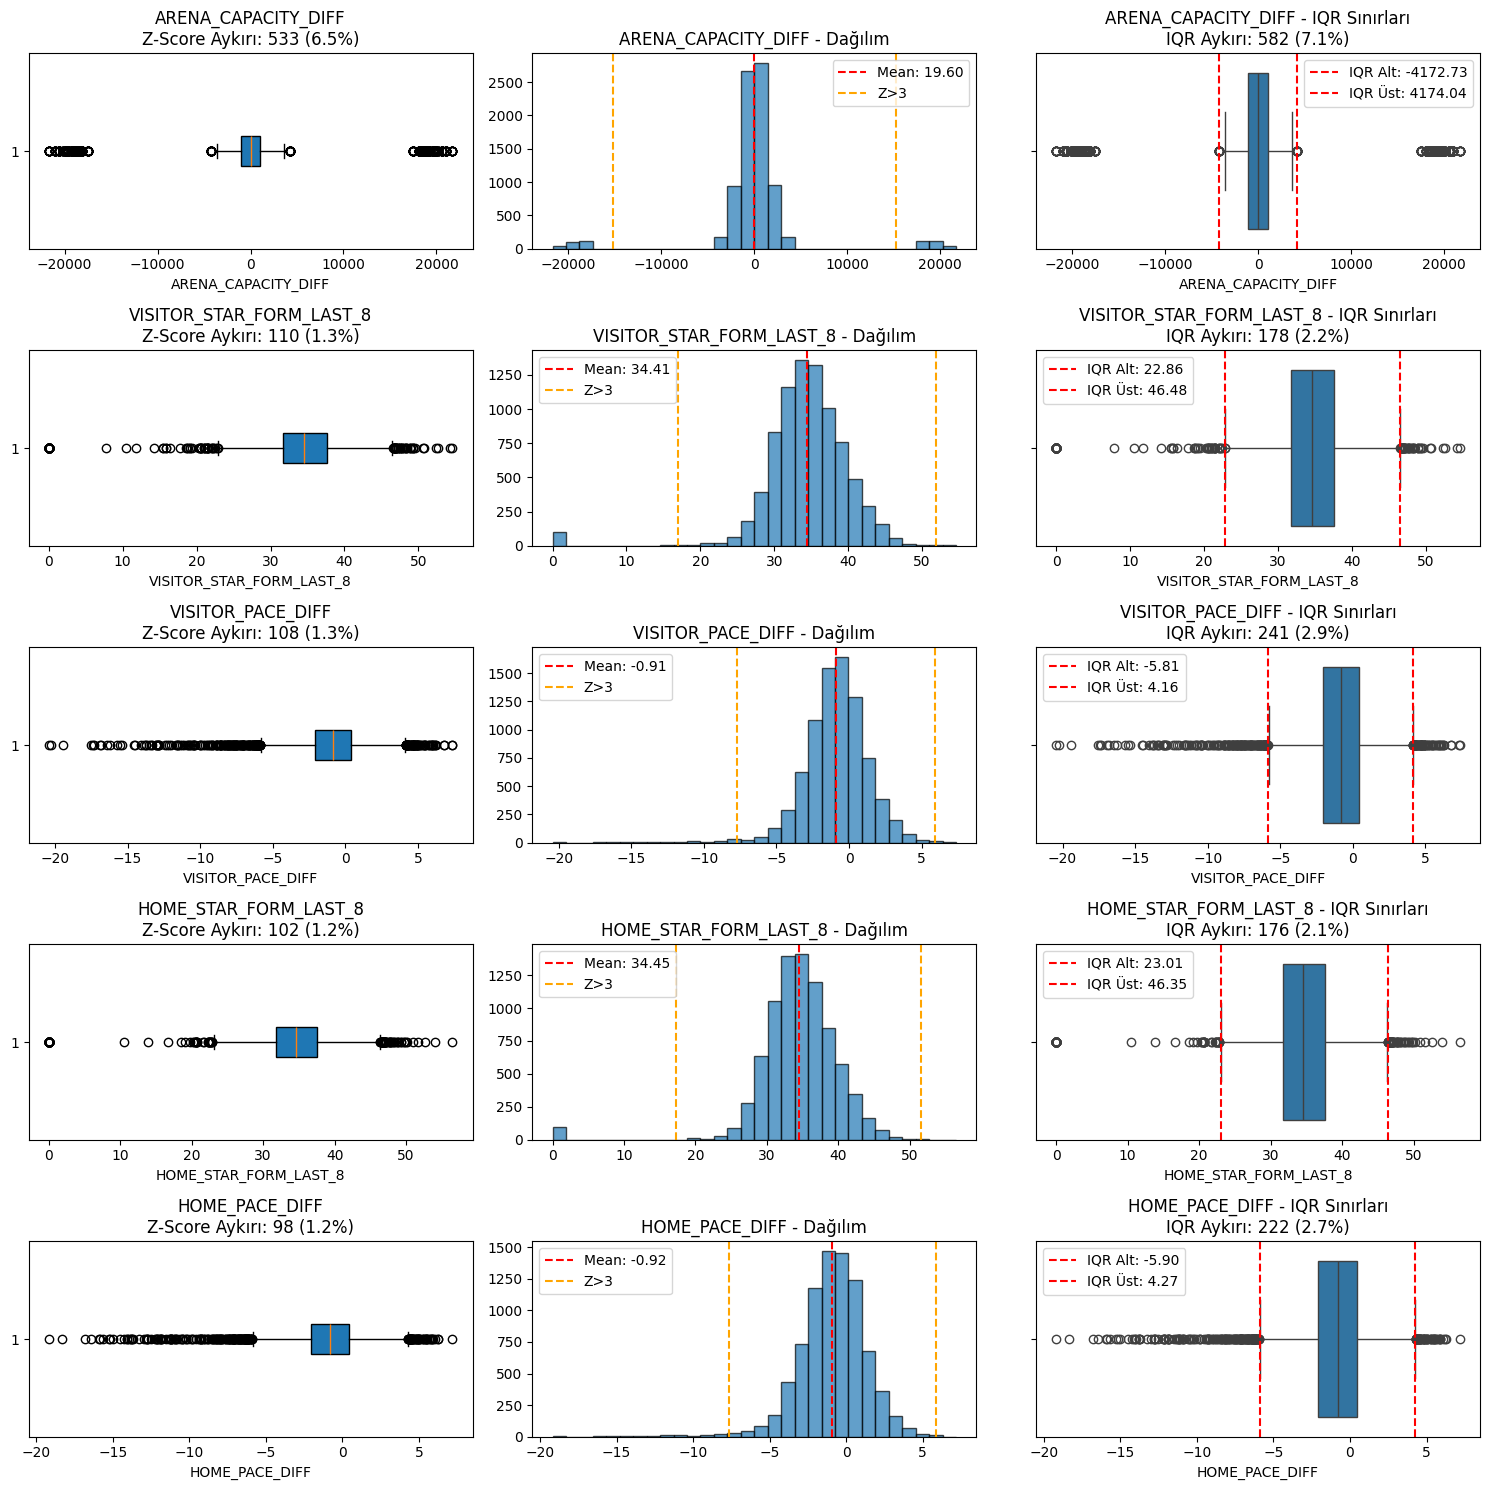


=== GENEL ÖZET ===
Z-Score ile toplam train aykırı değer: 2013
IQR ile toplam train aykırı değer: 11208
En problemli sütun (Z-Score): ARENA_CAPACITY_DIFF
En problemli sütun (IQR): VISITOR_DAYS_REST


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

def comprehensive_outlier_analysis(X_train, X_test, visualize_top=5):
    """
    Kapsamlı aykırı değer analizi - hem Z-score hem IQR metodu
    CLASSIFICATION için optimize edilmiş versiyon
    """
    print("=== KAPSAMLI AYKIRI DEĞER ANALİZİ (CLASSIFICATION) ===")
    
    # Sadece numerik sütunları al
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
    print(f"Analiz edilecek numerik sütun sayısı: {len(numeric_cols)}")
    
    outlier_results = []
    
    print(f"\n{'SÜTUN ADI':<25} {'Z-SCORE':<15} {'IQR':<15} {'TRAIN %':<10} {'TEST %':<10}")
    print("-" * 85)
    
    for col in numeric_cols:
        if X_train[col].std() == 0:  # Standart sapma 0 ise atla
            continue
            
        # === Z-SCORE METODu ===
        train_mean = X_train[col].mean()
        train_std = X_train[col].std()
        
        train_z_scores = np.abs((X_train[col] - train_mean) / train_std)
        test_z_scores = np.abs((X_test[col] - train_mean) / train_std)
        
        z_train_outliers = (train_z_scores > 3).sum()
        z_test_outliers = (test_z_scores > 3).sum()
        
        # === IQR METODu (Train'den öğren) ===
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # IQR ile aykırı değerleri say
        iqr_train_outliers = ((X_train[col] < lower_bound) | (X_train[col] > upper_bound)).sum()
        iqr_test_outliers = ((X_test[col] < lower_bound) | (X_test[col] > upper_bound)).sum()
        
        # Yüzdeler
        z_train_pct = (z_train_outliers / len(X_train)) * 100
        z_test_pct = (z_test_outliers / len(X_test)) * 100
        iqr_train_pct = (iqr_train_outliers / len(X_train)) * 100
        iqr_test_pct = (iqr_test_outliers / len(X_test)) * 100
        
        # Sonuçları kaydet
        outlier_results.append({
            'column': col,
            'z_train_outliers': z_train_outliers,
            'z_test_outliers': z_test_outliers,
            'iqr_train_outliers': iqr_train_outliers,
            'iqr_test_outliers': iqr_test_outliers,
            'z_train_pct': z_train_pct,
            'z_test_pct': z_test_pct,
            'iqr_train_pct': iqr_train_pct,
            'iqr_test_pct': iqr_test_pct,
            'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
            'lower_bound': lower_bound, 'upper_bound': upper_bound,
            'mean': train_mean, 'std': train_std
        })
        
        # Tablo çıktısı
        print(f"{col:<25} {z_train_outliers:<6}({z_train_pct:.1f}%) {iqr_train_outliers:<6}({iqr_train_pct:.1f}%) {z_train_pct:<10.1f} {z_test_pct:<10.1f}")
    
    # DataFrame'e çevir
    outlier_df = pd.DataFrame(outlier_results)
    
    # === VİZUALİZASYON ===
    print(f"\n=== EN FAZLA AYKIRI DEĞERE SAHİP TOP {visualize_top} SÜTUN ===")
    
    top_z_outliers = outlier_df.nlargest(visualize_top, 'z_train_outliers')
    
    plt.figure(figsize=(15, 3*visualize_top))
    
    for i, (idx, row) in enumerate(top_z_outliers.iterrows(), 1):
        col = row['column']
        
        # Boxplot
        plt.subplot(visualize_top, 3, i*3-2)
        plt.boxplot(X_train[col], vert=False, patch_artist=True)
        plt.title(f"{col}\nZ-Score Aykırı: {row['z_train_outliers']} ({row['z_train_pct']:.1f}%)")
        plt.xlabel(col)
        
        # Histogram
        plt.subplot(visualize_top, 3, i*3-1)
        plt.hist(X_train[col], bins=30, alpha=0.7, edgecolor='black')
        plt.axvline(row['mean'], color='red', linestyle='--', label=f'Mean: {row["mean"]:.2f}')
        plt.axvline(row['mean'] + 3*row['std'], color='orange', linestyle='--', label='Z>3')
        plt.axvline(row['mean'] - 3*row['std'], color='orange', linestyle='--')
        plt.title(f"{col} - Dağılım")
        plt.legend()
        
        # IQR boxplot
        plt.subplot(visualize_top, 3, i*3)
        sns.boxplot(x=X_train[col])
        plt.axvline(row['lower_bound'], color='red', linestyle='--', label=f'IQR Alt: {row["lower_bound"]:.2f}')
        plt.axvline(row['upper_bound'], color='red', linestyle='--', label=f'IQR Üst: {row["upper_bound"]:.2f}')
        plt.title(f"{col} - IQR Sınırları\nIQR Aykırı: {row['iqr_train_outliers']} ({row['iqr_train_pct']:.1f}%)")
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # === ÖZET ===
    print(f"\n=== GENEL ÖZET ===")
    print(f"Z-Score ile toplam train aykırı değer: {outlier_df['z_train_outliers'].sum()}")
    print(f"IQR ile toplam train aykırı değer: {outlier_df['iqr_train_outliers'].sum()}")
    print(f"En problemli sütun (Z-Score): {outlier_df.loc[outlier_df['z_train_outliers'].idxmax(), 'column']}")
    print(f"En problemli sütun (IQR): {outlier_df.loc[outlier_df['iqr_train_outliers'].idxmax(), 'column']}")
    
    return outlier_df

# Analizi çalıştır
print("🔍 AYKIRI DEĞER ANALİZİ BAŞLADI...")
outlier_analysis_results = comprehensive_outlier_analysis(X_train, X_test, visualize_top=5)

In [60]:
def treat_outliers_iqr_capping(X_train, X_test, outlier_analysis_results):
    """
    IQR metodu ile aykırı değerleri sınıra çekme (capping/winsorization)
    """
    print("=== AYKIRI DEĞER TEMİZLEME - IQR CAPPING ===")
    
    # Kopyaları oluştur (orijinal verileri korumak için)
    X_train_cleaned = X_train.copy()
    X_test_cleaned = X_test.copy()
    
    # Tedavi edilmeyecek sütunları belirle
    exclude_columns = [
        'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON',  # ID sütunları
        'HOME_B2B', 'VISITOR_B2B'  # Binary sütunlar
    ]
    
    # Sayısal ve tedavi edilecek sütunları belirle
    numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
    treatment_cols = [col for col in numeric_cols if col not in exclude_columns]
    
    print(f"Toplam numerik sütun: {len(numeric_cols)}")
    print(f"Hariç tutulan sütun: {len(exclude_columns)}")
    print(f"Tedavi edilecek sütun: {len(treatment_cols)}")
    
    # İstatistikler
    total_capped_train = 0
    total_capped_test = 0
    treatment_summary = []
    
    print(f"\n{'SÜTUN ADI':<25} {'ÖNCESİ':<12} {'SONRASI':<12} {'CAPPEد':<10} {'ORAN %':<8}")
    print("-" * 70)
    
    for col in treatment_cols:
        if col not in outlier_analysis_results['column'].values:
            continue
            
        # IQR sınırlarını al (train'den öğrenilmiş)
        col_data = outlier_analysis_results[outlier_analysis_results['column'] == col].iloc[0]
        lower_bound = col_data['lower_bound']
        upper_bound = col_data['upper_bound']
        
        # Önceki aykırı değer sayısı
        before_train = col_data['iqr_train_outliers']
        before_test = col_data['iqr_test_outliers']
        
        # TRAIN SETİNDE CAPPING
        # Alt sınırın altındaki değerleri alt sınıra çek
        below_lower_train = (X_train_cleaned[col] < lower_bound).sum()
        X_train_cleaned.loc[X_train_cleaned[col] < lower_bound, col] = lower_bound
        
        # Üst sınırın üstündeki değerleri üst sınıra çek
        above_upper_train = (X_train_cleaned[col] > upper_bound).sum()
        X_train_cleaned.loc[X_train_cleaned[col] > upper_bound, col] = upper_bound
        
        # TEST SETİNDE CAPPING
        below_lower_test = (X_test_cleaned[col] < lower_bound).sum()
        X_test_cleaned.loc[X_test_cleaned[col] < lower_bound, col] = lower_bound
        
        above_upper_test = (X_test_cleaned[col] > upper_bound).sum()
        X_test_cleaned.loc[X_test_cleaned[col] > upper_bound, col] = upper_bound
        
        # Sonrası kontrol (teoride 0 olmalı)
        after_train = ((X_train_cleaned[col] < lower_bound) | (X_train_cleaned[col] > upper_bound)).sum()
        after_test = ((X_test_cleaned[col] < lower_bound) | (X_test_cleaned[col] > upper_bound)).sum()
        
        # Toplam capped değer sayısı
        total_capped_col_train = below_lower_train + above_upper_train
        total_capped_col_test = below_lower_test + above_upper_test
        
        total_capped_train += total_capped_col_train
        total_capped_test += total_capped_col_test
        
        # İstatistik kaydet
        treatment_summary.append({
            'column': col,
            'before_train': before_train,
            'before_test': before_test,
            'after_train': after_train,
            'after_test': after_test,
            'capped_train': total_capped_col_train,
            'capped_test': total_capped_col_test,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        })
        
        # Rapor satırı
        capped_pct = (total_capped_col_train / len(X_train)) * 100
        print(f"{col:<25} {before_train:<12} {after_train:<12} {total_capped_col_train:<10} {capped_pct:<8.1f}")
    
    # === ÖZET RAPOR ===
    print(f"\n=== TEMİZLEME ÖZETİ ===")
    print(f"✅ Tedavi edilen sütun sayısı: {len(treatment_cols)}")
    print(f"🔧 Toplam capped değer (train): {total_capped_train}")
    print(f"🔧 Toplam capped değer (test): {total_capped_test}")
    print(f"📊 Train capping oranı: {(total_capped_train/(len(X_train)*len(treatment_cols)))*100:.2f}%")
    print(f"📊 Test capping oranı: {(total_capped_test/(len(X_test)*len(treatment_cols)))*100:.2f}%")
    
    # En çok capped olan sütunları göster
    treatment_df = pd.DataFrame(treatment_summary)
    if len(treatment_df) > 0:
        top_capped = treatment_df.nlargest(5, 'capped_train')
        print(f"\n📈 EN ÇOK CAPPED OLAN SÜTUNLAR:")
        for _, row in top_capped.iterrows():
            print(f"  {row['column']}: {row['capped_train']} değer ({(row['capped_train']/len(X_train))*100:.1f}%)")
    
    # Doğrulama: Capping sonrası aykırı değer kontrolü
    print(f"\n=== DOĞRULAMA ===")
    remaining_outliers_train = 0
    remaining_outliers_test = 0
    
    for col in treatment_cols:
        if col not in outlier_analysis_results['column'].values:
            continue
            
        col_data = outlier_analysis_results[outlier_analysis_results['column'] == col].iloc[0]
        lower_bound = col_data['lower_bound']
        upper_bound = col_data['upper_bound']
        
        remaining_train = ((X_train_cleaned[col] < lower_bound) | (X_train_cleaned[col] > upper_bound)).sum()
        remaining_test = ((X_test_cleaned[col] < lower_bound) | (X_test_cleaned[col] > upper_bound)).sum()
        
        remaining_outliers_train += remaining_train
        remaining_outliers_test += remaining_test
    
    print(f"🎯 Kalan aykırı değer (train): {remaining_outliers_train}")
    print(f"🎯 Kalan aykırı değer (test): {remaining_outliers_test}")
    
    if remaining_outliers_train == 0 and remaining_outliers_test == 0:
        print("✅ TÜM AYKIRI DEĞERLER BAŞARIYLA TEMİZLENDİ!")
    else:
        print("⚠️ Bazı aykırı değerler kalmış olabilir (farklı metodlarla)")
    
    return X_train_cleaned, X_test_cleaned, treatment_df

# Aykırı değer temizleme işlemini uygula
X_train_cleaned, X_test_cleaned, treatment_summary = treat_outliers_iqr_capping(
    X_train, X_test, outlier_analysis_results
)

=== AYKIRI DEĞER TEMİZLEME - IQR CAPPING ===
Toplam numerik sütun: 38
Hariç tutulan sütun: 5
Tedavi edilecek sütun: 33

SÜTUN ADI                 ÖNCESİ       SONRASI      CAPPEد     ORAN %  
----------------------------------------------------------------------
ARENA_CAPACITY_DIFF       582          0            582        7.1     
HOME_RANK_W_PCT           106          0            106        1.3     
VISITOR_RANK_W_PCT        213          0            213        2.6     
HOME_WINS_PCT             163          0            163        2.0     
VISITOR_ROAD_WINS_PCT     164          0            164        2.0     
HOME_DAYS_REST            393          0            393        4.8     
VISITOR_DAYS_REST         3768         0            3768       45.7    
HOME_PACE_LAST_8          49           0            49         0.6     
HOME_PACE_SEASON          100          0            100        1.2     
HOME_PACE_DIFF            222          0            222        2.7     
HOME_eFG_PCT_LAST

In [61]:
def verify_outlier_treatment(X_train_original, X_test_original, X_train_cleaned, X_test_cleaned):
    """
    Aykırı değer temizleme işleminin başarısını doğrula
    """
    print("=== AYKIRI DEĞER TEMİZLEME DOĞRULAMA ===")
    
    # Sadece numerik sütunları al (hariç tutulanlar çıkarılacak)
    exclude_columns = ['HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'HOME_B2B', 'VISITOR_B2B']
    numeric_cols = X_train_original.select_dtypes(include=[np.number]).columns.tolist()
    analysis_cols = [col for col in numeric_cols if col not in exclude_columns]
    
    print(f"Doğrulama yapılacak sütun sayısı: {len(analysis_cols)}")
    
    verification_results = []
    
    print(f"\n{'SÜTUN ADI':<25} {'ÖNCE-Z':<10} {'SONRA-Z':<10} {'ÖNCE-IQR':<10} {'SONRA-IQR':<10} {'BAŞARI':<8}")
    print("-" * 85)
    
    for col in analysis_cols:
        if X_train_original[col].std() == 0:  # Standart sapma 0 ise atla
            continue
            
        # === ORİJİNAL VERİDEKİ AYKIRI DEĞERLER ===
        # Z-Score (train'den öğren)
        train_mean = X_train_original[col].mean()
        train_std = X_train_original[col].std()
        
        original_z_train = (np.abs((X_train_original[col] - train_mean) / train_std) > 3).sum()
        original_z_test = (np.abs((X_test_original[col] - train_mean) / train_std) > 3).sum()
        
        # IQR (train'den öğren)
        Q1 = X_train_original[col].quantile(0.25)
        Q3 = X_train_original[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        original_iqr_train = ((X_train_original[col] < lower_bound) | (X_train_original[col] > upper_bound)).sum()
        original_iqr_test = ((X_test_original[col] < lower_bound) | (X_test_original[col] > upper_bound)).sum()
        
        # === TEMİZLENMİŞ VERİDEKİ AYKIRI DEĞERLER ===
        # Aynı parametrelerle temizlenmiş veride kontrol et
        cleaned_z_train = (np.abs((X_train_cleaned[col] - train_mean) / train_std) > 3).sum()
        cleaned_z_test = (np.abs((X_test_cleaned[col] - train_mean) / train_std) > 3).sum()
        
        cleaned_iqr_train = ((X_train_cleaned[col] < lower_bound) | (X_train_cleaned[col] > upper_bound)).sum()
        cleaned_iqr_test = ((X_test_cleaned[col] < lower_bound) | (X_test_cleaned[col] > upper_bound)).sum()
        
        # Başarı kontrolü (IQR ile temizleme yaptığımız için IQR'da 0 olmalı)
        iqr_success = (cleaned_iqr_train == 0 and cleaned_iqr_test == 0)
        success_mark = "✅" if iqr_success else "❌"
        
        # Sonuçları kaydet
        verification_results.append({
            'column': col,
            'original_z_train': original_z_train,
            'original_z_test': original_z_test,
            'original_iqr_train': original_iqr_train,
            'original_iqr_test': original_iqr_test,
            'cleaned_z_train': cleaned_z_train,
            'cleaned_z_test': cleaned_z_test,
            'cleaned_iqr_train': cleaned_iqr_train,
            'cleaned_iqr_test': cleaned_iqr_test,
            'iqr_success': iqr_success
        })
        
        # Tablo çıktısı
        print(f"{col:<25} {original_z_train:<10} {cleaned_z_train:<10} {original_iqr_train:<10} {cleaned_iqr_train:<10} {success_mark:<8}")
    
    # === ÖZET İSTATİSTİKLER ===
    verification_df = pd.DataFrame(verification_results)
    
    # Toplam azalma
    total_original_z = verification_df['original_z_train'].sum()
    total_cleaned_z = verification_df['cleaned_z_train'].sum()
    total_original_iqr = verification_df['original_iqr_train'].sum()
    total_cleaned_iqr = verification_df['cleaned_iqr_train'].sum()
    
    # Başarı oranı
    successful_cols = verification_df['iqr_success'].sum()
    total_cols = len(verification_df)
    success_rate = (successful_cols / total_cols) * 100 if total_cols > 0 else 0
    
    print(f"\n=== DOĞRULAMA ÖZETİ ===")
    print(f"📊 **Z-SCORE AYKIRI DEĞERLER (TRAIN):**")
    print(f"   Önce: {total_original_z}")
    print(f"   Sonra: {total_cleaned_z}")
    print(f"   Azalma: {total_original_z - total_cleaned_z} ({((total_original_z - total_cleaned_z)/total_original_z)*100:.1f}%)")
    
    print(f"\n📊 **IQR AYKIRI DEĞERLER (TRAIN):**")
    print(f"   Önce: {total_original_iqr}")
    print(f"   Sonra: {total_cleaned_iqr}")
    print(f"   Azalma: {total_original_iqr - total_cleaned_iqr} ({((total_original_iqr - total_cleaned_iqr)/total_original_iqr)*100:.1f}%)")
    
    print(f"\n🎯 **BAŞARI ORANI:**")
    print(f"   Başarılı sütun: {successful_cols}/{total_cols}")
    print(f"   Başarı oranı: {success_rate:.1f}%")
    
    if success_rate == 100:
        print("\n🎉 **MÜKEMMEL! TÜM SÜTUNLARDA IQR AYKIRI DEĞERLER BAŞARIYLA TEMİZLENDİ!**")
    elif success_rate >= 90:
        print(f"\n✅ **ÇOK İYİ! %{success_rate:.1f} başarı oranıyla temizleme tamamlandı.**")
    else:
        print(f"\n⚠️ **DİKKAT! %{success_rate:.1f} başarı oranı. Bazı sütunlarda sorun var.**")
        
        # Başarısız sütunları göster
        failed_cols = verification_df[~verification_df['iqr_success']]
        if len(failed_cols) > 0:
            print("\n❌ **BAŞARISIZ SÜTUNLAR:**")
            for _, row in failed_cols.iterrows():
                print(f"   {row['column']}: IQR Train={row['cleaned_iqr_train']}, Test={row['cleaned_iqr_test']}")
    
    # === VERİ BOYUTU KONTROLÜ ===
    print(f"\n📏 **VERİ BOYUTU KONTROLÜ:**")
    print(f"   Orijinal Train: {X_train_original.shape}")
    print(f"   Temizlenmiş Train: {X_train_cleaned.shape}")
    print(f"   Orijinal Test: {X_test_original.shape}")
    print(f"   Temizlenmiş Test: {X_test_cleaned.shape}")
    
    if (X_train_original.shape == X_train_cleaned.shape and 
        X_test_original.shape == X_test_cleaned.shape):
        print("✅ **VERİ BOYUTLARI KORUNDU (CAPPING BAŞARILI)**")
    else:
        print("❌ **UYARI: VERİ BOYUTLARI DEĞİŞTİ**")
    
    return verification_df

# Doğrulama işlemini çalıştır
verification_results = verify_outlier_treatment(X_train, X_test, X_train_cleaned, X_test_cleaned)

=== AYKIRI DEĞER TEMİZLEME DOĞRULAMA ===
Doğrulama yapılacak sütun sayısı: 33

SÜTUN ADI                 ÖNCE-Z     SONRA-Z    ÖNCE-IQR   SONRA-IQR  BAŞARI  
-------------------------------------------------------------------------------------
ARENA_CAPACITY_DIFF       533        0          582        0          ✅       
HOME_RANK_W_PCT           0          0          106        0          ✅       
VISITOR_RANK_W_PCT        0          0          213        0          ✅       
HOME_WINS_PCT             0          0          163        0          ✅       
VISITOR_ROAD_WINS_PCT     0          0          164        0          ✅       
HOME_DAYS_REST            88         0          393        0          ✅       
VISITOR_DAYS_REST         84         0          3768       0          ✅       
HOME_PACE_LAST_8          17         0          49         0          ✅       
HOME_PACE_SEASON          54         0          100        0          ✅       
HOME_PACE_DIFF            98         0       

=== SÜPER BÜYÜK KORELASYON MATRİSİ + TARGET KORELASYONU ===

🎯 TARGET İLE EN YÜKSEK KORELASYONLAR:
 1. HOME_WINS_PCT               0.404
 2. VISITOR_ROAD_WINS_PCT      -0.380
 3. HOME_RANK_W_PCT             0.362
 4. HOME_NETRTG_SEASON          0.338
 5. VISITOR_RANK_W_PCT         -0.327
 6. VISITOR_NETRTG_SEASON      -0.309
 7. HOME_NETRTG_LAST_8          0.214
 8. VISITOR_TS_PCT_SEASON      -0.209
 9. HOME_TS_PCT_SEASON          0.208
10. HOME_eFG_PCT_SEASON         0.202


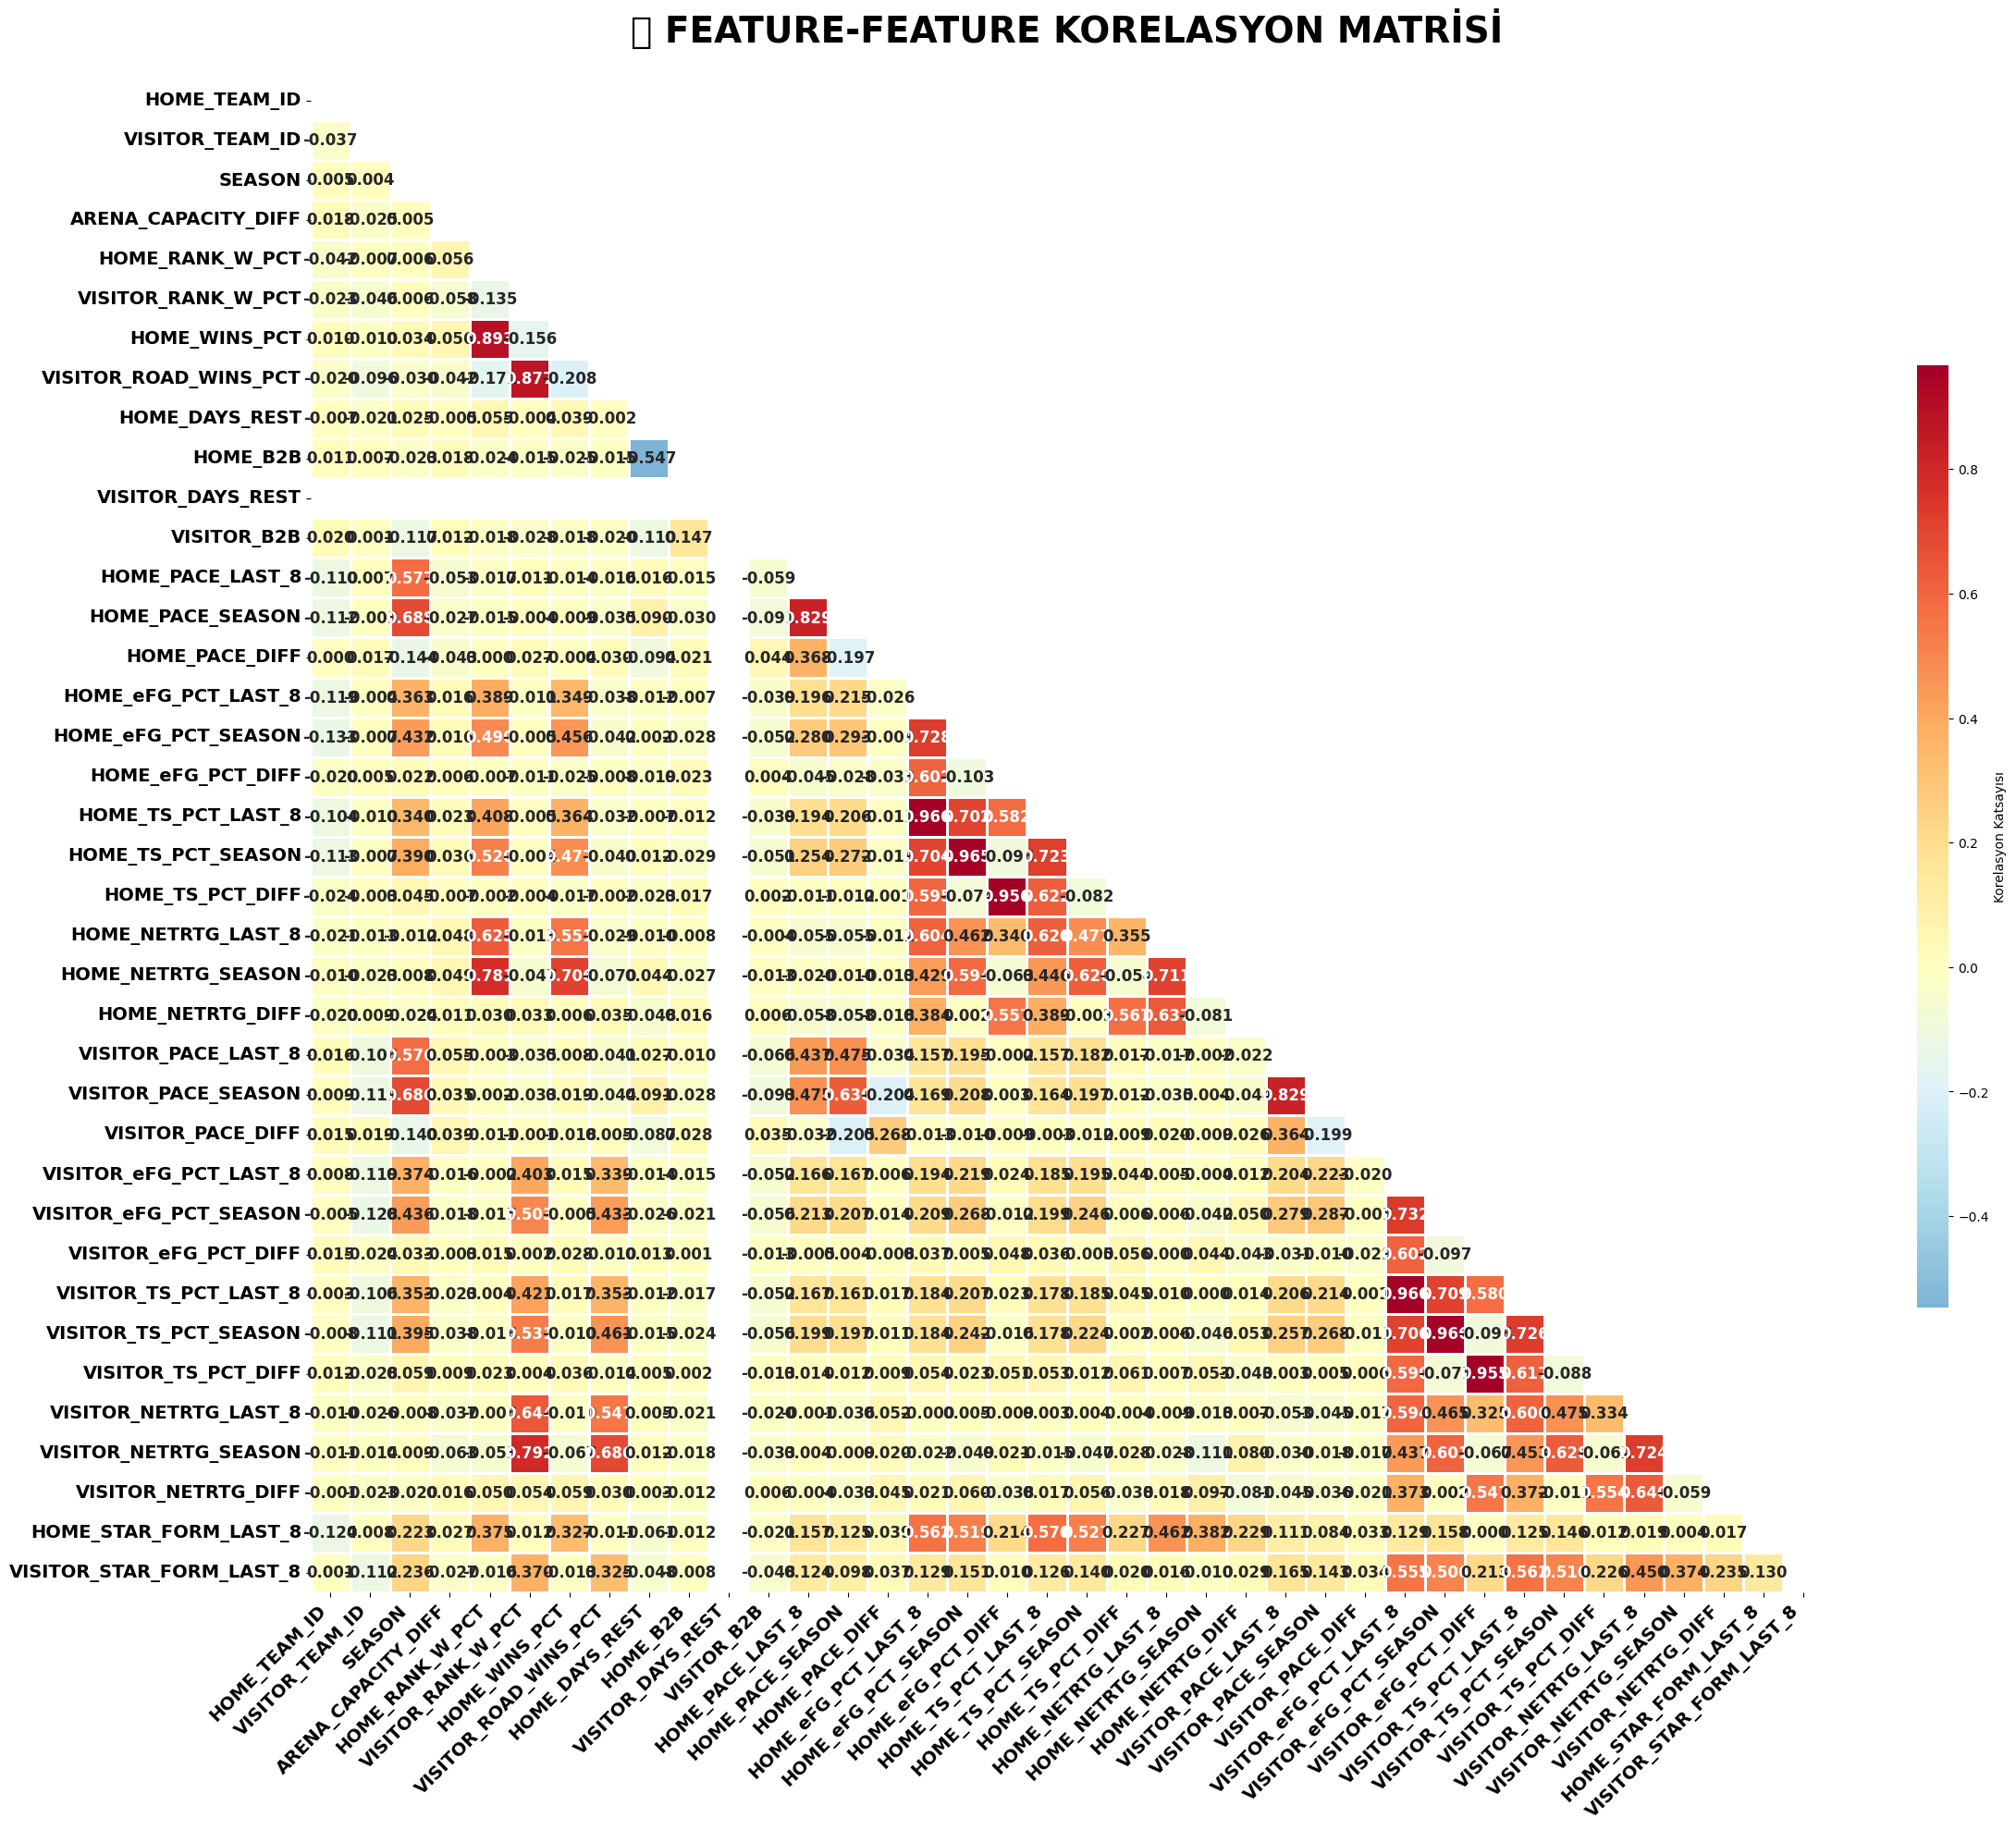

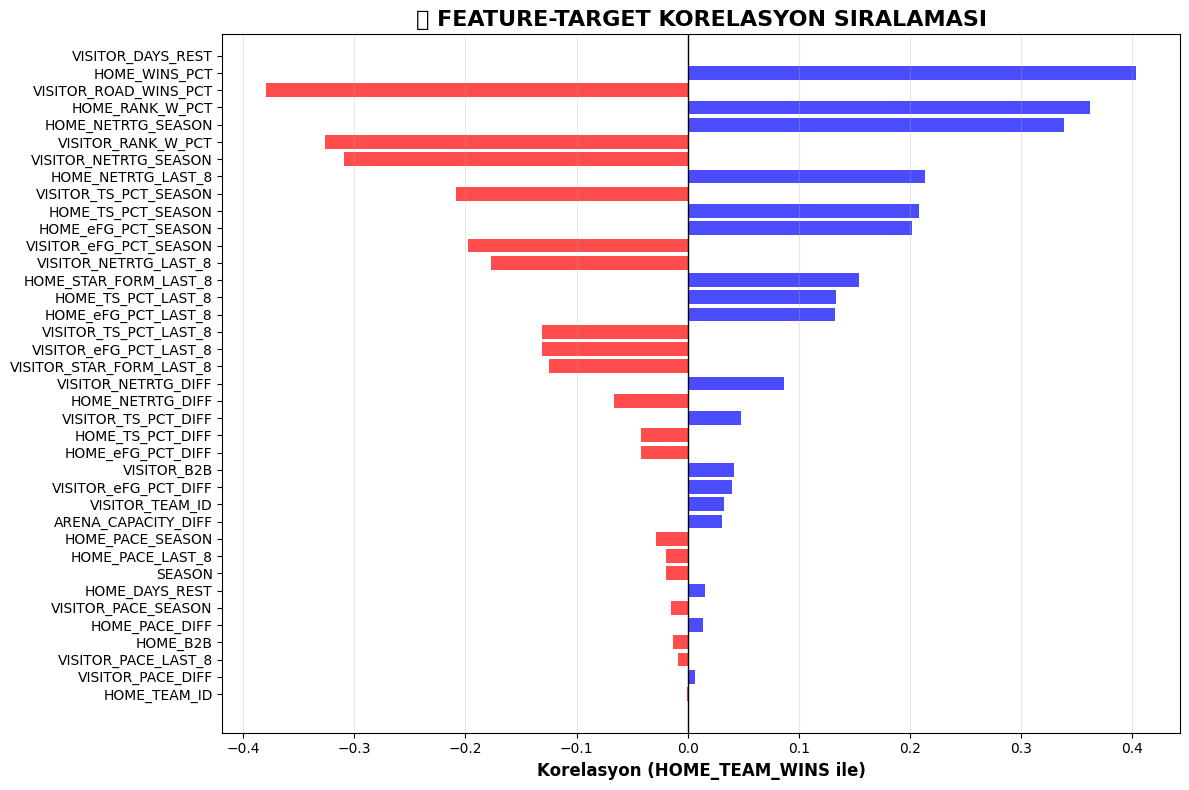

✅ 'correlation_matrix_CLASSIFICATION_MEGA.png' olarak kaydedildi!


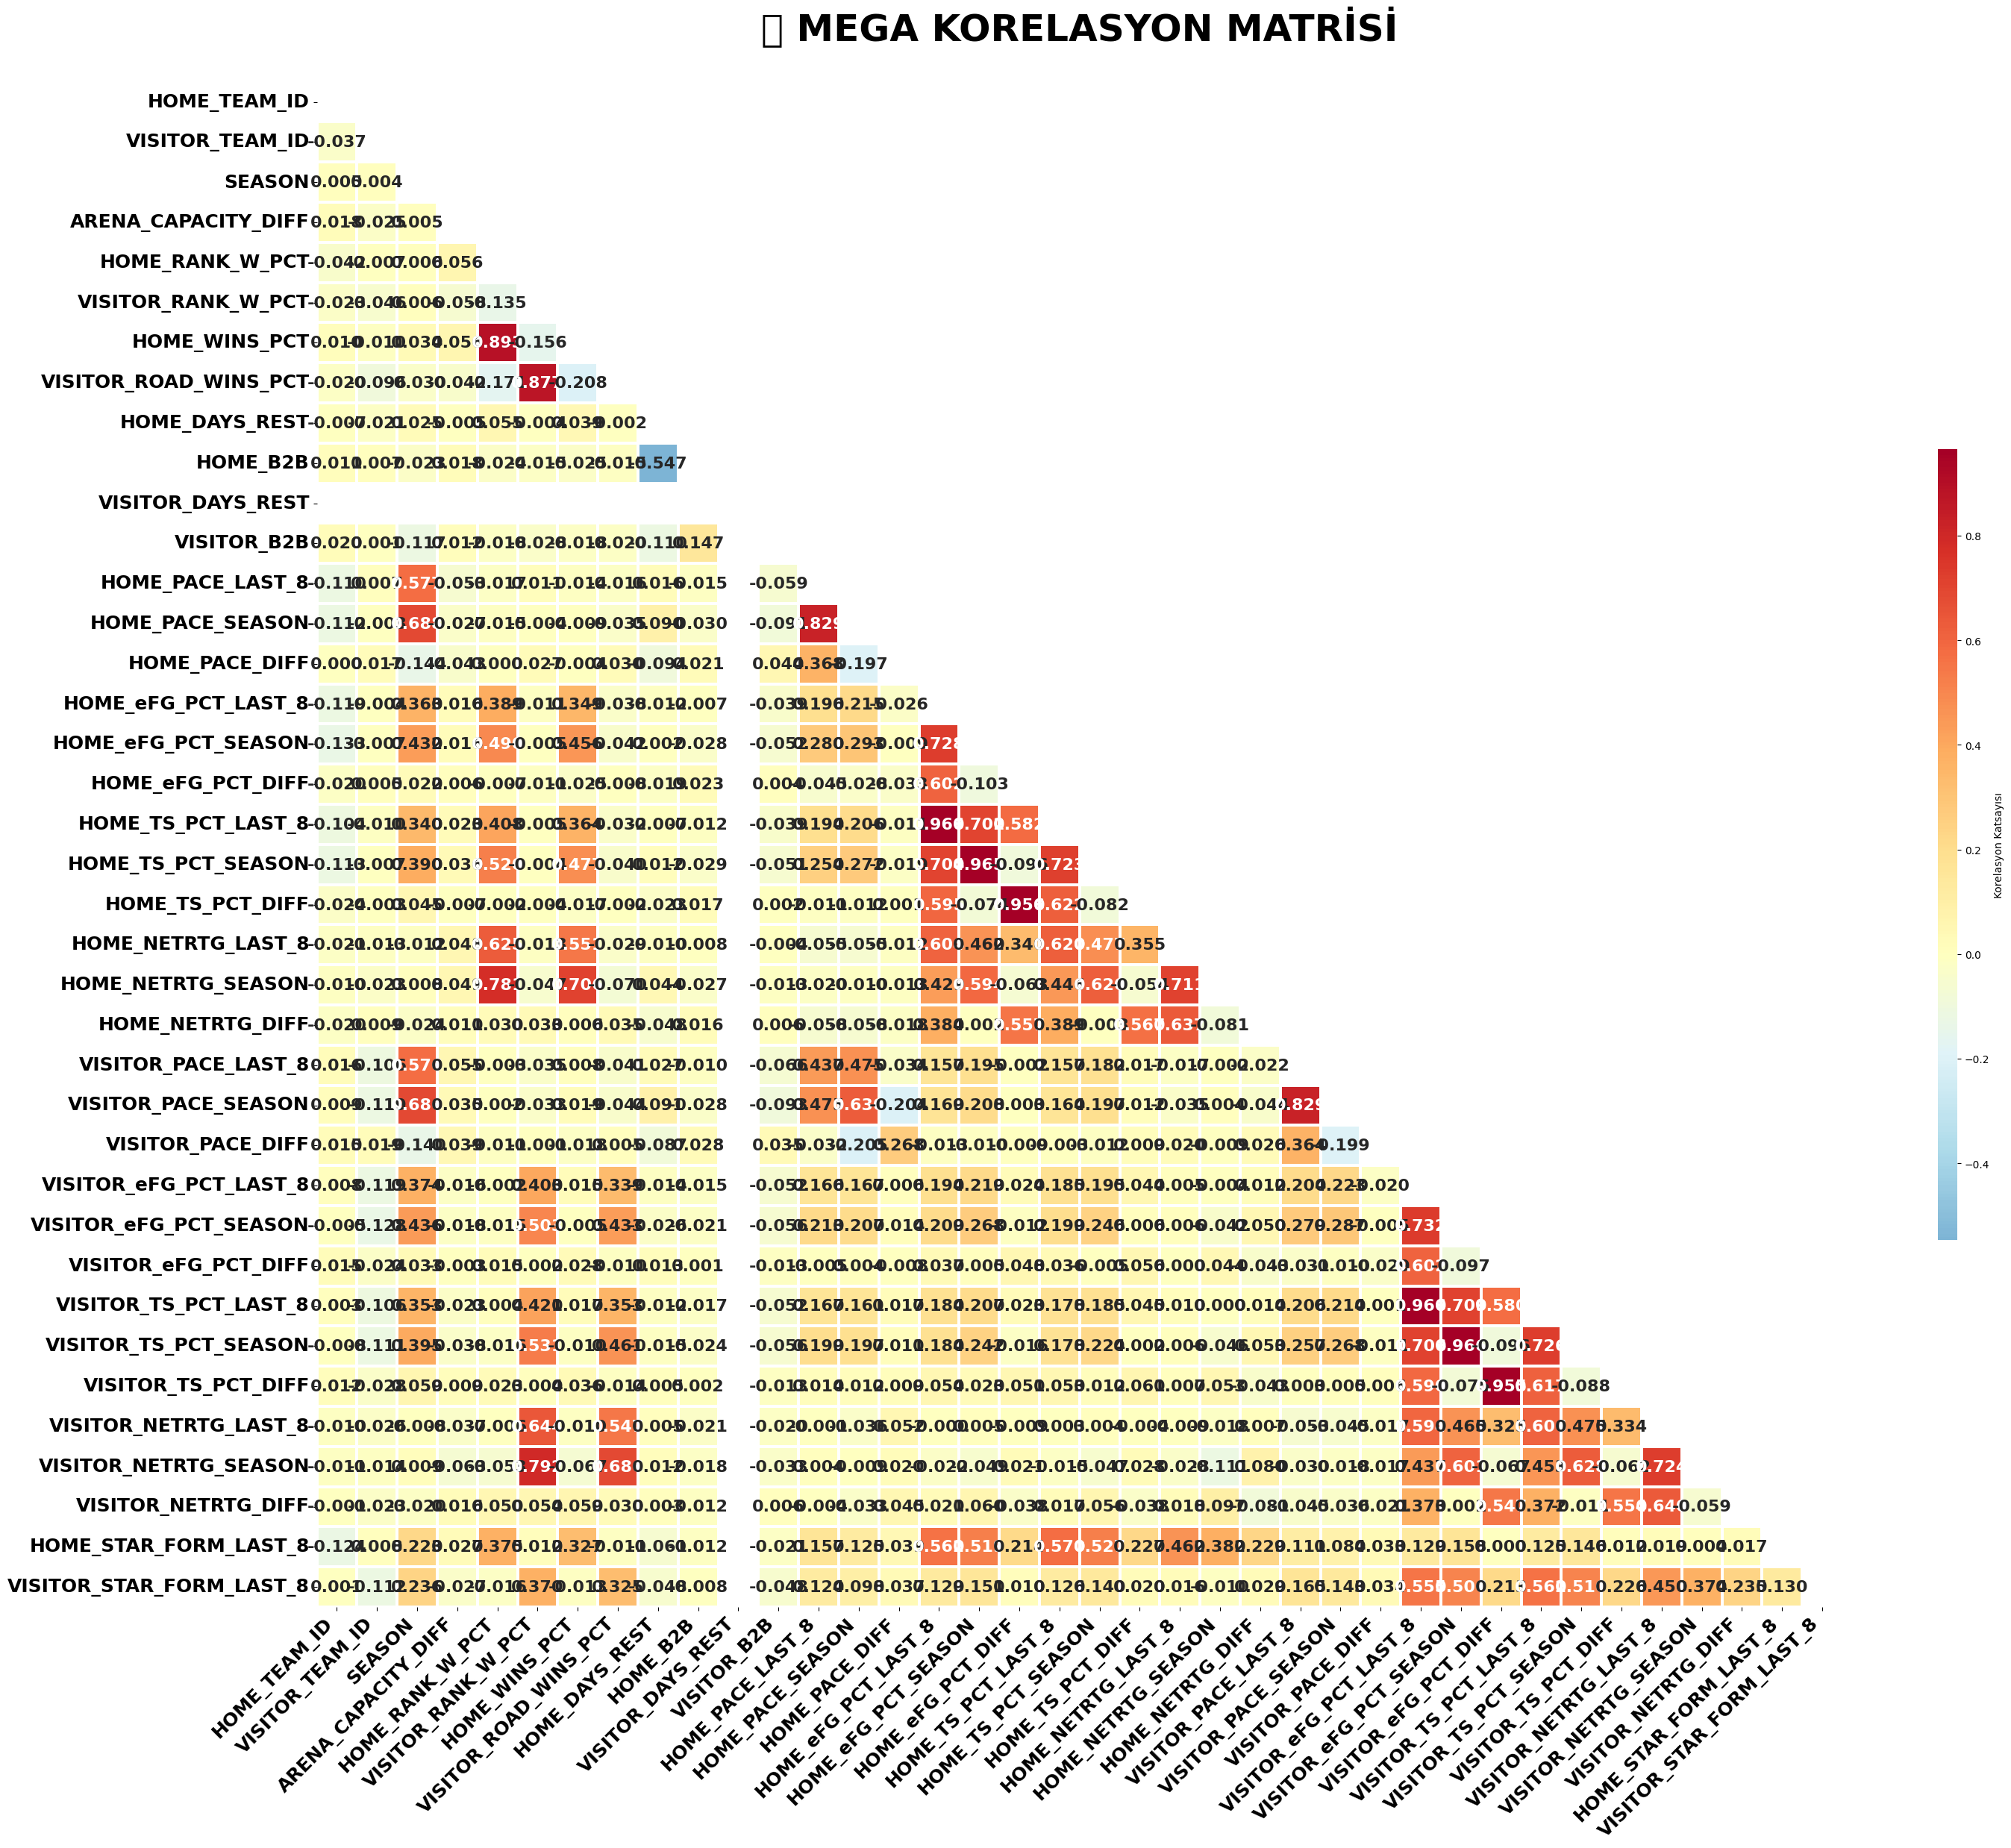


📊 Feature Matrix boyutu: (38, 38)
🎯 En yüksek target korelasyon: 0.404


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def huge_correlation_matrix(X_train_cleaned, y_train):
    """
    Çok büyük ve detaylı korelasyon matrisi + TARGET KORELASYONU
    """
    print("=== SÜPER BÜYÜK KORELASYON MATRİSİ + TARGET KORELASYONU ===")
    
    # Feature-Feature Korelasyon
    numeric_cols = X_train_cleaned.select_dtypes(include=[np.number]).columns.tolist()
    feature_corr = X_train_cleaned[numeric_cols].corr()
    
    # Target ile Korelasyon
    target_corr = X_train_cleaned[numeric_cols].corrwith(y_train).sort_values(key=abs, ascending=False)
    
    print(f"\n🎯 TARGET İLE EN YÜKSEK KORELASYONLAR:")
    print("="*50)
    for i, (feature, corr_val) in enumerate(target_corr.head(10).items(), 1):
        print(f"{i:2d}. {feature:<25} {corr_val:>7.3f}")
    
    # ÇOK BÜYÜK FİGÜR - FEATURE KORELASYONU
    plt.figure(figsize=(24, 20))
    mask = np.triu(np.ones_like(feature_corr, dtype=bool))
    
    sns.heatmap(feature_corr, 
                mask=mask,                    
                annot=True,                   
                cmap='RdYlBu_r',             
                center=0,                     
                square=True,                  
                fmt='.3f',                    
                linewidths=1,                 
                cbar_kws={'label': 'Korelasyon Katsayısı', 
                         'shrink': 0.6, 'aspect': 30},
                annot_kws={'size': 12, 'weight': 'bold'})
    
    plt.title('🔥 FEATURE-FEATURE KORELASYON MATRİSİ', 
              fontsize=28, fontweight='bold', pad=30)
    plt.xticks(rotation=45, ha='right', fontsize=14, weight='bold')
    plt.yticks(rotation=0, fontsize=14, weight='bold')
    plt.tight_layout()
    plt.show()
    
    # TARGET KORELASYON GRAFİĞİ
    plt.figure(figsize=(12, 8))
    target_corr_abs = target_corr.abs().sort_values(ascending=True)
    
    colors = ['red' if x < 0 else 'blue' for x in target_corr[target_corr_abs.index]]
    
    plt.barh(range(len(target_corr_abs)), target_corr[target_corr_abs.index], color=colors, alpha=0.7)
    plt.yticks(range(len(target_corr_abs)), target_corr_abs.index, fontsize=10)
    plt.xlabel('Korelasyon (HOME_TEAM_WINS ile)', fontsize=12, weight='bold')
    plt.title('🎯 FEATURE-TARGET KORELASYON SIRALAMASI', fontsize=16, weight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # 0 çizgisi ekle
    plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
    
    plt.tight_layout()
    plt.show()
    
    # MEGA VERSION KAYDET
    plt.figure(figsize=(30, 25))
    sns.heatmap(feature_corr, 
                mask=mask,                    
                annot=True,                   
                cmap='RdYlBu_r',             
                center=0,                     
                square=True,                  
                fmt='.3f',                    
                linewidths=1.5,               
                cbar_kws={'label': 'Korelasyon Katsayısı', 
                         'shrink': 0.5, 'aspect': 40},
                annot_kws={'size': 16, 'weight': 'bold'})
    
    plt.title('🔥 MEGA KORELASYON MATRİSİ', 
              fontsize=36, fontweight='bold', pad=40)
    plt.xticks(rotation=45, ha='right', fontsize=18, weight='bold')
    plt.yticks(rotation=0, fontsize=18, weight='bold')
    plt.tight_layout()
    
    filename = 'correlation_matrix_CLASSIFICATION_MEGA.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✅ '{filename}' olarak kaydedildi!")
    plt.show()
    
    print(f"\n📊 Feature Matrix boyutu: {feature_corr.shape}")
    print(f"🎯 En yüksek target korelasyon: {target_corr.abs().max():.3f}")
    
    return feature_corr, target_corr

# MEGA korelasyon matrisini çalıştır
feature_corr, target_corr = huge_correlation_matrix(X_train_cleaned, y_train)

In [63]:
def find_high_correlations(feature_corr, min_threshold=0.50, max_threshold=0.99):
    """
    Korelasyon matrisinde belirli aralıktaki ilişkileri bul
    """
    print(f"=== {min_threshold:.2f} - {max_threshold:.2f} ARASI KORELASYONLAR ===")
    
    high_correlations = []
    
    # Matrisin alt üçgenini tara (tekrarları önlemek için)
    for i in range(len(feature_corr.columns)):
        for j in range(i+1, len(feature_corr.columns)):
            feature1 = feature_corr.columns[i]
            feature2 = feature_corr.columns[j]
            correlation = feature_corr.iloc[i, j]
            abs_correlation = abs(correlation)
            
            # Belirtilen aralıkta mı?
            if min_threshold <= abs_correlation <= max_threshold:
                high_correlations.append({
                    'Feature_1': feature1,
                    'Feature_2': feature2,
                    'Correlation': correlation,
                    'Abs_Correlation': abs_correlation,
                    'Direction': 'Pozitif' if correlation > 0 else 'Negatif'
                })
    
    # DataFrame'e çevir ve sırala
    if len(high_correlations) > 0:
        df_high_corr = pd.DataFrame(high_correlations)
        df_high_corr = df_high_corr.sort_values('Abs_Correlation', ascending=False)
        
        print(f"\n📊 TOPLAM {len(df_high_corr)} YÜKSEK KORELASYON BULUNDU:")
        print("=" * 80)
        print(f"{'#':<3} {'FEATURE 1':<25} {'FEATURE 2':<25} {'KORELASYON':<12} {'YÖN':<10}")
        print("-" * 80)
        
        for idx, (_, row) in enumerate(df_high_corr.iterrows(), 1):
            direction_icon = "📈" if row['Direction'] == 'Pozitif' else "📉"
            strength_icon = "🔥" if row['Abs_Correlation'] > 0.8 else "⚡" if row['Abs_Correlation'] > 0.7 else "💫"
            
            print(f"{idx:<3} {row['Feature_1']:<25} {row['Feature_2']:<25} "
                  f"{row['Correlation']:+.4f}    {direction_icon} {strength_icon}")
        
        # Özet istatistikler
        print(f"\n📈 ÖZET İSTATİSTİKLER:")
        print("-" * 40)
        print(f"Pozitif korelasyon: {len(df_high_corr[df_high_corr['Direction'] == 'Pozitif'])}")
        print(f"Negatif korelasyon: {len(df_high_corr[df_high_corr['Direction'] == 'Negatif'])}")
        print(f"Çok güçlü (>0.8): {len(df_high_corr[df_high_corr['Abs_Correlation'] > 0.8])}")
        print(f"Güçlü (0.7-0.8): {len(df_high_corr[(df_high_corr['Abs_Correlation'] > 0.7) & (df_high_corr['Abs_Correlation'] <= 0.8)])}")
        print(f"Orta (0.5-0.7): {len(df_high_corr[(df_high_corr['Abs_Correlation'] >= 0.5) & (df_high_corr['Abs_Correlation'] <= 0.7)])}")
        print(f"En yüksek: {df_high_corr.iloc[0]['Abs_Correlation']:.4f}")
        print(f"En düşük: {df_high_corr.iloc[-1]['Abs_Correlation']:.4f}")
        
        # Kategorize et
        print(f"\n🎯 KATEGORİ ANALIZI:")
        print("-" * 40)
        
        # Feature tiplerini analiz et
        home_visitor_pairs = df_high_corr[
            (df_high_corr['Feature_1'].str.startswith('HOME_') & 
             df_high_corr['Feature_2'].str.startswith('VISITOR_')) |
            (df_high_corr['Feature_1'].str.startswith('VISITOR_') & 
             df_high_corr['Feature_2'].str.startswith('HOME_'))
        ]
        
        same_metric_pairs = df_high_corr[
            df_high_corr.apply(lambda x: 
                any(metric in x['Feature_1'] and metric in x['Feature_2'] 
                    for metric in ['PACE', 'eFG', 'TS', 'NETRTG', 'STAR']), axis=1)
        ]
        
        print(f"HOME-VISITOR çiftleri: {len(home_visitor_pairs)}")
        print(f"Aynı metrik çiftleri: {len(same_metric_pairs)}")
        
        return df_high_corr
    
    else:
        print(f"\n❌ {min_threshold:.2f} - {max_threshold:.2f} aralığında korelasyon bulunamadı!")
        return pd.DataFrame()

# 0.50 - 0.99 arası korelasyonları bul
high_corr_results = find_high_correlations(feature_corr, min_threshold=0.50, max_threshold=0.99)

# Farklı aralıklar için de test edebilirsin:
print("\n" + "="*60)
print("🔍 DİĞER ARALIKLAR:")

# Çok güçlü korelasyonlar (0.80+)
very_high = find_high_correlations(feature_corr, min_threshold=0.80, max_threshold=0.99)

# Orta seviye korelasyonlar (0.30-0.60)
medium = find_high_correlations(feature_corr, min_threshold=0.30, max_threshold=0.60)

=== 0.50 - 0.99 ARASI KORELASYONLAR ===

📊 TOPLAM 67 YÜKSEK KORELASYON BULUNDU:
#   FEATURE 1                 FEATURE 2                 KORELASYON   YÖN       
--------------------------------------------------------------------------------
1   VISITOR_eFG_PCT_SEASON    VISITOR_TS_PCT_SEASON     +0.9662    📈 🔥
2   HOME_eFG_PCT_LAST_8       HOME_TS_PCT_LAST_8        +0.9660    📈 🔥
3   VISITOR_eFG_PCT_LAST_8    VISITOR_TS_PCT_LAST_8     +0.9658    📈 🔥
4   HOME_eFG_PCT_SEASON       HOME_TS_PCT_SEASON        +0.9652    📈 🔥
5   HOME_eFG_PCT_DIFF         HOME_TS_PCT_DIFF          +0.9560    📈 🔥
6   VISITOR_eFG_PCT_DIFF      VISITOR_TS_PCT_DIFF       +0.9551    📈 🔥
7   HOME_RANK_W_PCT           HOME_WINS_PCT             +0.8931    📈 🔥
8   VISITOR_RANK_W_PCT        VISITOR_ROAD_WINS_PCT     +0.8771    📈 🔥
9   HOME_PACE_LAST_8          HOME_PACE_SEASON          +0.8295    📈 🔥
10  VISITOR_PACE_LAST_8       VISITOR_PACE_SEASON       +0.8290    📈 🔥
11  VISITOR_RANK_W_PCT        VISITOR_NETRTG_SEAS

=== BAĞIMLI DEĞİŞKEN (HOME_TEAM_WINS) KORELASYON ANALİZİ ===

📊 TÜM FEATURE'LARIN HEDEF DEĞİŞKENLE KORELASYONU:
#   FEATURE ADI                    KORELASYON   YÖN             GÜÇLÜLÜK    
-------------------------------------------------------------------------------------
1   HOME_WINS_PCT                  +0.4039    🏠 EV SAHİBİ LEHINE      💫 Orta
2   VISITOR_ROAD_WINS_PCT          -0.3795    ✈️ MİSAFİR LEHINE      💫 Orta
3   HOME_RANK_W_PCT                +0.3618    🏠 EV SAHİBİ LEHINE      💫 Orta
4   HOME_NETRTG_SEASON             +0.3384    🏠 EV SAHİBİ LEHINE      💫 Orta
5   VISITOR_RANK_W_PCT             -0.3267    ✈️ MİSAFİR LEHINE      💫 Orta
6   VISITOR_NETRTG_SEASON          -0.3095    ✈️ MİSAFİR LEHINE      💫 Orta
7   HOME_NETRTG_LAST_8             +0.2139    🏠 EV SAHİBİ LEHINE      💧 Zayıf
8   VISITOR_TS_PCT_SEASON          -0.2087    ✈️ MİSAFİR LEHINE      💧 Zayıf
9   HOME_TS_PCT_SEASON             +0.2082    🏠 EV SAHİBİ LEHINE      💧 Zayıf
10  HOME_eFG_PCT_SEASON          

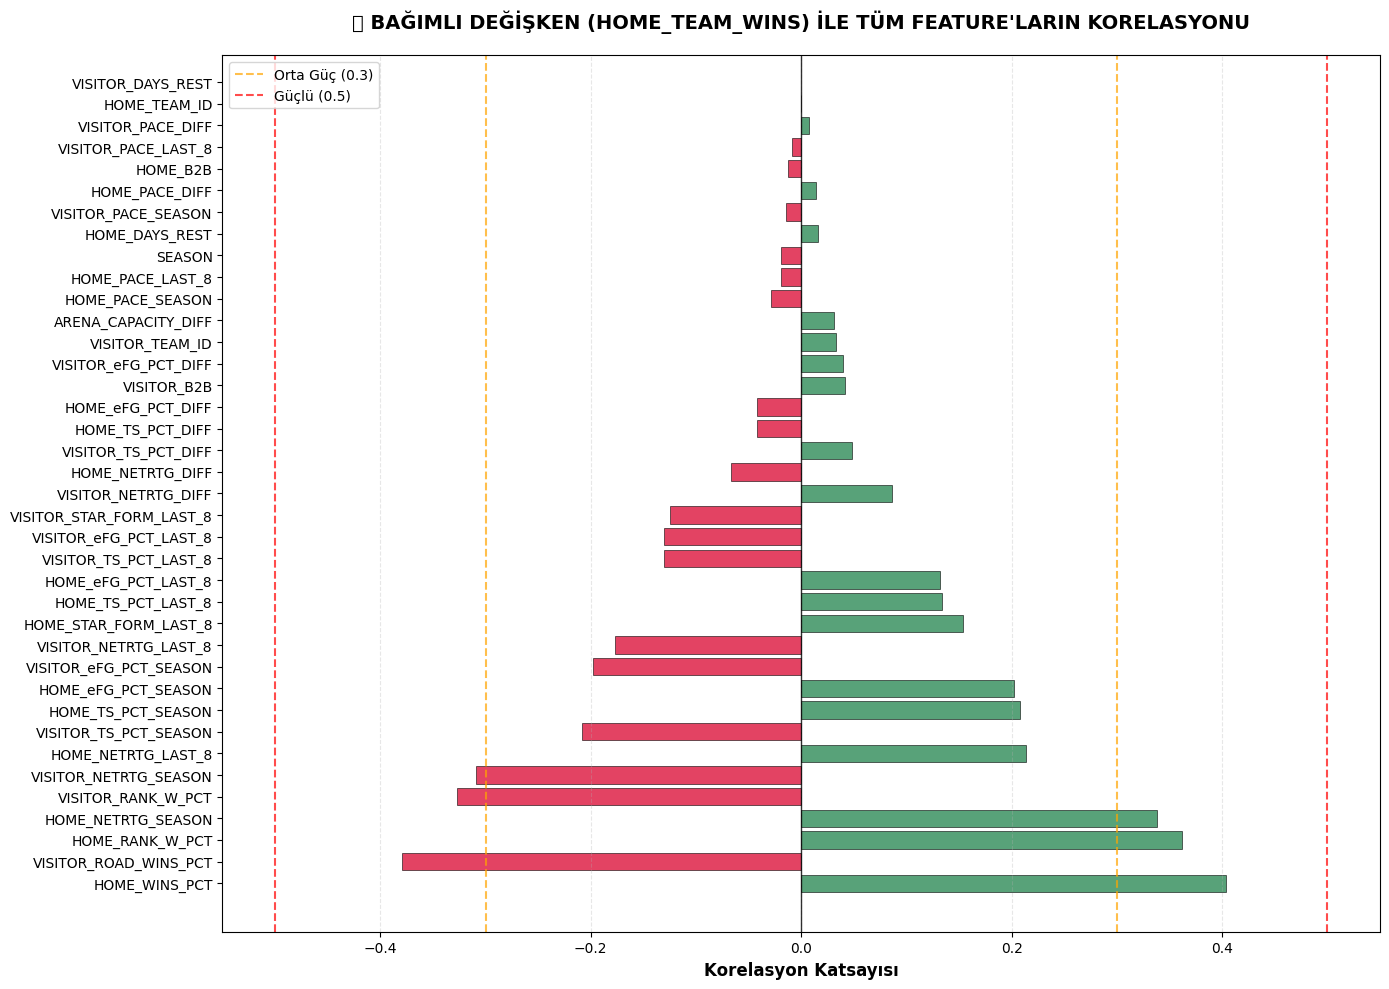

In [64]:
def target_correlation_analysis(X_train_cleaned, y_train):
    """
    Bağımlı değişken (HOME_TEAM_WINS) ile tüm bağımsız değişkenlerin korelasyon analizi
    """
    print("=== BAĞIMLI DEĞİŞKEN (HOME_TEAM_WINS) KORELASYON ANALİZİ ===")
    
    # Numerik sütunları al
    numeric_cols = X_train_cleaned.select_dtypes(include=[np.number]).columns.tolist()
    
    # Her feature ile hedef değişken arasındaki korelasyonu hesapla
    target_correlations = []
    
    for feature in numeric_cols:
        correlation = X_train_cleaned[feature].corr(y_train)
        target_correlations.append({
            'Feature': feature,
            'Correlation': correlation,
            'Abs_Correlation': abs(correlation),
            'Direction': 'EV SAHİBİ LEHINE' if correlation > 0 else 'MİSAFİR LEHINE',
            'Strength': 'Çok Güçlü' if abs(correlation) > 0.7 else
                       'Güçlü' if abs(correlation) > 0.5 else
                       'Orta' if abs(correlation) > 0.3 else
                       'Zayıf' if abs(correlation) > 0.1 else 'Çok Zayıf'
        })
    
    # DataFrame'e çevir ve sırala
    df_target_corr = pd.DataFrame(target_correlations)
    df_target_corr = df_target_corr.sort_values('Abs_Correlation', ascending=False)
    
    # DETAYLI TABLO
    print(f"\n📊 TÜM FEATURE'LARIN HEDEF DEĞİŞKENLE KORELASYONU:")
    print("=" * 85)
    print(f"{'#':<3} {'FEATURE ADI':<30} {'KORELASYON':<12} {'YÖN':<15} {'GÜÇLÜLÜK':<12}")
    print("-" * 85)
    
    for idx, (_, row) in enumerate(df_target_corr.iterrows(), 1):
        # Emoji'ler
        direction_icon = "🏠" if row['Direction'] == 'EV SAHİBİ LEHINE' else "✈️"
        
        if row['Strength'] == 'Çok Güçlü':
            strength_icon = "🔥"
        elif row['Strength'] == 'Güçlü':
            strength_icon = "⚡"
        elif row['Strength'] == 'Orta':
            strength_icon = "💫"
        elif row['Strength'] == 'Zayıf':
            strength_icon = "💧"
        else:
            strength_icon = "🫧"
        
        print(f"{idx:<3} {row['Feature']:<30} {row['Correlation']:+.4f}    "
              f"{direction_icon} {row['Direction']:<13}      {strength_icon} {row['Strength']}")
    
    # ÖZET İSTATİSTİKLER
    print(f"\n📈 ÖZET İSTATİSTİKLER:")
    print("=" * 50)
    
    total_features = len(df_target_corr)
    home_advantage = len(df_target_corr[df_target_corr['Direction'] == 'EV SAHİBİ LEHINE'])
    visitor_advantage = len(df_target_corr[df_target_corr['Direction'] == 'MİSAFİR LEHINE'])
    
    very_strong = len(df_target_corr[df_target_corr['Strength'] == 'Çok Güçlü'])
    strong = len(df_target_corr[df_target_corr['Strength'] == 'Güçlü'])
    medium = len(df_target_corr[df_target_corr['Strength'] == 'Orta'])
    weak = len(df_target_corr[df_target_corr['Strength'] == 'Zayıf'])
    very_weak = len(df_target_corr[df_target_corr['Strength'] == 'Çok Zayıf'])
    
    print(f"Toplam feature sayısı: {total_features}")
    print(f"🏠 Ev sahibi lehine: {home_advantage} ({home_advantage/total_features*100:.1f}%)")
    print(f"✈️ Misafir lehine: {visitor_advantage} ({visitor_advantage/total_features*100:.1f}%)")
    print()
    print(f"🔥 Çok güçlü (|r| > 0.7): {very_strong}")
    print(f"⚡ Güçlü (0.5 < |r| ≤ 0.7): {strong}")
    print(f"💫 Orta (0.3 < |r| ≤ 0.5): {medium}")
    print(f"💧 Zayıf (0.1 < |r| ≤ 0.3): {weak}")
    print(f"🫧 Çok zayıf (|r| ≤ 0.1): {very_weak}")
    
    # EN ÖNEMLİ FEATURE'LAR
    print(f"\n🎯 EN ÖNEMLİ FEATURE'LAR (TOP 10):")
    print("-" * 50)
    top_10 = df_target_corr.head(10)
    for idx, (_, row) in enumerate(top_10.iterrows(), 1):
        direction = "EV SAHİBİ GALİBİYETİ" if row['Correlation'] > 0 else "MİSAFİR GALİBİYETİ"
        print(f"{idx:2d}. {row['Feature']:<25} r={row['Correlation']:+.4f} ({direction})")
    
    # EN ZAYIF FEATURE'LAR
    print(f"\n🗑️ EN ZAYIF FEATURE'LAR (SON 5):")
    print("-" * 50)
    bottom_5 = df_target_corr.tail(5)
    for idx, (_, row) in enumerate(bottom_5.iterrows(), 1):
        print(f"{idx}. {row['Feature']:<25} r={row['Correlation']:+.4f} (ÇOK ZAYIF)")
    
    # MODEL ÖNERİLERİ
    print(f"\n🤖 MODEL ÖNERİLERİ:")
    print("=" * 40)
    
    important_features = df_target_corr[df_target_corr['Abs_Correlation'] > 0.3]['Feature'].tolist()
    weak_features = df_target_corr[df_target_corr['Abs_Correlation'] < 0.05]['Feature'].tolist()
    
    print(f"✅ KULLANILMASI GEREKEN FEATURE'LAR ({len(important_features)} adet):")
    for feature in important_features:
        corr_val = df_target_corr[df_target_corr['Feature'] == feature]['Correlation'].iloc[0]
        print(f"   • {feature} (r={corr_val:+.4f})")
    
    if weak_features:
        print(f"\n❌ ÇIKARILMASI ÖNERİLEN FEATURE'LAR ({len(weak_features)} adet):")
        for feature in weak_features[:5]:  # İlk 5'ini göster
            corr_val = df_target_corr[df_target_corr['Feature'] == feature]['Correlation'].iloc[0]
            print(f"   • {feature} (r={corr_val:+.4f})")
    
    # GÖRSEL
    print(f"\n📊 GÖRSEL HAZIRLANACAK...")
    
    plt.figure(figsize=(14, 10))
    
    # Renkleri belirle
    colors = ['#2E8B57' if x > 0 else '#DC143C' for x in df_target_corr['Correlation']]
    
    # Horizontal bar plot
    bars = plt.barh(range(len(df_target_corr)), df_target_corr['Correlation'], 
                    color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    plt.yticks(range(len(df_target_corr)), df_target_corr['Feature'], fontsize=10)
    plt.xlabel('Korelasyon Katsayısı', fontsize=12, fontweight='bold')
    plt.title('🎯 BAĞIMLI DEĞİŞKEN (HOME_TEAM_WINS) İLE TÜM FEATURE\'LARIN KORELASYONU', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Referans çizgileri
    plt.axvline(0, color='black', linestyle='-', alpha=0.8, linewidth=1)
    plt.axvline(0.3, color='orange', linestyle='--', alpha=0.7, label='Orta Güç (0.3)')
    plt.axvline(-0.3, color='orange', linestyle='--', alpha=0.7)
    plt.axvline(0.5, color='red', linestyle='--', alpha=0.7, label='Güçlü (0.5)')
    plt.axvline(-0.5, color='red', linestyle='--', alpha=0.7)
    
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return df_target_corr

# Hedef değişken korelasyon analizini çalıştır
target_corr_results = target_correlation_analysis(X_train_cleaned, y_train)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
=== VIF ANALİZİ (MULTICOLLINEARITY TESPİTİ) ===
Analiz edilecek feature sayısı: 38
⚠️ Sıfır varyansa sahip sütunlar çıkarılıyor: ['VISITOR_DAYS_REST']

📊 VIF HESAPLANIYOR...



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



🎯 VIF ANALİZ SONUÇLARI:
#   FEATURE                        VIF          KATEGORİ     ÖNERİ          
---------------------------------------------------------------------------
1   HOME_eFG_PCT_LAST_8            758.45       ÇOK YÜKSEK   🔴 ÇIKART
2   HOME_TS_PCT_LAST_8             637.02       ÇOK YÜKSEK   🔴 ÇIKART
3   VISITOR_TS_PCT_LAST_8          609.54       ÇOK YÜKSEK   🔴 ÇIKART
4   VISITOR_eFG_PCT_LAST_8         546.92       ÇOK YÜKSEK   🔴 ÇIKART
5   HOME_eFG_PCT_SEASON            493.92       ÇOK YÜKSEK   🔴 ÇIKART
6   HOME_TS_PCT_SEASON             395.67       ÇOK YÜKSEK   🔴 ÇIKART
7   VISITOR_TS_PCT_SEASON          379.38       ÇOK YÜKSEK   🔴 ÇIKART
8   HOME_eFG_PCT_DIFF              352.12       ÇOK YÜKSEK   🔴 ÇIKART
9   VISITOR_eFG_PCT_SEASON         350.95       ÇOK YÜKSEK   🔴 ÇIKART
10  HOME_TS_PCT_DIFF               297.86       ÇOK YÜKSEK   🔴 ÇIKART
11  VISITOR_TS_PCT_DIFF            288.86       ÇOK YÜKSEK   🔴 ÇIKART
12  VISITOR_eFG_PCT_DIFF           255.55       ÇOK 

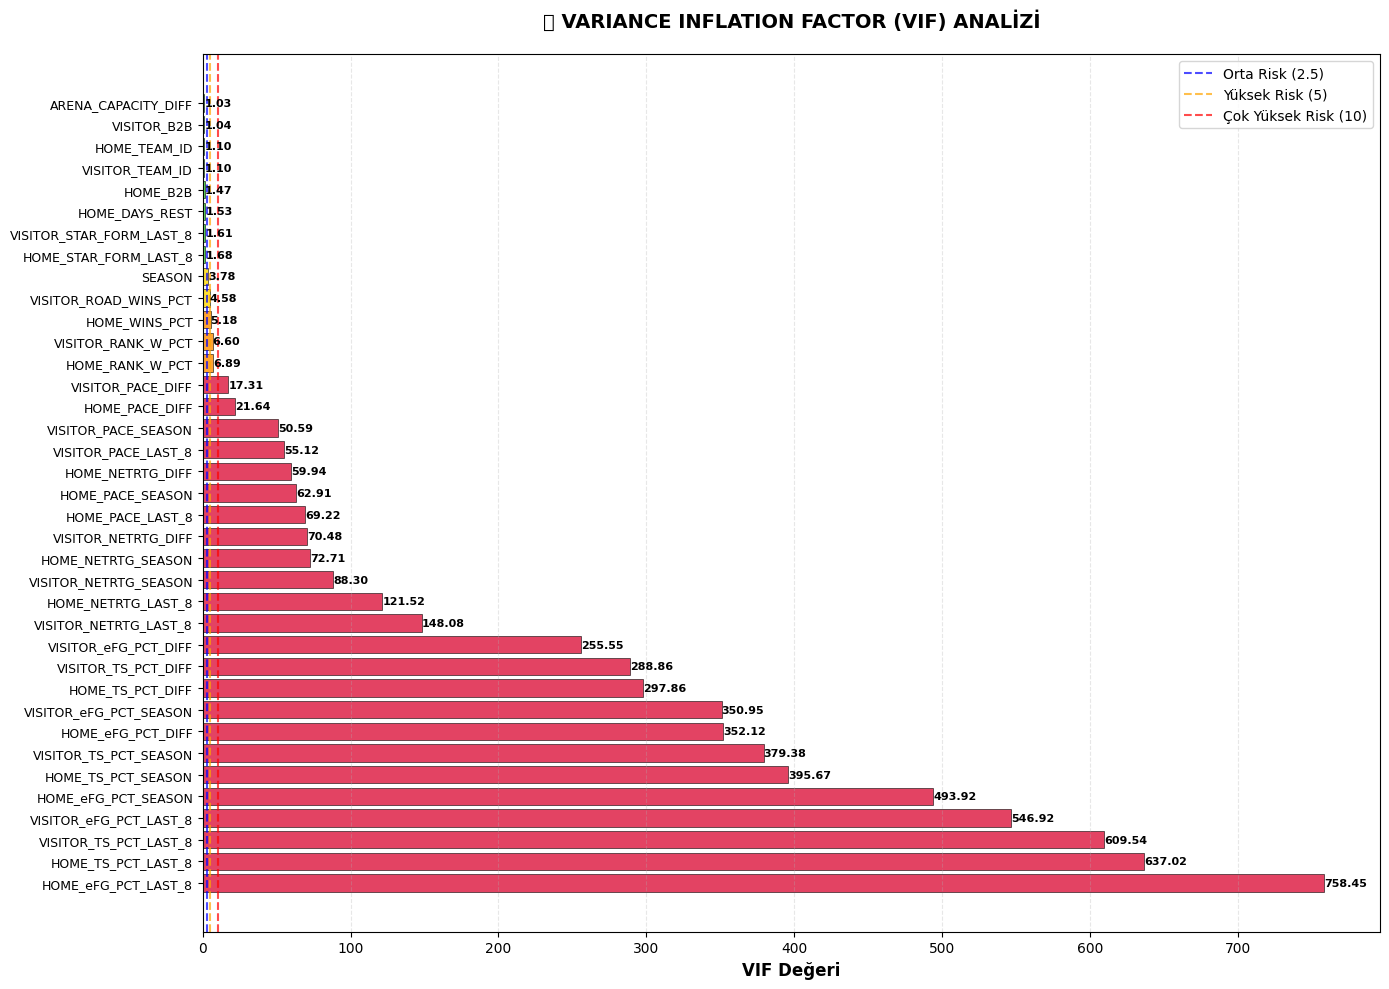


📋 MULTICOLLINEARITY RAPORU:
🚨 YÜKSEK RİSK: 24 feature ciddi multicollinearity sorunu yaşıyor

Model performansı için 27 feature'ı gözden geçir!


In [66]:
import pandas as pd
import numpy as np
%pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
%pip install scikit-learn
from sklearn.preprocessing import StandardScaler


def calculate_vif_analysis(X_train_cleaned):
    """
    Variance Inflation Factor (VIF) analizi - Multicollinearity tespiti
    """
    print("=== VIF ANALİZİ (MULTICOLLINEARITY TESPİTİ) ===")
    
    # Sadece numerik sütunları al
    numeric_cols = X_train_cleaned.select_dtypes(include=[np.number]).columns.tolist()
    X_numeric = X_train_cleaned[numeric_cols].copy()
    
    print(f"Analiz edilecek feature sayısı: {len(numeric_cols)}")
    
    # Eksik değerleri kontrol et ve temizle
    if X_numeric.isnull().sum().sum() > 0:
        print("⚠️ Eksik değerler bulundu, temizleniyor...")
        X_numeric = X_numeric.dropna()
    
    # Sıfır varyans kontrolü
    zero_var_cols = X_numeric.columns[X_numeric.var() == 0].tolist()
    if zero_var_cols:
        print(f"⚠️ Sıfır varyansa sahip sütunlar çıkarılıyor: {zero_var_cols}")
        X_numeric = X_numeric.drop(columns=zero_var_cols)
        numeric_cols = [col for col in numeric_cols if col not in zero_var_cols]
    
    # Verileri standartlaştır (VIF hesaplaması için önemli)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numeric)
    X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)
    
    print("\n📊 VIF HESAPLANIYOR...")
    
    # VIF değerlerini hesapla
    vif_data = []
    
    for i, feature in enumerate(numeric_cols):
        try:
            vif_value = variance_inflation_factor(X_scaled_df.values, i)
            
            # VIF kategorisi belirle
            if vif_value >= 10:
                category = "ÇOK YÜKSEK"
                risk = "🔴 ÇIKART"
                icon = "🚨"
            elif vif_value >= 5:
                category = "YÜKSEK"
                risk = "🟡 DİKKAT"
                icon = "⚠️"
            elif vif_value >= 2.5:
                category = "ORTA"
                risk = "🟢 İYİ"
                icon = "💡"
            else:
                category = "DÜŞÜK"
                risk = "✅ MÜKEMMEL"
                icon = "✨"
            
            vif_data.append({
                'Feature': feature,
                'VIF': vif_value,
                'Category': category,
                'Risk': risk,
                'Icon': icon
            })
            
        except Exception as e:
            print(f"❌ {feature} için VIF hesaplanamadı: {str(e)}")
            vif_data.append({
                'Feature': feature,
                'VIF': np.inf,
                'Category': "HATA",
                'Risk': "❌ HATA",
                'Icon': "💥"
            })
    
    # DataFrame'e çevir ve sırala
    vif_df = pd.DataFrame(vif_data)
    vif_df = vif_df.sort_values('VIF', ascending=False)
    
    # SONUÇLARI GÖSTER
    print(f"\n🎯 VIF ANALİZ SONUÇLARI:")
    print("=" * 75)
    print(f"{'#':<3} {'FEATURE':<30} {'VIF':<12} {'KATEGORİ':<12} {'ÖNERİ':<15}")
    print("-" * 75)
    
    for idx, (_, row) in enumerate(vif_df.iterrows(), 1):
        vif_str = f"{row['VIF']:.2f}" if row['VIF'] != np.inf else "∞"
        print(f"{idx:<3} {row['Feature']:<30} {vif_str:<12} {row['Category']:<12} {row['Risk']}")
    
    # ÖZET İSTATİSTİKLER
    print(f"\n📊 VIF ÖZET İSTATİSTİKLER:")
    print("=" * 50)
    
    very_high = len(vif_df[vif_df['VIF'] >= 10])
    high = len(vif_df[(vif_df['VIF'] >= 5) & (vif_df['VIF'] < 10)])
    medium = len(vif_df[(vif_df['VIF'] >= 2.5) & (vif_df['VIF'] < 5)])
    low = len(vif_df[vif_df['VIF'] < 2.5])
    
    total = len(vif_df)
    
    print(f"Toplam feature: {total}")
    print(f"🚨 Çok yüksek VIF (≥10): {very_high} ({very_high/total*100:.1f}%)")
    print(f"⚠️ Yüksek VIF (5-10): {high} ({high/total*100:.1f}%)")
    print(f"💡 Orta VIF (2.5-5): {medium} ({medium/total*100:.1f}%)")
    print(f"✅ Düşük VIF (<2.5): {low} ({low/total*100:.1f}%)")
    
    if not vif_df[vif_df['VIF'] != np.inf].empty:
        finite_vifs = vif_df[vif_df['VIF'] != np.inf]['VIF']
        print(f"\nOrtalama VIF: {finite_vifs.mean():.2f}")
        print(f"Medyan VIF: {finite_vifs.median():.2f}")
        print(f"En yüksek VIF: {finite_vifs.max():.2f}")
        print(f"En düşük VIF: {finite_vifs.min():.2f}")
    
    # PROBLEMLİ FEATURE'LAR
    problematic = vif_df[vif_df['VIF'] >= 5]
    if len(problematic) > 0:
        print(f"\n🚨 PROBLEMLİ FEATURE'LAR (VIF ≥ 5):")
        print("-" * 60)
        for _, row in problematic.iterrows():
            vif_str = f"{row['VIF']:.2f}" if row['VIF'] != np.inf else "∞"
            print(f"{row['Icon']} {row['Feature']:<30} VIF: {vif_str}")
        
        print(f"\n💡 ÖNERİLER:")
        print("• Bu feature'ları modelden çıkarmayı düşün")
        print("• Principal Component Analysis (PCA) uygula")
        print("• Ridge/Lasso regression kullan")
        print("• Feature selection teknikleri uygula")
    
    # GÜÇLÜ FEATURE'LAR
    good_features = vif_df[vif_df['VIF'] < 5]
    if len(good_features) > 0:
        print(f"\n✅ GÜVENLİ FEATURE'LAR (VIF < 5):")
        print("-" * 50)
        for _, row in good_features.head(10).iterrows():
            print(f"✨ {row['Feature']:<30} VIF: {row['VIF']:.2f}")
    
    # VİZUALİZASYON
    print(f"\n📊 VIF GRAFİĞİ HAZIRLANACAK...")
    
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(14, 10))
    
    # VIF değerlerini sırala ve çiz
    vif_plot_data = vif_df[vif_df['VIF'] != np.inf].copy()  # Sonsuz değerleri hariç tut
    
    if len(vif_plot_data) > 0:
        # Renkleri VIF değerine göre belirle
        colors = []
        for vif in vif_plot_data['VIF']:
            if vif >= 10:
                colors.append('#DC143C')  # Kırmızı
            elif vif >= 5:
                colors.append('#FF8C00')  # Turuncu
            elif vif >= 2.5:
                colors.append('#FFD700')  # Sarı
            else:
                colors.append('#32CD32')  # Yeşil
        
        # Horizontal bar plot
        bars = plt.barh(range(len(vif_plot_data)), vif_plot_data['VIF'], 
                        color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
        
        plt.yticks(range(len(vif_plot_data)), vif_plot_data['Feature'], fontsize=9)
        plt.xlabel('VIF Değeri', fontsize=12, fontweight='bold')
        plt.title('📊 VARIANCE INFLATION FACTOR (VIF) ANALİZİ', 
                  fontsize=14, fontweight='bold', pad=20)
        
        # Referans çizgileri
        plt.axvline(2.5, color='blue', linestyle='--', alpha=0.7, label='Orta Risk (2.5)')
        plt.axvline(5, color='orange', linestyle='--', alpha=0.7, label='Yüksek Risk (5)')
        plt.axvline(10, color='red', linestyle='--', alpha=0.7, label='Çok Yüksek Risk (10)')
        
        plt.grid(axis='x', alpha=0.3, linestyle='--')
        plt.legend()
        
        # VIF değerlerini bars üzerine yaz
        for i, (bar, vif_val) in enumerate(zip(bars, vif_plot_data['VIF'])):
            plt.text(vif_val + 0.1, i, f'{vif_val:.2f}', 
                    va='center', ha='left', fontsize=8, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    # MULTICOLLINEARITY RAPORU
    print(f"\n📋 MULTICOLLINEARITY RAPORU:")
    print("=" * 50)
    
    if very_high > 0:
        print(f"🚨 YÜKSEK RİSK: {very_high} feature ciddi multicollinearity sorunu yaşıyor")
    elif high > 0:
        print(f"⚠️ ORTA RİSK: {high} feature multicollinearity riski taşıyor")
    else:
        print(f"✅ DÜŞÜK RİSK: Multicollinearity sorunu minimal")
    
    print(f"\nModel performansı için {very_high + high} feature'ı gözden geçir!")
    
    return vif_df

# VIF analizini çalıştır
vif_results = calculate_vif_analysis(X_train_cleaned)

In [67]:
def remove_season_columns(X_train_cleaned, X_test_cleaned):
    """
    SEASON ile alakalı sütunları sil
    """
    print("=== SEASON SÜTUNLARI TEMİZLENİYOR ===")
    
    # Silinecek sütunları belirle
    season_columns = []
    
    # Tüm sütunları kontrol et
    for col in X_train_cleaned.columns:
        if 'SEASON' in col.upper():
            season_columns.append(col)
    
    print(f"Silinecek SEASON sütunları:")
    for i, col in enumerate(season_columns, 1):
        print(f"  {i}. {col}")
    
    # Sütunları sil
    X_train_cleaned_no_season = X_train_cleaned.drop(columns=season_columns)
    X_test_cleaned_no_season = X_test_cleaned.drop(columns=season_columns)
    
    print(f"\n📊 BOYUT DEĞİŞİMİ:")
    print(f"ÖNCESİ - Train: {X_train_cleaned.shape}, Test: {X_test_cleaned.shape}")
    print(f"SONRASI - Train: {X_train_cleaned_no_season.shape}, Test: {X_test_cleaned_no_season.shape}")
    print(f"Silinen sütun sayısı: {len(season_columns)}")
    print(f"Kalan sütun sayısı: {X_train_cleaned_no_season.shape[1]}")
    
    # Kalan sütunları göster
    print(f"\n✅ KALAN SÜTUNLAR ({X_train_cleaned_no_season.shape[1]} adet):")
    remaining_cols = list(X_train_cleaned_no_season.columns)
    
    # Kategorilere ayır
    home_cols = [col for col in remaining_cols if col.startswith('HOME_')]
    visitor_cols = [col for col in remaining_cols if col.startswith('VISITOR_')]
    basic_cols = [col for col in remaining_cols if not col.startswith(('HOME_', 'VISITOR_'))]
    
    print(f"\n🏠 HOME sütunları ({len(home_cols)} adet):")
    for col in home_cols:
        print(f"   • {col}")
    
    print(f"\n✈️ VISITOR sütunları ({len(visitor_cols)} adet):")
    for col in visitor_cols:
        print(f"   • {col}")
    
    print(f"\n📊 GENEL sütunlar ({len(basic_cols)} adet):")
    for col in basic_cols:
        print(f"   • {col}")
    
    return X_train_cleaned_no_season, X_test_cleaned_no_season, season_columns

# SEASON sütunlarını sil
X_train_final, X_test_final, removed_columns = remove_season_columns(X_train_cleaned, X_test_cleaned)

print(f"\n🎯 ÖZET:")
print(f"✅ {len(removed_columns)} SEASON sütunu silindi")
print(f"📊 Yeni boyutlar: Train {X_train_final.shape}, Test {X_test_final.shape}")
print(f"🚀 Model eğitimi için hazır!")

=== SEASON SÜTUNLARI TEMİZLENİYOR ===
Silinecek SEASON sütunları:
  1. SEASON
  2. HOME_PACE_SEASON
  3. HOME_eFG_PCT_SEASON
  4. HOME_TS_PCT_SEASON
  5. HOME_NETRTG_SEASON
  6. VISITOR_PACE_SEASON
  7. VISITOR_eFG_PCT_SEASON
  8. VISITOR_TS_PCT_SEASON
  9. VISITOR_NETRTG_SEASON

📊 BOYUT DEĞİŞİMİ:
ÖNCESİ - Train: (8240, 38), Test: (4050, 38)
SONRASI - Train: (8240, 29), Test: (4050, 29)
Silinen sütun sayısı: 9
Kalan sütun sayısı: 29

✅ KALAN SÜTUNLAR (29 adet):

🏠 HOME sütunları (14 adet):
   • HOME_TEAM_ID
   • HOME_RANK_W_PCT
   • HOME_WINS_PCT
   • HOME_DAYS_REST
   • HOME_B2B
   • HOME_PACE_LAST_8
   • HOME_PACE_DIFF
   • HOME_eFG_PCT_LAST_8
   • HOME_eFG_PCT_DIFF
   • HOME_TS_PCT_LAST_8
   • HOME_TS_PCT_DIFF
   • HOME_NETRTG_LAST_8
   • HOME_NETRTG_DIFF
   • HOME_STAR_FORM_LAST_8

✈️ VISITOR sütunları (14 adet):
   • VISITOR_TEAM_ID
   • VISITOR_RANK_W_PCT
   • VISITOR_ROAD_WINS_PCT
   • VISITOR_DAYS_REST
   • VISITOR_B2B
   • VISITOR_PACE_LAST_8
   • VISITOR_PACE_DIFF
   • VISITO

In [68]:
def update_main_dataset(df_games_filtered_final, removed_columns):
    """
    Ana veri setinden de SEASON sütunlarını sil
    """
    print("=== ANA VERİ SETİNİ GÜNCELLİYOR ===")
    
    # Hangi sütunlar ana veri setinde var?
    existing_season_cols = [col for col in removed_columns if col in df_games_filtered_final.columns]
    
    print(f"Ana veri setinde bulunan SEASON sütunları:")
    for i, col in enumerate(existing_season_cols, 1):
        print(f"  {i}. {col}")
    
    if len(existing_season_cols) > 0:
        # Sütunları sil
        df_games_filtered_final_updated = df_games_filtered_final.drop(columns=existing_season_cols)
        
        print(f"\n📊 ANA VERİ SETİ GÜNCELLEME:")
        print(f"ÖNCESİ: {df_games_filtered_final.shape}")
        print(f"SONRASI: {df_games_filtered_final_updated.shape}")
        print(f"Silinen: {len(existing_season_cols)} sütun")
        
        # Global değişkeni güncelle
        globals()['df_games_filtered_final'] = df_games_filtered_final_updated
        
        print(f"\n✅ df_games_filtered_final güncellendi!")
        
        # Kontrol et
        print(f"\n🔍 KONTROL:")
        remaining_season = [col for col in df_games_filtered_final_updated.columns if 'SEASON' in col.upper()]
        if len(remaining_season) == 0:
            print(f"✅ Tüm SEASON sütunları başarıyla silindi!")
        else:
            print(f"⚠️ Hala {len(remaining_season)} SEASON sütunu var: {remaining_season}")
        
        return df_games_filtered_final_updated
    
    else:
        print(f"❌ Ana veri setinde SEASON sütunu bulunamadı")
        return df_games_filtered_final

# Ana veri setini güncelle
df_games_filtered_final = update_main_dataset(df_games_filtered_final, removed_columns)



print(f"\n🎯 SÜTUN LİSTESİ:")
for i, col in enumerate(df_games_filtered_final.columns, 1):
    season_check = "🚫 SEASON" if 'SEASON' in col.upper() else "✅"
    print(f"{i:2d}. {season_check} {col}")

=== ANA VERİ SETİNİ GÜNCELLİYOR ===
Ana veri setinde bulunan SEASON sütunları:
  1. SEASON
  2. HOME_PACE_SEASON
  3. HOME_eFG_PCT_SEASON
  4. HOME_TS_PCT_SEASON
  5. HOME_NETRTG_SEASON
  6. VISITOR_PACE_SEASON
  7. VISITOR_eFG_PCT_SEASON
  8. VISITOR_TS_PCT_SEASON
  9. VISITOR_NETRTG_SEASON

📊 ANA VERİ SETİ GÜNCELLEME:
ÖNCESİ: (12290, 42)
SONRASI: (12290, 33)
Silinen: 9 sütun

✅ df_games_filtered_final güncellendi!

🔍 KONTROL:
✅ Tüm SEASON sütunları başarıyla silindi!

🎯 SÜTUN LİSTESİ:
 1. ✅ GAME_DATE_EST
 2. ✅ GAME_ID
 3. ✅ HOME_TEAM_ID
 4. ✅ VISITOR_TEAM_ID
 5. ✅ HOME_TEAM_WINS
 6. ✅ DIFF_PTS
 7. ✅ ARENA_CAPACITY_DIFF
 8. ✅ HOME_RANK_W_PCT
 9. ✅ VISITOR_RANK_W_PCT
10. ✅ HOME_WINS_PCT
11. ✅ VISITOR_ROAD_WINS_PCT
12. ✅ HOME_DAYS_REST
13. ✅ HOME_B2B
14. ✅ VISITOR_DAYS_REST
15. ✅ VISITOR_B2B
16. ✅ HOME_PACE_LAST_8
17. ✅ HOME_PACE_DIFF
18. ✅ HOME_eFG_PCT_LAST_8
19. ✅ HOME_eFG_PCT_DIFF
20. ✅ HOME_TS_PCT_LAST_8
21. ✅ HOME_TS_PCT_DIFF
22. ✅ HOME_NETRTG_LAST_8
23. ✅ HOME_NETRTG_DIFF
24. ✅ VI

In [69]:
df_games_filtered_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   GAME_DATE_EST             12290 non-null  datetime64[ns]
 1   GAME_ID                   12290 non-null  int64         
 2   HOME_TEAM_ID              12290 non-null  int64         
 3   VISITOR_TEAM_ID           12290 non-null  int64         
 4   HOME_TEAM_WINS            12290 non-null  int64         
 5   DIFF_PTS                  12290 non-null  float64       
 6   ARENA_CAPACITY_DIFF       12290 non-null  float64       
 7   HOME_RANK_W_PCT           12290 non-null  float64       
 8   VISITOR_RANK_W_PCT        12290 non-null  float64       
 9   HOME_WINS_PCT             12290 non-null  float64       
 10  VISITOR_ROAD_WINS_PCT     12290 non-null  float64       
 11  HOME_DAYS_REST            12290 non-null  float64       
 12  HOME_B2B          

In [70]:
def remove_id_date_columns(df_games_filtered_final, X_train_final, X_test_final):
    """
    ID ve tarih sütunlarını çıkar
    """
    print("=== ID VE TARİH SÜTUNLARI TEMİZLENİYOR ===")
    
    # Çıkarılacak sütunlar
    columns_to_remove = [
        'GAME_ID',
        'GAME_DATE_EST', 
        'HOME_TEAM_ID',
        'VISITOR_TEAM_ID'
    ]
    
    print(f"Çıkarılacak sütunlar:")
    for i, col in enumerate(columns_to_remove, 1):
        print(f"  {i}. {col}")
    
    # Ana veri setinden çıkar
    existing_cols_main = [col for col in columns_to_remove if col in df_games_filtered_final.columns]
    if existing_cols_main:
        df_main_updated = df_games_filtered_final.drop(columns=existing_cols_main)
        print(f"\n📊 ANA VERİ SETİ:")
        print(f"ÖNCESİ: {df_games_filtered_final.shape}")
        print(f"SONRASI: {df_main_updated.shape}")
        print(f"Çıkarılan: {existing_cols_main}")
    else:
        df_main_updated = df_games_filtered_final
        print(f"\n📊 Ana veri setinde bu sütunlar bulunamadı")
    
    # Train setinden çıkar
    existing_cols_train = [col for col in columns_to_remove if col in X_train_final.columns]
    if existing_cols_train:
        X_train_updated = X_train_final.drop(columns=existing_cols_train)
        print(f"\n🚂 TRAIN SETİ:")
        print(f"ÖNCESİ: {X_train_final.shape}")
        print(f"SONRASI: {X_train_updated.shape}")
        print(f"Çıkarılan: {existing_cols_train}")
    else:
        X_train_updated = X_train_final
        print(f"\n🚂 Train setinde bu sütunlar bulunamadı")
    
    # Test setinden çıkar
    existing_cols_test = [col for col in columns_to_remove if col in X_test_final.columns]
    if existing_cols_test:
        X_test_updated = X_test_final.drop(columns=existing_cols_test)
        print(f"\n🧪 TEST SETİ:")
        print(f"ÖNCESİ: {X_test_final.shape}")
        print(f"SONRASI: {X_test_updated.shape}")
        print(f"Çıkarılan: {existing_cols_test}")
    else:
        X_test_updated = X_test_final
        print(f"\n🧪 Test setinde bu sütunlar bulunamadı")
    
    # Global değişkenleri güncelle
    globals()['df_games_filtered_final'] = df_main_updated
    globals()['X_train_final'] = X_train_updated
    globals()['X_test_final'] = X_test_updated
    
    print(f"\n✅ TÜM VERİ SETLERİ GÜNCELLENDİ!")
    
    # Final kontrol
    print(f"\n🔍 FINAL KONTROL:")
    print(f"Ana veri seti: {df_main_updated.shape}")
    print(f"Train seti: {X_train_updated.shape}")
    print(f"Test seti: {X_test_updated.shape}")
    
    # Kalan sütunları göster
    print(f"\n📋 KALAN SÜTUNLAR ({df_main_updated.shape[1]} adet):")
    for i, col in enumerate(df_main_updated.columns, 1):
        # ID/Date kontrolü
        is_id_date = any(x in col.upper() for x in ['ID', 'DATE', 'GAME'])
        status = "🚫 ID/DATE" if is_id_date else "✅ FEATURE"
        print(f"{i:2d}. {status} {col}")
    
    return df_main_updated, X_train_updated, X_test_updated

# ID ve tarih sütunlarını çıkar
df_games_filtered_final, X_train_final, X_test_final = remove_id_date_columns(
    df_games_filtered_final, X_train_final, X_test_final
)

# Kontrol
print(f"\n📊 GÜNCEL VERİ SETİ BİLGİSİ:")
df_games_filtered_final.info()

print(f"\n🎯 FEATURE SAYILARI:")
print(f"Ana veri seti: {df_games_filtered_final.shape[1]} sütun")
print(f"Train features: {X_train_final.shape[1]} sütun")  
print(f"Test features: {X_test_final.shape[1]} sütun")
print(f"🚀 Model eğitimi için tamamen hazır!")

=== ID VE TARİH SÜTUNLARI TEMİZLENİYOR ===
Çıkarılacak sütunlar:
  1. GAME_ID
  2. GAME_DATE_EST
  3. HOME_TEAM_ID
  4. VISITOR_TEAM_ID

📊 ANA VERİ SETİ:
ÖNCESİ: (12290, 33)
SONRASI: (12290, 29)
Çıkarılan: ['GAME_ID', 'GAME_DATE_EST', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID']

🚂 TRAIN SETİ:
ÖNCESİ: (8240, 29)
SONRASI: (8240, 27)
Çıkarılan: ['HOME_TEAM_ID', 'VISITOR_TEAM_ID']

🧪 TEST SETİ:
ÖNCESİ: (4050, 29)
SONRASI: (4050, 27)
Çıkarılan: ['HOME_TEAM_ID', 'VISITOR_TEAM_ID']

✅ TÜM VERİ SETLERİ GÜNCELLENDİ!

🔍 FINAL KONTROL:
Ana veri seti: (12290, 29)
Train seti: (8240, 27)
Test seti: (4050, 27)

📋 KALAN SÜTUNLAR (29 adet):
 1. ✅ FEATURE HOME_TEAM_WINS
 2. ✅ FEATURE DIFF_PTS
 3. ✅ FEATURE ARENA_CAPACITY_DIFF
 4. ✅ FEATURE HOME_RANK_W_PCT
 5. ✅ FEATURE VISITOR_RANK_W_PCT
 6. ✅ FEATURE HOME_WINS_PCT
 7. ✅ FEATURE VISITOR_ROAD_WINS_PCT
 8. ✅ FEATURE HOME_DAYS_REST
 9. ✅ FEATURE HOME_B2B
10. ✅ FEATURE VISITOR_DAYS_REST
11. ✅ FEATURE VISITOR_B2B
12. ✅ FEATURE HOME_PACE_LAST_8
13. ✅ FEATURE HOME_PACE

=== GÜNCELLENMİŞ KORELASYON ANALİZİ ===
Analiz edilecek feature sayısı: 27
Train veri boyutu: (8240, 27)

📊 HEDEF DEĞİŞKEN (DIFF_PTS) İLE KORELASYON:
#   FEATURE ADI                    KORELASYON   YÖN      GÜÇLÜLÜK    
-------------------------------------------------------------------------------------
1   HOME_WINS_PCT                  +0.4039    📈      💫 Orta
2   VISITOR_ROAD_WINS_PCT          -0.3795    📉      💫 Orta
3   HOME_RANK_W_PCT                +0.3618    📈      💫 Orta
4   VISITOR_RANK_W_PCT             -0.3267    📉      💫 Orta
5   HOME_NETRTG_LAST_8             +0.2139    📈      💧 Zayıf
6   VISITOR_NETRTG_LAST_8          -0.1766    📉      💧 Zayıf
7   HOME_STAR_FORM_LAST_8          +0.1541    📈      💧 Zayıf
8   HOME_TS_PCT_LAST_8             +0.1333    📈      💧 Zayıf
9   HOME_eFG_PCT_LAST_8            +0.1323    📈      💧 Zayıf
10  VISITOR_TS_PCT_LAST_8          -0.1308    📉      💧 Zayıf
11  VISITOR_eFG_PCT_LAST_8         -0.1308    📉      💧 Zayıf
12  VISITOR_STAR_FORM_LAST_

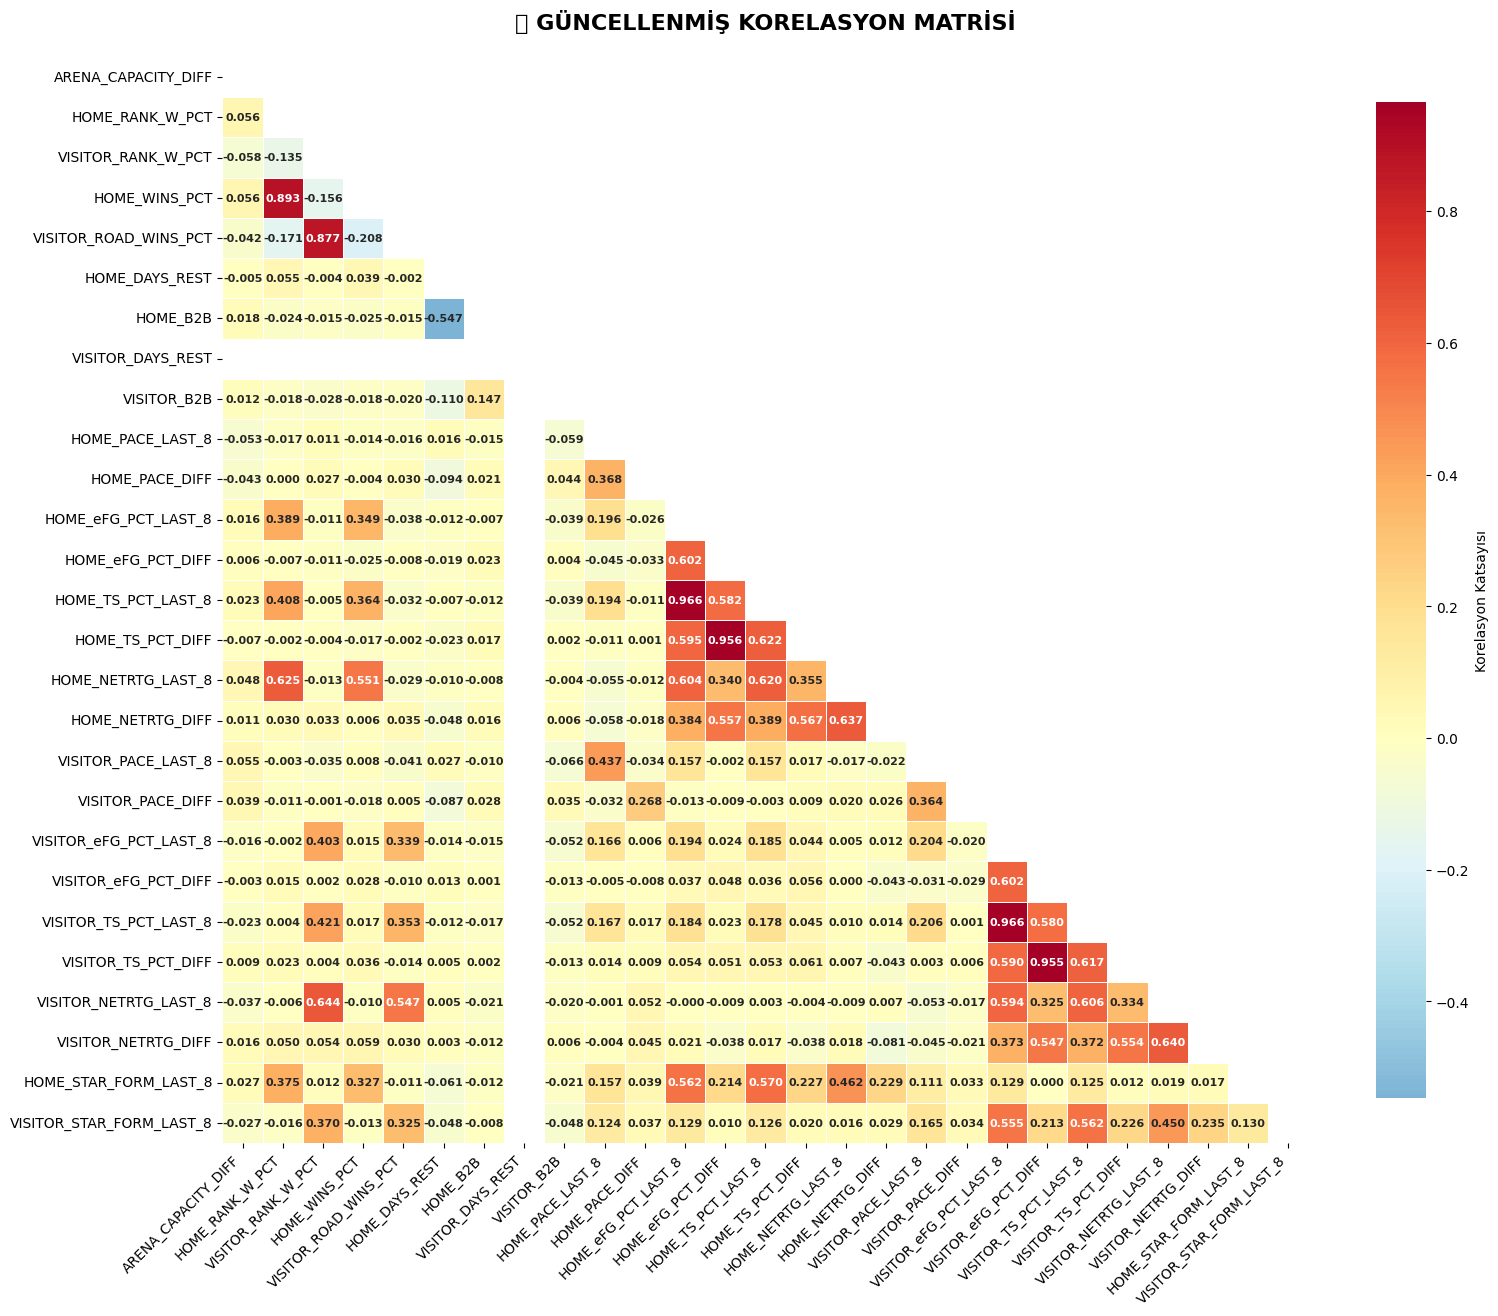

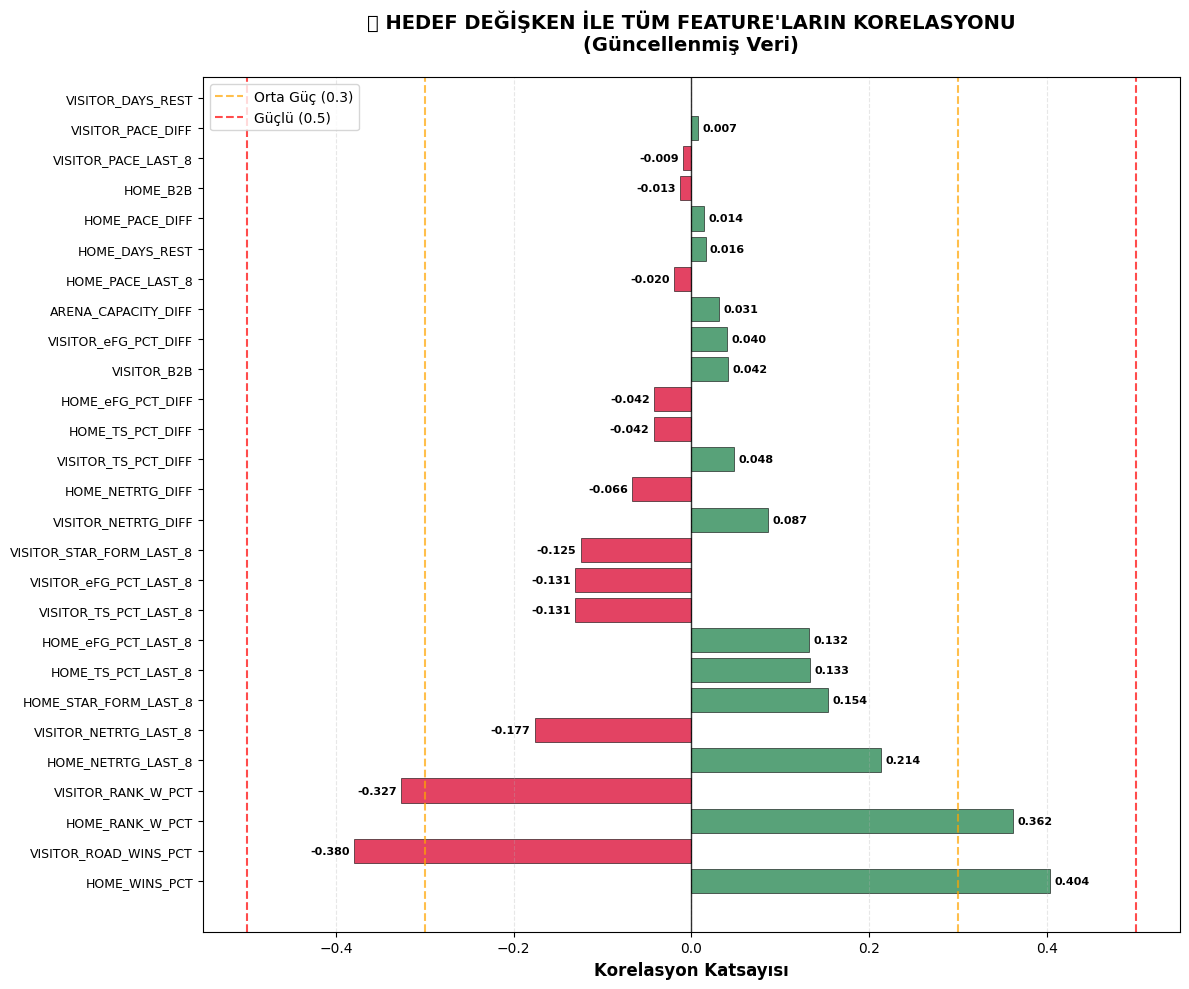


📈 ÖZET İSTATİSTİKLER:
Toplam feature sayısı: 27
Pozitif korelasyon: 14 (51.9%)
Negatif korelasyon: 13 (48.1%)

🔥 Çok güçlü (|r| > 0.7): 0
⚡ Güçlü (0.5 < |r| ≤ 0.7): 0
💫 Orta (0.3 < |r| ≤ 0.5): 4
💧 Zayıf (0.1 < |r| ≤ 0.3): 8
🫧 Çok zayıf (|r| ≤ 0.1): 15

🎯 EN ÖNEMLİ FEATURE'LAR (TOP 10):
------------------------------------------------------------
 1. HOME_WINS_PCT             r=+0.4039 (EV SAHİBİ LEHINE)
 2. VISITOR_ROAD_WINS_PCT     r=-0.3795 (MİSAFİR LEHINE)
 3. HOME_RANK_W_PCT           r=+0.3618 (EV SAHİBİ LEHINE)
 4. VISITOR_RANK_W_PCT        r=-0.3267 (MİSAFİR LEHINE)
 5. HOME_NETRTG_LAST_8        r=+0.2139 (EV SAHİBİ LEHINE)
 6. VISITOR_NETRTG_LAST_8     r=-0.1766 (MİSAFİR LEHINE)
 7. HOME_STAR_FORM_LAST_8     r=+0.1541 (EV SAHİBİ LEHINE)
 8. HOME_TS_PCT_LAST_8        r=+0.1333 (EV SAHİBİ LEHINE)
 9. HOME_eFG_PCT_LAST_8       r=+0.1323 (EV SAHİBİ LEHINE)
10. VISITOR_TS_PCT_LAST_8     r=-0.1308 (MİSAFİR LEHINE)

🗑️ ÇOK ZAYIF FEATURE'LAR (|r| < 0.05) - ÇIKARILABİLİR:
-------------

In [71]:
def updated_correlation_analysis(X_train_final, y_train):
    """
    Güncellenmiş veri seti için korelasyon analizi
    """
    print("=== GÜNCELLENMİŞ KORELASYON ANALİZİ ===")
    
    # Numerik sütunları al
    numeric_cols = X_train_final.select_dtypes(include=[np.number]).columns.tolist()
    
    print(f"Analiz edilecek feature sayısı: {len(numeric_cols)}")
    print(f"Train veri boyutu: {X_train_final.shape}")
    
    # === 1. HEDEF DEĞİŞKENLE KORELASYON ===
    target_correlations = []
    
    for feature in numeric_cols:
        correlation = X_train_final[feature].corr(y_train)
        
        target_correlations.append({
            'Feature': feature,
            'Correlation': correlation,
            'Abs_Correlation': abs(correlation),
            'Direction': 'Pozitif' if correlation > 0 else 'Negatif',
            'Strength': 'Çok Güçlü' if abs(correlation) > 0.7 else
                       'Güçlü' if abs(correlation) > 0.5 else
                       'Orta' if abs(correlation) > 0.3 else
                       'Zayıf' if abs(correlation) > 0.1 else 'Çok Zayıf'
        })
    
    # DataFrame'e çevir ve sırala
    df_target_corr = pd.DataFrame(target_correlations)
    df_target_corr = df_target_corr.sort_values('Abs_Correlation', ascending=False)
    
    # DETAYLI TABLO
    print(f"\n📊 HEDEF DEĞİŞKEN (DIFF_PTS) İLE KORELASYON:")
    print("=" * 85)
    print(f"{'#':<3} {'FEATURE ADI':<30} {'KORELASYON':<12} {'YÖN':<8} {'GÜÇLÜLÜK':<12}")
    print("-" * 85)
    
    for idx, (_, row) in enumerate(df_target_corr.iterrows(), 1):
        # Emoji'ler
        direction_icon = "📈" if row['Direction'] == 'Pozitif' else "📉"
        
        if row['Strength'] == 'Çok Güçlü':
            strength_icon = "🔥"
        elif row['Strength'] == 'Güçlü':
            strength_icon = "⚡"
        elif row['Strength'] == 'Orta':
            strength_icon = "💫"
        elif row['Strength'] == 'Zayıf':
            strength_icon = "💧"
        else:
            strength_icon = "🫧"
        
        print(f"{idx:<3} {row['Feature']:<30} {row['Correlation']:+.4f}    "
              f"{direction_icon}      {strength_icon} {row['Strength']}")
    
    # === 2. KORELASYON MATRİSİ ===
    print(f"\n🔥 KORELASYON MATRİSİ HAZIRLANACAK...")
    
    corr_matrix = X_train_final[numeric_cols].corr()
    
    plt.figure(figsize=(16, 14))
    
    # Üst üçgeni maskele
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Heatmap
    sns.heatmap(corr_matrix, 
                mask=mask,                    
                annot=True,                   
                cmap='RdYlBu_r',             
                center=0,                     
                square=True,                  
                fmt='.3f',                    
                linewidths=0.5,               
                cbar_kws={'label': 'Korelasyon Katsayısı', 'shrink': 0.8},
                annot_kws={'size': 8, 'weight': 'bold'})
    
    plt.title('🔥 GÜNCELLENMİŞ KORELASYON MATRİSİ', 
              fontsize=16, fontweight='bold', pad=20)
    
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()
    
    # === 3. HEDEF KORELASYON GRAFİĞİ ===
    plt.figure(figsize=(12, 10))
    
    # Renkleri belirle
    colors = ['#2E8B57' if x > 0 else '#DC143C' for x in df_target_corr['Correlation']]
    
    # Horizontal bar plot
    bars = plt.barh(range(len(df_target_corr)), df_target_corr['Correlation'], 
                    color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    plt.yticks(range(len(df_target_corr)), df_target_corr['Feature'], fontsize=9)
    plt.xlabel('Korelasyon Katsayısı', fontsize=12, fontweight='bold')
    plt.title('🎯 HEDEF DEĞİŞKEN İLE TÜM FEATURE\'LARIN KORELASYONU\n(Güncellenmiş Veri)', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Referans çizgileri
    plt.axvline(0, color='black', linestyle='-', alpha=0.8, linewidth=1)
    plt.axvline(0.3, color='orange', linestyle='--', alpha=0.7, label='Orta Güç (0.3)')
    plt.axvline(-0.3, color='orange', linestyle='--', alpha=0.7)
    plt.axvline(0.5, color='red', linestyle='--', alpha=0.7, label='Güçlü (0.5)')
    plt.axvline(-0.5, color='red', linestyle='--', alpha=0.7)
    
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    plt.legend()
    
    # Değerleri bars üzerine yaz
    for i, (bar, val) in enumerate(zip(bars, df_target_corr['Correlation'])):
        x_pos = val + (0.005 if val >= 0 else -0.005)
        plt.text(x_pos, i, f'{val:.3f}', 
                va='center', ha='left' if val >= 0 else 'right', 
                fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # === 4. ÖZET İSTATİSTİKLER ===
    print(f"\n📈 ÖZET İSTATİSTİKLER:")
    print("=" * 50)
    
    total_features = len(df_target_corr)
    positive_corr = len(df_target_corr[df_target_corr['Direction'] == 'Pozitif'])
    negative_corr = len(df_target_corr[df_target_corr['Direction'] == 'Negatif'])
    
    very_strong = len(df_target_corr[df_target_corr['Strength'] == 'Çok Güçlü'])
    strong = len(df_target_corr[df_target_corr['Strength'] == 'Güçlü'])
    medium = len(df_target_corr[df_target_corr['Strength'] == 'Orta'])
    weak = len(df_target_corr[df_target_corr['Strength'] == 'Zayıf'])
    very_weak = len(df_target_corr[df_target_corr['Strength'] == 'Çok Zayıf'])
    
    print(f"Toplam feature sayısı: {total_features}")
    print(f"Pozitif korelasyon: {positive_corr} ({positive_corr/total_features*100:.1f}%)")
    print(f"Negatif korelasyon: {negative_corr} ({negative_corr/total_features*100:.1f}%)")
    print()
    print(f"🔥 Çok güçlü (|r| > 0.7): {very_strong}")
    print(f"⚡ Güçlü (0.5 < |r| ≤ 0.7): {strong}")
    print(f"💫 Orta (0.3 < |r| ≤ 0.5): {medium}")
    print(f"💧 Zayıf (0.1 < |r| ≤ 0.3): {weak}")
    print(f"🫧 Çok zayıf (|r| ≤ 0.1): {very_weak}")
    
    # === 5. EN ÖNEMLİ FEATURE'LAR ===
    print(f"\n🎯 EN ÖNEMLİ FEATURE'LAR (TOP 10):")
    print("-" * 60)
    top_10 = df_target_corr.head(10)
    for idx, (_, row) in enumerate(top_10.iterrows(), 1):
        direction = "EV SAHİBİ LEHINE" if row['Correlation'] > 0 else "MİSAFİR LEHINE"
        print(f"{idx:2d}. {row['Feature']:<25} r={row['Correlation']:+.4f} ({direction})")
    
    # === 6. ZAYIF FEATURE'LAR ===
    weak_features = df_target_corr[df_target_corr['Abs_Correlation'] < 0.05]
    if len(weak_features) > 0:
        print(f"\n🗑️ ÇOK ZAYIF FEATURE'LAR (|r| < 0.05) - ÇIKARILABİLİR:")
        print("-" * 60)
        for idx, (_, row) in enumerate(weak_features.iterrows(), 1):
            print(f"{idx}. {row['Feature']:<25} r={row['Correlation']:+.4f}")
    
    # === 7. MODEL ÖNERİLERİ ===
    print(f"\n🤖 MODEL ÖNERİLERİ:")
    print("=" * 40)
    
    important_features = df_target_corr[df_target_corr['Abs_Correlation'] > 0.2]['Feature'].tolist()
    
    print(f"✅ KULLANILMASI GEREKEN FEATURE'LAR ({len(important_features)} adet):")
    for feature in important_features:
        corr_val = df_target_corr[df_target_corr['Feature'] == feature]['Correlation'].iloc[0]
        print(f"   • {feature} (r={corr_val:+.4f})")
    
    print(f"\n📊 VERİ SETİ DURUMU:")
    print(f"• Toplam feature: {total_features}")
    print(f"• Güçlü feature (|r|>0.2): {len(important_features)}")
    print(f"• Feature/Sample oranı: {total_features/len(X_train_final):.4f}")
    
    return df_target_corr, corr_matrix

# Güncellenmiş korelasyon analizini çalıştır
target_corr_updated, corr_matrix_updated = updated_correlation_analysis(X_train_final, y_train)


=== GÜNCELLENMİŞ VIF ANALİZİ ===
Analiz edilecek feature sayısı: 27
Veri boyutu: (8240, 27)
⚠️ Sıfır varyansa sahip sütunlar çıkarılıyor: ['VISITOR_DAYS_REST']

📊 VIF HESAPLANIYOR... (26 feature)
   3/26 feature tamamlandı...
   6/26 feature tamamlandı...
   9/26 feature tamamlandı...
   12/26 feature tamamlandı...
   15/26 feature tamamlandı...
   18/26 feature tamamlandı...
   21/26 feature tamamlandı...
   24/26 feature tamamlandı...
   26/26 feature tamamlandı...

🎯 VIF ANALİZ SONUÇLARI (GÜNCELLENMİŞ VERİ):
#   FEATURE                        VIF        R²       KATEGORİ     ÖNERİ          
------------------------------------------------------------------------------------------
1   VISITOR_TS_PCT_LAST_8          26.77      0.963    ÇOK YÜKSEK   🔴 ÇIKART
2   HOME_TS_PCT_LAST_8             26.21      0.962    ÇOK YÜKSEK   🔴 ÇIKART
3   VISITOR_eFG_PCT_LAST_8         25.73      0.961    ÇOK YÜKSEK   🔴 ÇIKART
4   HOME_eFG_PCT_LAST_8            24.69      0.959    ÇOK YÜKSEK   🔴 ÇIKART


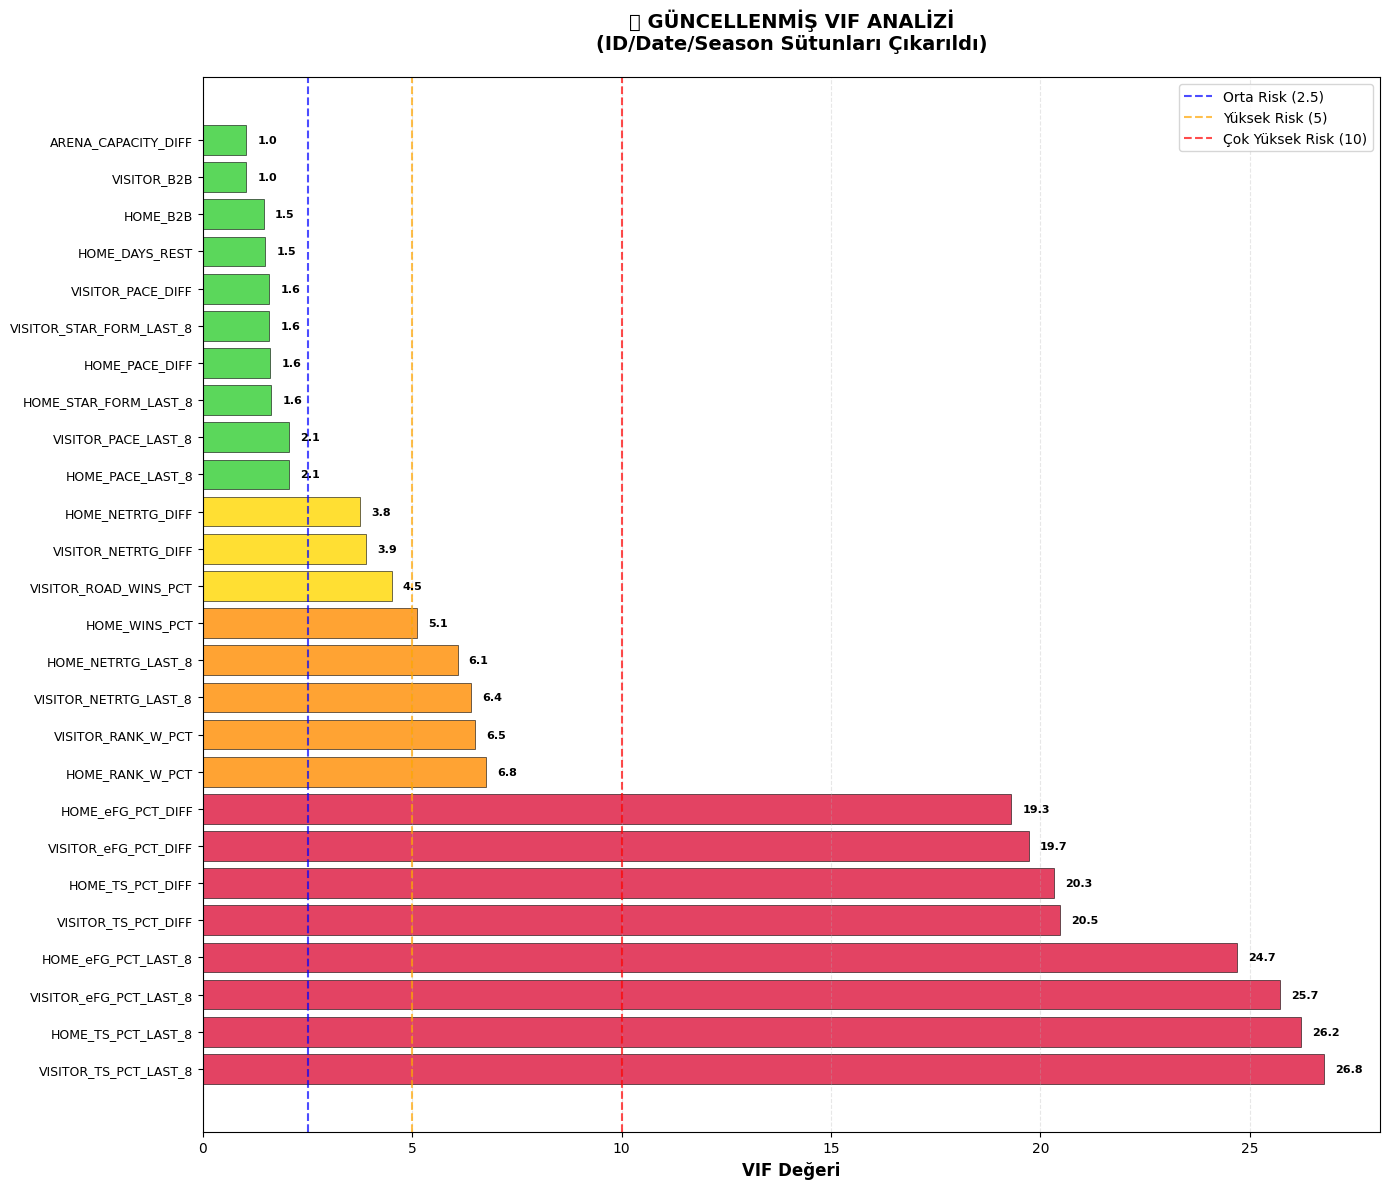


📋 MULTICOLLINEARITY RAPORU:
🚨 YÜKSEK RİSK: 8 feature ciddi multicollinearity sorunu yaşıyor
   Bu feature'ları mutlaka çıkar veya regularization kullan!

Multicollinearity Skoru: 1.42/3.0
🟡 Orta multicollinearity - Regularization önerilir


In [72]:
def updated_vif_analysis(X_train_final):
    """
    Güncellenmiş veri seti için VIF analizi
    """
    print("=== GÜNCELLENMİŞ VIF ANALİZİ ===")
    
    # Sadece numerik sütunları al
    numeric_cols = X_train_final.select_dtypes(include=[np.number]).columns.tolist()
    X_numeric = X_train_final[numeric_cols].copy()
    
    print(f"Analiz edilecek feature sayısı: {len(numeric_cols)}")
    print(f"Veri boyutu: {X_numeric.shape}")
    
    # Eksik değer kontrolü
    if X_numeric.isnull().sum().sum() > 0:
        print("⚠️ Eksik değerler bulundu, temizleniyor...")
        X_numeric = X_numeric.dropna()
    
    # Sıfır varyans kontrolü
    zero_var_cols = X_numeric.columns[X_numeric.var() == 0].tolist()
    if zero_var_cols:
        print(f"⚠️ Sıfır varyansa sahip sütunlar çıkarılıyor: {zero_var_cols}")
        X_numeric = X_numeric.drop(columns=zero_var_cols)
        numeric_cols = [col for col in numeric_cols if col not in zero_var_cols]
    
    # Verileri standartlaştır
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numeric)
    X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)
    
    print(f"\n📊 VIF HESAPLANIYOR... ({len(numeric_cols)} feature)")
    
    # Her feature için VIF hesapla
    vif_data = []
    
    for i, target_feature in enumerate(numeric_cols):
        try:
            # Hedef feature'ı ayır
            y = X_scaled_df.iloc[:, i]
            X_others = X_scaled_df.drop(columns=[target_feature])
            
            # Eğer sadece 1 feature kaldıysa, VIF = 1
            if X_others.shape[1] == 0:
                vif_value = 1.0
                r_squared = 0.0
            else:
                # Linear regression ile R² hesapla
                from sklearn.linear_model import LinearRegression
                from sklearn.metrics import r2_score
                
                lr = LinearRegression()
                lr.fit(X_others, y)
                y_pred = lr.predict(X_others)
                r_squared = r2_score(y, y_pred)
                
                # VIF = 1 / (1 - R²)
                if r_squared >= 0.999:  # Mükemmel korelasyon durumu
                    vif_value = np.inf
                else:
                    vif_value = 1 / (1 - r_squared)
            
            # VIF kategorisi belirle
            if vif_value >= 10:
                category = "ÇOK YÜKSEK"
                risk = "🔴 ÇIKART"
                icon = "🚨"
            elif vif_value >= 5:
                category = "YÜKSEK"
                risk = "🟡 DİKKAT"
                icon = "⚠️"
            elif vif_value >= 2.5:
                category = "ORTA"
                risk = "🟢 İYİ"
                icon = "💡"
            else:
                category = "DÜŞÜK"
                risk = "✅ MÜKEMMEL"
                icon = "✨"
            
            vif_data.append({
                'Feature': target_feature,
                'VIF': vif_value,
                'R_Squared': r_squared,
                'Category': category,
                'Risk': risk,
                'Icon': icon
            })
            
            # İlerleme göstergesi
            if (i + 1) % 3 == 0 or i == len(numeric_cols) - 1:
                print(f"   {i + 1}/{len(numeric_cols)} feature tamamlandı...")
            
        except Exception as e:
            print(f"❌ {target_feature} için VIF hesaplanamadı: {str(e)}")
            vif_data.append({
                'Feature': target_feature,
                'VIF': np.inf,
                'R_Squared': 1.0,
                'Category': "HATA",
                'Risk': "❌ HATA",
                'Icon': "💥"
            })
    
    # DataFrame'e çevir ve sırala
    vif_df = pd.DataFrame(vif_data)
    vif_df = vif_df.sort_values('VIF', ascending=False)
    
    # SONUÇLARI GÖSTER
    print(f"\n🎯 VIF ANALİZ SONUÇLARI (GÜNCELLENMİŞ VERİ):")
    print("=" * 90)
    print(f"{'#':<3} {'FEATURE':<30} {'VIF':<10} {'R²':<8} {'KATEGORİ':<12} {'ÖNERİ':<15}")
    print("-" * 90)
    
    for idx, (_, row) in enumerate(vif_df.iterrows(), 1):
        vif_str = f"{row['VIF']:.2f}" if row['VIF'] != np.inf else "∞"
        r2_str = f"{row['R_Squared']:.3f}"
        print(f"{idx:<3} {row['Feature']:<30} {vif_str:<10} {r2_str:<8} {row['Category']:<12} {row['Risk']}")
    
    # ÖZET İSTATİSTİKLER
    print(f"\n📊 VIF ÖZET İSTATİSTİKLER:")
    print("=" * 50)
    
    very_high = len(vif_df[vif_df['VIF'] >= 10])
    high = len(vif_df[(vif_df['VIF'] >= 5) & (vif_df['VIF'] < 10)])
    medium = len(vif_df[(vif_df['VIF'] >= 2.5) & (vif_df['VIF'] < 5)])
    low = len(vif_df[vif_df['VIF'] < 2.5])
    
    total = len(vif_df)
    
    print(f"Toplam feature: {total}")
    print(f"🚨 Çok yüksek VIF (≥10): {very_high} ({very_high/total*100:.1f}%)")
    print(f"⚠️ Yüksek VIF (5-10): {high} ({high/total*100:.1f}%)")
    print(f"💡 Orta VIF (2.5-5): {medium} ({medium/total*100:.1f}%)")
    print(f"✅ Düşük VIF (<2.5): {low} ({low/total*100:.1f}%)")
    
    # Sonsuz olmayan değerler için istatistikler
    finite_vifs = vif_df[vif_df['VIF'] != np.inf]['VIF']
    if len(finite_vifs) > 0:
        print(f"\n📈 VIF İSTATİSTİKLERİ:")
        print(f"Ortalama VIF: {finite_vifs.mean():.2f}")
        print(f"Medyan VIF: {finite_vifs.median():.2f}")
        print(f"En yüksek VIF: {finite_vifs.max():.2f}")
        print(f"En düşük VIF: {finite_vifs.min():.2f}")
        print(f"Standart sapma: {finite_vifs.std():.2f}")
    
    # PROBLEMLİ FEATURE'LAR
    problematic = vif_df[vif_df['VIF'] >= 5]
    if len(problematic) > 0:
        print(f"\n🚨 PROBLEMLİ FEATURE'LAR (VIF ≥ 5):")
        print("-" * 70)
        for _, row in problematic.iterrows():
            vif_str = f"{row['VIF']:.2f}" if row['VIF'] != np.inf else "∞"
            print(f"{row['Icon']} {row['Feature']:<30} VIF: {vif_str:<8} (R²: {row['R_Squared']:.3f})")
        
        print(f"\n💡 MULTICOLLINEARITY ÇÖZÜMLERİ:")
        print("• Bu feature'ları modelden çıkar")
        print("• Ridge/Lasso regression kullan (L1/L2 regularization)")
        print("• Principal Component Analysis (PCA) uygula")
        print("• Recursive Feature Elimination (RFE) kullan")
        print("• Variance Threshold ile düşük varyans feature'ları çıkar")
    else:
        print(f"\n✅ MÜKEMMEL! Yüksek VIF'li feature yok!")
    
    # GÜVENLİ FEATURE'LAR
    good_features = vif_df[vif_df['VIF'] < 5]
    if len(good_features) > 0:
        print(f"\n✅ GÜVENLİ FEATURE'LAR (VIF < 5):")
        print("-" * 50)
        for _, row in good_features.head(15).iterrows():  # İlk 15'ini göster
            print(f"✨ {row['Feature']:<30} VIF: {row['VIF']:.2f}")
        
        if len(good_features) > 15:
            print(f"   ... ve {len(good_features) - 15} feature daha")
    
    # VİZUALİZASYON
    print(f"\n📊 VIF GRAFİĞİ HAZIRLANACAK...")
    
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(14, 12))
    
    # Sonsuz değerleri büyük sayı ile değiştir (görsellik için)
    vif_plot_data = vif_df.copy()
    max_finite_vif = vif_df[vif_df['VIF'] != np.inf]['VIF'].max() if len(vif_df[vif_df['VIF'] != np.inf]) > 0 else 10
    vif_plot_data.loc[vif_plot_data['VIF'] == np.inf, 'VIF'] = max_finite_vif * 1.2
    
    # Renkleri VIF değerine göre belirle
    colors = []
    for vif in vif_plot_data['VIF']:
        if vif >= 10:
            colors.append('#DC143C')  # Kırmızı
        elif vif >= 5:
            colors.append('#FF8C00')  # Turuncu
        elif vif >= 2.5:
            colors.append('#FFD700')  # Sarı
        else:
            colors.append('#32CD32')  # Yeşil
    
    # Horizontal bar plot
    bars = plt.barh(range(len(vif_plot_data)), vif_plot_data['VIF'], 
                    color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    plt.yticks(range(len(vif_plot_data)), vif_plot_data['Feature'], fontsize=9)
    plt.xlabel('VIF Değeri', fontsize=12, fontweight='bold')
    plt.title('📊 GÜNCELLENMİŞ VIF ANALİZİ\n(ID/Date/Season Sütunları Çıkarıldı)', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Referans çizgileri
    plt.axvline(2.5, color='blue', linestyle='--', alpha=0.7, label='Orta Risk (2.5)')
    plt.axvline(5, color='orange', linestyle='--', alpha=0.7, label='Yüksek Risk (5)')
    plt.axvline(10, color='red', linestyle='--', alpha=0.7, label='Çok Yüksek Risk (10)')
    
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    plt.legend()
    
    # VIF değerlerini bars üzerine yaz
    for i, (bar, vif_val, original_vif) in enumerate(zip(bars, vif_plot_data['VIF'], vif_df['VIF'])):
        label = "∞" if original_vif == np.inf else f'{vif_val:.1f}'
        plt.text(vif_val + max_finite_vif * 0.01, i, label, 
                va='center', ha='left', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # MULTICOLLINEARITY RAPORU
    print(f"\n📋 MULTICOLLINEARITY RAPORU:")
    print("=" * 50)
    
    if very_high > 0:
        print(f"🚨 YÜKSEK RİSK: {very_high} feature ciddi multicollinearity sorunu yaşıyor")
        print(f"   Bu feature'ları mutlaka çıkar veya regularization kullan!")
    elif high > 0:
        print(f"⚠️ ORTA RİSK: {high} feature multicollinearity riski taşıyor")
        print(f"   Ridge regression veya feature selection kullanabilirsin")
    else:
        print(f"✅ DÜŞÜK RİSK: Multicollinearity sorunu minimal")
        print(f"   Tüm feature'ları güvenle kullanabilirsin!")
    
    multicollinearity_score = (very_high * 3 + high * 2 + medium * 1) / total
    print(f"\nMulticollinearity Skoru: {multicollinearity_score:.2f}/3.0")
    
    if multicollinearity_score > 1.5:
        print(f"🔴 Yüksek multicollinearity - Feature selection gerekli")
    elif multicollinearity_score > 0.5:
        print(f"🟡 Orta multicollinearity - Regularization önerilir")
    else:
        print(f"🟢 Düşük multicollinearity - Model için uygun")
    
    return vif_df

# Güncellenmiş VIF analizini çalıştır
vif_results_updated = updated_vif_analysis(X_train_final)

In [73]:
def remove_efg_columns(df_games_filtered_final, X_train_final, X_test_final):
    """
    eFG_PCT ile ilgili sütunları çıkar
    """
    print("=== eFG_PCT SÜTUNLARI TEMİZLENİYOR ===")
    
    # Çıkarılacak sütunlar
    efg_columns_to_remove = [
        'VISITOR_eFG_PCT_LAST_8',
        'HOME_eFG_PCT_LAST_8',
        'VISITOR_eFG_PCT_DIFF',
        'HOME_eFG_PCT_DIFF'
    ]
    
    print(f"Çıkarılacak eFG_PCT sütunları:")
    for i, col in enumerate(efg_columns_to_remove, 1):
        print(f"  {i}. {col}")
    
    # Ana veri setinden çıkar
    existing_cols_main = [col for col in efg_columns_to_remove if col in df_games_filtered_final.columns]
    if existing_cols_main:
        df_main_updated = df_games_filtered_final.drop(columns=existing_cols_main)
        print(f"\n📊 ANA VERİ SETİ:")
        print(f"ÖNCESİ: {df_games_filtered_final.shape}")
        print(f"SONRASI: {df_main_updated.shape}")
        print(f"Çıkarılan: {existing_cols_main}")
    else:
        df_main_updated = df_games_filtered_final
        print(f"\n📊 Ana veri setinde bu sütunlar bulunamadı")
    
    # Train setinden çıkar
    existing_cols_train = [col for col in efg_columns_to_remove if col in X_train_final.columns]
    if existing_cols_train:
        X_train_updated = X_train_final.drop(columns=existing_cols_train)
        print(f"\n🚂 TRAIN SETİ:")
        print(f"ÖNCESİ: {X_train_final.shape}")
        print(f"SONRASI: {X_train_updated.shape}")
        print(f"Çıkarılan: {existing_cols_train}")
    else:
        X_train_updated = X_train_final
        print(f"\n🚂 Train setinde bu sütunlar bulunamadı")
    
    # Test setinden çıkar
    existing_cols_test = [col for col in efg_columns_to_remove if col in X_test_final.columns]
    if existing_cols_test:
        X_test_updated = X_test_final.drop(columns=existing_cols_test)
        print(f"\n🧪 TEST SETİ:")
        print(f"ÖNCESİ: {X_test_final.shape}")
        print(f"SONRASI: {X_test_updated.shape}")
        print(f"Çıkarılan: {existing_cols_test}")
    else:
        X_test_updated = X_test_final
        print(f"\n🧪 Test setinde bu sütunlar bulunamadı")
    
    # Global değişkenleri güncelle
    globals()['df_games_filtered_final'] = df_main_updated
    globals()['X_train_final'] = X_train_updated
    globals()['X_test_final'] = X_test_updated
    
    print(f"\n✅ TÜM VERİ SETLERİ GÜNCELLENDİ!")
    
    # Final kontrol
    print(f"\n🔍 FINAL KONTROL:")
    print(f"Ana veri seti: {df_main_updated.shape}")
    print(f"Train seti: {X_train_updated.shape}")
    print(f"Test seti: {X_test_updated.shape}")
    
    # eFG kontrolü
    remaining_efg = [col for col in df_main_updated.columns if 'eFG' in col]
    if len(remaining_efg) == 0:
        print(f"✅ Tüm eFG_PCT sütunları başarıyla silindi!")
    else:
        print(f"⚠️ Hala {len(remaining_efg)} eFG sütunu var: {remaining_efg}")
    
    # Kalan sütunları kategorize et
    print(f"\n📋 KALAN SÜTUNLAR ({df_main_updated.shape[1]} adet):")
    
    remaining_cols = list(df_main_updated.columns)
    
    # Kategorilere ayır
    home_cols = [col for col in remaining_cols if col.startswith('HOME_')]
    visitor_cols = [col for col in remaining_cols if col.startswith('VISITOR_')]
    basic_cols = [col for col in remaining_cols if not col.startswith(('HOME_', 'VISITOR_'))]
    
    print(f"\n🏠 HOME sütunları ({len(home_cols)} adet):")
    for col in sorted(home_cols):
        print(f"   • {col}")
    
    print(f"\n✈️ VISITOR sütunları ({len(visitor_cols)} adet):")
    for col in sorted(visitor_cols):
        print(f"   • {col}")
    
    print(f"\n📊 GENEL sütunlar ({len(basic_cols)} adet):")
    for col in sorted(basic_cols):
        print(f"   • {col}")
    
    return df_main_updated, X_train_updated, X_test_updated, efg_columns_to_remove

# eFG_PCT sütunlarını çıkar
df_games_filtered_final, X_train_final, X_test_final, removed_efg_cols = remove_efg_columns(
    df_games_filtered_final, X_train_final, X_test_final
)

# Kontrol
print(f"\n📊 GÜNCEL VERİ SETİ BİLGİSİ:")
df_games_filtered_final.info()

print(f"\n🎯 FEATURE SAYILARI:")
print(f"Ana veri seti: {df_games_filtered_final.shape[1]} sütun")
print(f"Train features: {X_train_final.shape[1]} sütun")  
print(f"Test features: {X_test_final.shape[1]} sütun")

print(f"\n🗑️ TOPLAM SİLİNEN SÜTUNLAR:")
print(f"• eFG_PCT sütunları: {len(removed_efg_cols)}")
print(f"• Kalan feature sayısı: {X_train_final.shape[1]}")
print(f"🚀 Model eğitimi için hazır!")

=== eFG_PCT SÜTUNLARI TEMİZLENİYOR ===
Çıkarılacak eFG_PCT sütunları:
  1. VISITOR_eFG_PCT_LAST_8
  2. HOME_eFG_PCT_LAST_8
  3. VISITOR_eFG_PCT_DIFF
  4. HOME_eFG_PCT_DIFF

📊 ANA VERİ SETİ:
ÖNCESİ: (12290, 29)
SONRASI: (12290, 25)
Çıkarılan: ['VISITOR_eFG_PCT_LAST_8', 'HOME_eFG_PCT_LAST_8', 'VISITOR_eFG_PCT_DIFF', 'HOME_eFG_PCT_DIFF']

🚂 TRAIN SETİ:
ÖNCESİ: (8240, 27)
SONRASI: (8240, 23)
Çıkarılan: ['VISITOR_eFG_PCT_LAST_8', 'HOME_eFG_PCT_LAST_8', 'VISITOR_eFG_PCT_DIFF', 'HOME_eFG_PCT_DIFF']

🧪 TEST SETİ:
ÖNCESİ: (4050, 27)
SONRASI: (4050, 23)
Çıkarılan: ['VISITOR_eFG_PCT_LAST_8', 'HOME_eFG_PCT_LAST_8', 'VISITOR_eFG_PCT_DIFF', 'HOME_eFG_PCT_DIFF']

✅ TÜM VERİ SETLERİ GÜNCELLENDİ!

🔍 FINAL KONTROL:
Ana veri seti: (12290, 25)
Train seti: (8240, 23)
Test seti: (4050, 23)
✅ Tüm eFG_PCT sütunları başarıyla silindi!

📋 KALAN SÜTUNLAR (25 adet):

🏠 HOME sütunları (12 adet):
   • HOME_B2B
   • HOME_DAYS_REST
   • HOME_NETRTG_DIFF
   • HOME_NETRTG_LAST_8
   • HOME_PACE_DIFF
   • HOME_PACE_LAST_

In [74]:
def final_correlation_scores(X_train_final, y_train):
    """
    Final veri setinin bağımlı değişken ile korelasyon skorları
    """
    print("=== FİNAL KORELASYON SKORLARI ===")
    print("(eFG_PCT, ID, Date, Season sütunları çıkarıldıktan sonra)")
    
    # Numerik sütunları al
    numeric_cols = X_train_final.select_dtypes(include=[np.number]).columns.tolist()
    
    print(f"\nAnaliz edilen feature sayısı: {len(numeric_cols)}")
    print(f"Train veri boyutu: {X_train_final.shape}")
    
    # Her feature için korelasyon hesapla
    correlations = []
    
    for feature in numeric_cols:
        corr = X_train_final[feature].corr(y_train)
        
        # Güç kategorisi
        if abs(corr) > 0.7:
            strength = "🔥 ÇOK GÜÇLÜ"
        elif abs(corr) > 0.5:
            strength = "⚡ GÜÇLÜ"
        elif abs(corr) > 0.3:
            strength = "💫 ORTA"
        elif abs(corr) > 0.1:
            strength = "💧 ZAYIF"
        else:
            strength = "🫧 ÇOK ZAYIF"
        
        # Yön
        direction = "📈 POZİTİF" if corr > 0 else "📉 NEGATİF"
        
        correlations.append({
            'Feature': feature,
            'Correlation': corr,
            'Abs_Correlation': abs(corr),
            'Strength': strength,
            'Direction': direction
        })
    
    # DataFrame'e çevir ve sırala
    corr_df = pd.DataFrame(correlations)
    corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)
    
    # DETAYLI TABLO
    print(f"\n📊 BAĞIMLI DEĞİŞKEN (DIFF_PTS) İLE KORELASYON SKORLARI:")
    print("=" * 95)
    print(f"{'SIRA':<4} {'FEATURE ADI':<35} {'KORELASYON':<12} {'YÖN':<12} {'GÜÇLÜLÜK':<15}")
    print("-" * 95)
    
    for idx, (_, row) in enumerate(corr_df.iterrows(), 1):
        print(f"{idx:<4} {row['Feature']:<35} {row['Correlation']:+.4f}     {row['Direction']:<12} {row['Strength']}")
    
    # ÖZET İSTATİSTİKLER
    print(f"\n📈 ÖZET İSTATİSTİKLER:")
    print("=" * 60)
    
    total = len(corr_df)
    very_strong = len(corr_df[corr_df['Abs_Correlation'] > 0.7])
    strong = len(corr_df[(corr_df['Abs_Correlation'] > 0.5) & (corr_df['Abs_Correlation'] <= 0.7)])
    medium = len(corr_df[(corr_df['Abs_Correlation'] > 0.3) & (corr_df['Abs_Correlation'] <= 0.5)])
    weak = len(corr_df[(corr_df['Abs_Correlation'] > 0.1) & (corr_df['Abs_Correlation'] <= 0.3)])
    very_weak = len(corr_df[corr_df['Abs_Correlation'] <= 0.1])
    
    positive = len(corr_df[corr_df['Correlation'] > 0])
    negative = len(corr_df[corr_df['Correlation'] < 0])
    
    print(f"Toplam feature sayısı: {total}")
    print(f"🔥 Çok güçlü (|r| > 0.7): {very_strong} ({very_strong/total*100:.1f}%)")
    print(f"⚡ Güçlü (0.5 < |r| ≤ 0.7): {strong} ({strong/total*100:.1f}%)")
    print(f"💫 Orta (0.3 < |r| ≤ 0.5): {medium} ({medium/total*100:.1f}%)")
    print(f"💧 Zayıf (0.1 < |r| ≤ 0.3): {weak} ({weak/total*100:.1f}%)")
    print(f"🫧 Çok zayıf (|r| ≤ 0.1): {very_weak} ({very_weak/total*100:.1f}%)")
    print()
    print(f"📈 Pozitif korelasyon: {positive} ({positive/total*100:.1f}%)")
    print(f"📉 Negatif korelasyon: {negative} ({negative/total*100:.1f}%)")
    
    # İSTATİSTİKSEL DEĞERLER
    correlations_values = corr_df['Correlation'].values
    print(f"\n📊 İSTATİSTİKSEL DEĞERLER:")
    print(f"En yüksek korelasyon: {correlations_values.max():+.4f}")
    print(f"En düşük korelasyon: {correlations_values.min():+.4f}")
    print(f"Ortalama mutlak korelasyon: {corr_df['Abs_Correlation'].mean():.4f}")
    print(f"Medyan mutlak korelasyon: {corr_df['Abs_Correlation'].median():.4f}")
    print(f"Standart sapma: {correlations_values.std():.4f}")
    
    # EN ÖNEMLİ FEATURE'LAR
    print(f"\n🎯 EN ÖNEMLİ FEATURE'LAR (TOP 10):")
    print("-" * 70)
    top_10 = corr_df.head(10)
    for idx, (_, row) in enumerate(top_10.iterrows(), 1):
        impact = "EV SAHİBİ LEHINE" if row['Correlation'] > 0 else "MİSAFİR LEHINE"
        print(f"{idx:2d}. {row['Feature']:<30} r={row['Correlation']:+.4f} ({impact})")
    
    # ZAYIF FEATURE'LAR
    weak_features = corr_df[corr_df['Abs_Correlation'] < 0.05]
    if len(weak_features) > 0:
        print(f"\n🗑️ ÇOK ZAYIF FEATURE'LAR (|r| < 0.05) - ÇIKARILABİLİR:")
        print("-" * 60)
        for idx, (_, row) in enumerate(weak_features.iterrows(), 1):
            print(f"{idx}. {row['Feature']:<30} r={row['Correlation']:+.4f}")
    else:
        print(f"\n✅ Çok zayıf feature yok! Tüm feature'lar anlamlı.")
    
    # MODEL ÖNERİLERİ
    print(f"\n🤖 MODEL ÖNERİLERİ:")
    print("=" * 50)
    
    # Güçlü feature'lar (|r| > 0.2)
    strong_features = corr_df[corr_df['Abs_Correlation'] > 0.2]
    medium_features = corr_df[(corr_df['Abs_Correlation'] > 0.1) & (corr_df['Abs_Correlation'] <= 0.2)]
    
    print(f"✅ GÜÇLÜ FEATURE'LAR (|r| > 0.2) - {len(strong_features)} adet:")
    for _, row in strong_features.iterrows():
        print(f"   • {row['Feature']:<30} r={row['Correlation']:+.4f}")
    
    if len(medium_features) > 0:
        print(f"\n🤔 ORTA FEATURE'LAR (0.1 < |r| ≤ 0.2) - {len(medium_features)} adet:")
        for _, row in medium_features.iterrows():
            print(f"   • {row['Feature']:<30} r={row['Correlation']:+.4f}")
    
    # FEATURE SELECTION ÖNERİSİ
    print(f"\n📋 FEATURE SELECTION ÖNERİSİ:")
    if len(strong_features) >= 10:
        print(f"• {len(strong_features)} güçlü feature var - Feature selection gerekli değil")
    elif len(strong_features) >= 5:
        print(f"• {len(strong_features)} güçlü feature var - Yeterli")
    else:
        print(f"• Sadece {len(strong_features)} güçlü feature var - Daha fazla feature engineering gerekebilir")
    
    # VERİ KALİTESİ SKORU
    quality_score = (very_strong * 5 + strong * 4 + medium * 3 + weak * 2 + very_weak * 1) / (total * 5)
    print(f"\n🏆 VERİ KALİTESİ SKORU: {quality_score:.2f}/1.0")
    
    if quality_score > 0.7:
        print(f"🟢 Mükemmel! Çok güçlü feature'lar var")
    elif quality_score > 0.5:
        print(f"🟡 İyi! Orta-güçlü feature'lar mevcut")
    else:
        print(f"🔴 Zayıf! Feature engineering gerekli")
    
    return corr_df

# Final korelasyon skorlarını hesapla
final_correlations = final_correlation_scores(X_train_final, y_train)

=== FİNAL KORELASYON SKORLARI ===
(eFG_PCT, ID, Date, Season sütunları çıkarıldıktan sonra)

Analiz edilen feature sayısı: 23
Train veri boyutu: (8240, 23)

📊 BAĞIMLI DEĞİŞKEN (DIFF_PTS) İLE KORELASYON SKORLARI:
SIRA FEATURE ADI                         KORELASYON   YÖN          GÜÇLÜLÜK       
-----------------------------------------------------------------------------------------------
1    HOME_WINS_PCT                       +0.4039     📈 POZİTİF    💫 ORTA
2    VISITOR_ROAD_WINS_PCT               -0.3795     📉 NEGATİF    💫 ORTA
3    HOME_RANK_W_PCT                     +0.3618     📈 POZİTİF    💫 ORTA
4    VISITOR_RANK_W_PCT                  -0.3267     📉 NEGATİF    💫 ORTA
5    HOME_NETRTG_LAST_8                  +0.2139     📈 POZİTİF    💧 ZAYIF
6    VISITOR_NETRTG_LAST_8               -0.1766     📉 NEGATİF    💧 ZAYIF
7    HOME_STAR_FORM_LAST_8               +0.1541     📈 POZİTİF    💧 ZAYIF
8    HOME_TS_PCT_LAST_8                  +0.1333     📈 POZİTİF    💧 ZAYIF
9    VISITOR_TS_PCT_L

In [75]:
def final_vif_scores(X_train_final):
    """
    Final veri setinin VIF skorları
    """
    print("=== FİNAL VIF SKORLARI ===")
    print("(eFG_PCT, ID, Date, Season sütunları çıkarıldıktan sonra)")
    
    # Sadece numerik sütunları al
    numeric_cols = X_train_final.select_dtypes(include=[np.number]).columns.tolist()
    X_numeric = X_train_final[numeric_cols].copy()
    
    print(f"\nAnaliz edilen feature sayısı: {len(numeric_cols)}")
    print(f"Veri boyutu: {X_numeric.shape}")
    
    # Eksik değer ve sıfır varyans kontrolü
    if X_numeric.isnull().sum().sum() > 0:
        print("⚠️ Eksik değerler temizleniyor...")
        X_numeric = X_numeric.dropna()
    
    zero_var_cols = X_numeric.columns[X_numeric.var() == 0].tolist()
    if zero_var_cols:
        print(f"⚠️ Sıfır varyans sütunları çıkarılıyor: {zero_var_cols}")
        X_numeric = X_numeric.drop(columns=zero_var_cols)
        numeric_cols = [col for col in numeric_cols if col not in zero_var_cols]
    
    # Verileri standartlaştır
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numeric)
    X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)
    
    print(f"\n📊 VIF HESAPLANIYOR... ({len(numeric_cols)} feature)")
    
    # VIF hesaplama
    vif_data = []
    
    for i, target_feature in enumerate(numeric_cols):
        try:
            # Hedef feature'ı ayır
            y = X_scaled_df.iloc[:, i]
            X_others = X_scaled_df.drop(columns=[target_feature])
            
            if X_others.shape[1] == 0:
                vif_value = 1.0
                r_squared = 0.0
            else:
                # Linear regression ile R² hesapla
                from sklearn.linear_model import LinearRegression
                from sklearn.metrics import r2_score
                
                lr = LinearRegression()
                lr.fit(X_others, y)
                y_pred = lr.predict(X_others)
                r_squared = r2_score(y, y_pred)
                
                # VIF = 1 / (1 - R²)
                if r_squared >= 0.999:
                    vif_value = np.inf
                else:
                    vif_value = 1 / (1 - r_squared)
            
            # VIF kategorisi
            if vif_value >= 10:
                category = "🚨 ÇOK YÜKSEK"
                risk = "ÇIKART"
            elif vif_value >= 5:
                category = "⚠️ YÜKSEK"
                risk = "DİKKAT"
            elif vif_value >= 2.5:
                category = "💡 ORTA"
                risk = "İYİ"
            else:
                category = "✅ DÜŞÜK"
                risk = "MÜKEMMEL"
            
            vif_data.append({
                'Feature': target_feature,
                'VIF': vif_value,
                'R_Squared': r_squared,
                'Category': category,
                'Risk': risk
            })
            
            # İlerleme
            if (i + 1) % 5 == 0 or i == len(numeric_cols) - 1:
                print(f"   {i + 1}/{len(numeric_cols)} tamamlandı...")
            
        except Exception as e:
            print(f"❌ {target_feature} için hata: {str(e)}")
            vif_data.append({
                'Feature': target_feature,
                'VIF': np.inf,
                'R_Squared': 1.0,
                'Category': "💥 HATA",
                'Risk': "HATA"
            })
    
    # DataFrame'e çevir ve sırala
    vif_df = pd.DataFrame(vif_data)
    vif_df = vif_df.sort_values('VIF', ascending=False)
    
    # SONUÇLARI GÖSTER
    print(f"\n🎯 FİNAL VIF SKORLARI:")
    print("=" * 100)
    print(f"{'SIRA':<4} {'FEATURE ADI':<35} {'VIF':<10} {'R²':<8} {'KATEGORİ':<15} {'DURUM':<10}")
    print("-" * 100)
    
    for idx, (_, row) in enumerate(vif_df.iterrows(), 1):
        vif_str = f"{row['VIF']:.2f}" if row['VIF'] != np.inf else "∞"
        r2_str = f"{row['R_Squared']:.3f}"
        print(f"{idx:<4} {row['Feature']:<35} {vif_str:<10} {r2_str:<8} {row['Category']:<15} {row['Risk']}")
    
    # ÖZET İSTATİSTİKLER
    print(f"\n📊 VIF ÖZET İSTATİSTİKLER:")
    print("=" * 60)
    
    total = len(vif_df)
    very_high = len(vif_df[vif_df['VIF'] >= 10])
    high = len(vif_df[(vif_df['VIF'] >= 5) & (vif_df['VIF'] < 10)])
    medium = len(vif_df[(vif_df['VIF'] >= 2.5) & (vif_df['VIF'] < 5)])
    low = len(vif_df[vif_df['VIF'] < 2.5])
    
    print(f"Toplam feature sayısı: {total}")
    print(f"🚨 Çok yüksek VIF (≥10): {very_high} ({very_high/total*100:.1f}%)")
    print(f"⚠️ Yüksek VIF (5-10): {high} ({high/total*100:.1f}%)")
    print(f"💡 Orta VIF (2.5-5): {medium} ({medium/total*100:.1f}%)")
    print(f"✅ Düşük VIF (<2.5): {low} ({low/total*100:.1f}%)")
    
    # VIF istatistikleri
    finite_vifs = vif_df[vif_df['VIF'] != np.inf]['VIF']
    if len(finite_vifs) > 0:
        print(f"\n📈 VIF İSTATİSTİKLERİ:")
        print(f"Ortalama VIF: {finite_vifs.mean():.2f}")
        print(f"Medyan VIF: {finite_vifs.median():.2f}")
        print(f"En yüksek VIF: {finite_vifs.max():.2f}")
        print(f"En düşük VIF: {finite_vifs.min():.2f}")
        print(f"Standart sapma: {finite_vifs.std():.2f}")
    
    # PROBLEMLİ FEATURE'LAR
    problematic = vif_df[vif_df['VIF'] >= 5]
    if len(problematic) > 0:
        print(f"\n🚨 PROBLEMLİ FEATURE'LAR (VIF ≥ 5):")
        print("-" * 80)
        for _, row in problematic.iterrows():
            vif_str = f"{row['VIF']:.2f}" if row['VIF'] != np.inf else "∞"
            print(f"🔴 {row['Feature']:<35} VIF: {vif_str:<8} (R²: {row['R_Squared']:.3f})")
        
        print(f"\n💡 ÇÖZÜM ÖNERİLERİ:")
        print("• Bu feature'ları modelden çıkar")
        print("• Ridge/Lasso regression kullan")
        print("• Principal Component Analysis (PCA) uygula")
        print("• Recursive Feature Elimination (RFE) kullan")
    else:
        print(f"\n✅ MÜKEMMEL! Yüksek VIF'li feature yok!")
    
    # GÜVENLİ FEATURE'LAR
    safe_features = vif_df[vif_df['VIF'] < 5]
    if len(safe_features) > 0:
        print(f"\n✅ GÜVENLİ FEATURE'LAR (VIF < 5) - {len(safe_features)} adet:")
        print("-" * 60)
        for _, row in safe_features.iterrows():
            print(f"✨ {row['Feature']:<35} VIF: {row['VIF']:.2f}")
    
    # MULTICOLLINEARITY RAPORU
    print(f"\n📋 MULTICOLLINEARITY RAPORU:")
    print("=" * 60)
    
    # Multicollinearity skoru hesapla
    multicollinearity_score = (very_high * 3 + high * 2 + medium * 1) / total
    
    print(f"Multicollinearity Skoru: {multicollinearity_score:.2f}/3.0")
    
    if very_high > 0:
        print(f"🚨 YÜKSEK RİSK: {very_high} feature ciddi multicollinearity sorunu")
        print(f"   Bu feature'ları mutlaka çıkar!")
    elif high > 0:
        print(f"⚠️ ORTA RİSK: {high} feature multicollinearity riski")
        print(f"   Ridge regression veya feature selection kullan")
    else:
        print(f"✅ DÜŞÜK RİSK: Multicollinearity sorunu minimal")
        print(f"   Tüm feature'ları güvenle kullanabilirsin!")
    
    # GENEL DEĞERLENDİRME
    if multicollinearity_score > 1.5:
        status = "🔴 YÜKSEK - Feature selection gerekli"
    elif multicollinearity_score > 0.5:
        status = "🟡 ORTA - Regularization önerilir"
    else:
        status = "🟢 DÜŞÜK - Model için uygun"
    
    print(f"Genel Durum: {status}")
    
    # MODEL ÖNERİSİ
    print(f"\n🤖 MODEL ÖNERİSİ:")
    if very_high + high == 0:
        print(f"✅ Linear Regression güvenle kullanılabilir")
    elif very_high > 0:
        print(f"⚠️ Ridge/Lasso Regression kullan (L1/L2 regularization)")
    else:
        print(f"💡 Ridge Regression önerilir (hafif regularization)")
    
    return vif_df

# Final VIF skorlarını hesapla
final_vif_results = final_vif_scores(X_train_final)

=== FİNAL VIF SKORLARI ===
(eFG_PCT, ID, Date, Season sütunları çıkarıldıktan sonra)

Analiz edilen feature sayısı: 23
Veri boyutu: (8240, 23)
⚠️ Sıfır varyans sütunları çıkarılıyor: ['VISITOR_DAYS_REST']

📊 VIF HESAPLANIYOR... (22 feature)
   5/22 tamamlandı...
   10/22 tamamlandı...
   15/22 tamamlandı...
   20/22 tamamlandı...
   22/22 tamamlandı...

🎯 FİNAL VIF SKORLARI:
SIRA FEATURE ADI                         VIF        R²       KATEGORİ        DURUM     
----------------------------------------------------------------------------------------------------
1    HOME_RANK_W_PCT                     6.71       0.851    ⚠️ YÜKSEK       DİKKAT
2    VISITOR_RANK_W_PCT                  6.49       0.846    ⚠️ YÜKSEK       DİKKAT
3    VISITOR_NETRTG_LAST_8               6.33       0.842    ⚠️ YÜKSEK       DİKKAT
4    HOME_NETRTG_LAST_8                  6.03       0.834    ⚠️ YÜKSEK       DİKKAT
5    HOME_WINS_PCT                       5.11       0.804    ⚠️ YÜKSEK       DİKKAT
6    VISITOR_

In [76]:
print(X_train_final['VISITOR_DAYS_REST'].unique())
print(X_train_final['VISITOR_DAYS_REST'].isnull().sum())
print(X_train_final['VISITOR_DAYS_REST'].value_counts())

[2.]
0
VISITOR_DAYS_REST
2.0    8240
Name: count, dtype: int64


In [77]:
print(df_games_filtered_final['VISITOR_DAYS_REST'].unique())
print(df_games_filtered_final['VISITOR_DAYS_REST'].value_counts())

[  3.   2.   7.   1.   4.   5.   6.   8.   9. 134. 122.  13. 125. 132.
 145. 147. 136.  90. 175. 138. 101. 176.  10. 159. 181. 104. 173. 165.
 141. 171. 155. 174. 179. 139. 172. 178. 157. 158. 120. 177. 180. 275.
 116. 185. 142. 106. 168. 108. 161. 135. 144. 133. 121.  76. 143.  11.
 119.  12. 152. 170. 149.  77. 113. 154.  87. 151. 156.  93. 164. 166.
 110.  92. 160. 124.  79. 123.]
VISITOR_DAYS_REST
2.0      6825
1.0      2560
3.0      1903
4.0       429
5.0       167
         ... 
92.0        1
160.0       1
124.0       1
79.0        1
123.0       1
Name: count, Length: 76, dtype: int64


In [78]:
def remove_visitor_days_rest_from_train_test(X_train_final, X_test_final):
    """
    VISITOR_DAYS_REST sütununu sadece train ve test setlerinden sil
    """
    print("=== VISITOR_DAYS_REST SADECE TRAIN/TEST'TEN SİLİNİYOR ===")
    for df_name, df in zip(
        ['X_train_final', 'X_test_final'],
        [X_train_final, X_test_final]
    ):
        if 'VISITOR_DAYS_REST' in df.columns:
            df.drop(columns=['VISITOR_DAYS_REST'], inplace=True)
            print(f"✅ {df_name} içinden silindi.")
        else:
            print(f"ℹ️ {df_name} içinde zaten yok.")
    return X_train_final, X_test_final

# Sütunu sil
X_train_final, X_test_final = remove_visitor_days_rest_from_train_test(X_train_final, X_test_final)

=== VISITOR_DAYS_REST SADECE TRAIN/TEST'TEN SİLİNİYOR ===
✅ X_train_final içinden silindi.
✅ X_test_final içinden silindi.


In [79]:
def remove_selected_features(X_train_final, X_test_final):
    """
    Belirtilen sütunları sadece train ve test setlerinden sil
    """
    cols_to_remove = [
        'ARENA_CAPACITY_DIFF',
        'HOME_PACE_DIFF',
        'VISITOR_PACE_DIFF',
        'VISITOR_PACE_LAST_8',
        'HOME_PACE_LAST_8'
    ]
    print("=== SEÇİLEN SÜTUNLAR SADECE TRAIN/TEST'TEN SİLİNİYOR ===")
    for df_name, df in zip(['X_train_final', 'X_test_final'], [X_train_final, X_test_final]):
        existing = [col for col in cols_to_remove if col in df.columns]
        if existing:
            df.drop(columns=existing, inplace=True)
            print(f"✅ {df_name} içinden silindi: {existing}")
        else:
            print(f"ℹ️ {df_name} içinde bu sütunlar zaten yok.")
    return X_train_final, X_test_final

# Sütunları sil
X_train_final, X_test_final = remove_selected_features(X_train_final, X_test_final)

=== SEÇİLEN SÜTUNLAR SADECE TRAIN/TEST'TEN SİLİNİYOR ===
✅ X_train_final içinden silindi: ['ARENA_CAPACITY_DIFF', 'HOME_PACE_DIFF', 'VISITOR_PACE_DIFF', 'VISITOR_PACE_LAST_8', 'HOME_PACE_LAST_8']
✅ X_test_final içinden silindi: ['ARENA_CAPACITY_DIFF', 'HOME_PACE_DIFF', 'VISITOR_PACE_DIFF', 'VISITOR_PACE_LAST_8', 'HOME_PACE_LAST_8']


In [80]:
data_processing.summarize_dataframe(X_train_final)

--- None ---

--- İlk 10 Satır (df.head(3)) ---
|   HOME_RANK_W_PCT |   VISITOR_RANK_W_PCT |   HOME_WINS_PCT |   VISITOR_ROAD_WINS_PCT |   HOME_DAYS_REST |   HOME_B2B |   VISITOR_B2B |   HOME_TS_PCT_LAST_8 |   HOME_TS_PCT_DIFF |   HOME_NETRTG_LAST_8 |   HOME_NETRTG_DIFF |   VISITOR_TS_PCT_LAST_8 |   VISITOR_TS_PCT_DIFF |   VISITOR_NETRTG_LAST_8 |   VISITOR_NETRTG_DIFF |   HOME_STAR_FORM_LAST_8 |   VISITOR_STAR_FORM_LAST_8 |
|------------------:|---------------------:|----------------:|------------------------:|-----------------:|-----------:|--------------:|---------------------:|-------------------:|---------------------:|-------------------:|------------------------:|----------------------:|------------------------:|----------------------:|------------------------:|---------------------------:|
|            0.523  |                0.51  |       0.592593  |                0.448276 |              3   |          0 |             0 |             0.472613 |        0.00324106  |            

In [81]:
from sklearn.preprocessing import StandardScaler

# Sadece sayısal sütunları bul
numeric_cols = X_train_final.select_dtypes(include=[float, int]).columns.tolist()

# Scaler oluştur ve fit et
scaler = StandardScaler()
X_train_scaled = X_train_final.copy()
X_test_scaled = X_test_final.copy()

# Sadece sayısal sütunları ölçekle
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_final[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_final[numeric_cols])

print("✅ X_train_final ve X_test_final standardize edildi.")

# İstersen kaydet:
X_train_scaled.to_pickle("Final/X_train_final_scaled.pkl")
X_test_scaled.to_pickle("Final/X_test_final_scaled.pkl")
print("✅ Standardize edilmiş veriler de Final klasörüne kaydedildi.")

✅ X_train_final ve X_test_final standardize edildi.
✅ Standardize edilmiş veriler de Final klasörüne kaydedildi.


In [82]:
y_train.to_pickle("Final/y_train.pkl")
y_test.to_pickle("Final/y_test.pkl")

🔍 === MODELLEME ÖNCESİ KAPSAMLI ANALİZ ===
📂 Scaled veriler yükleniyor...
✅ Train: (8240, 17)
✅ Test: (4050, 17)

📊 1. TEMEL VERİ SETİ BİLGİLERİ
🎯 Bağımlı değişken: HOME_TEAM_WINS (Binary Classification)
📈 Train örnekleri: 8,240
🧪 Test örnekleri: 4,050
🔢 Feature sayısı: 17
📊 Hedef dağılımı: {1: 4754, 0: 3486}
⚖️ Denge oranı: 0.577 (ev sahibi galibiyeti)

🔍 2. EKSİK VERİ KONTROLÜ
✅ Eksik veri yok - Mükemmel!

📈 3. VIF ANALİZİ (MULTICOLLINEARITY)
🔢 VIF analizi: İlk 17 feature
🚨 Çok yüksek VIF (≥10): 0
⚠️ Yüksek VIF (5-10): 5
💡 Orta VIF (2.5-5): 7
✅ Düşük VIF (<2.5): 5

🎯 4. HEDEF DEĞİŞKEN KORELASYON ANALİZİ
🔥 Çok güçlü (|r| > 0.7): 0
⚡ Güçlü (0.5 < |r| ≤ 0.7): 0
💫 Orta (0.3 < |r| ≤ 0.5): 4
💧 Zayıf (0.1 < |r| ≤ 0.3): 6
🫧 Çok zayıf (|r| ≤ 0.1): 7

🎯 EN GÜÇLÜ KORELASYONLAR (TOP 10):
 1. HOME_WINS_PCT             r=+0.4039 (EV SAHİBİ)
 2. VISITOR_ROAD_WINS_PCT     r=-0.3795 (MİSAFİR)
 3. HOME_RANK_W_PCT           r=+0.3618 (EV SAHİBİ)
 4. VISITOR_RANK_W_PCT        r=-0.3267 (MİSAFİR)
 5. HOM

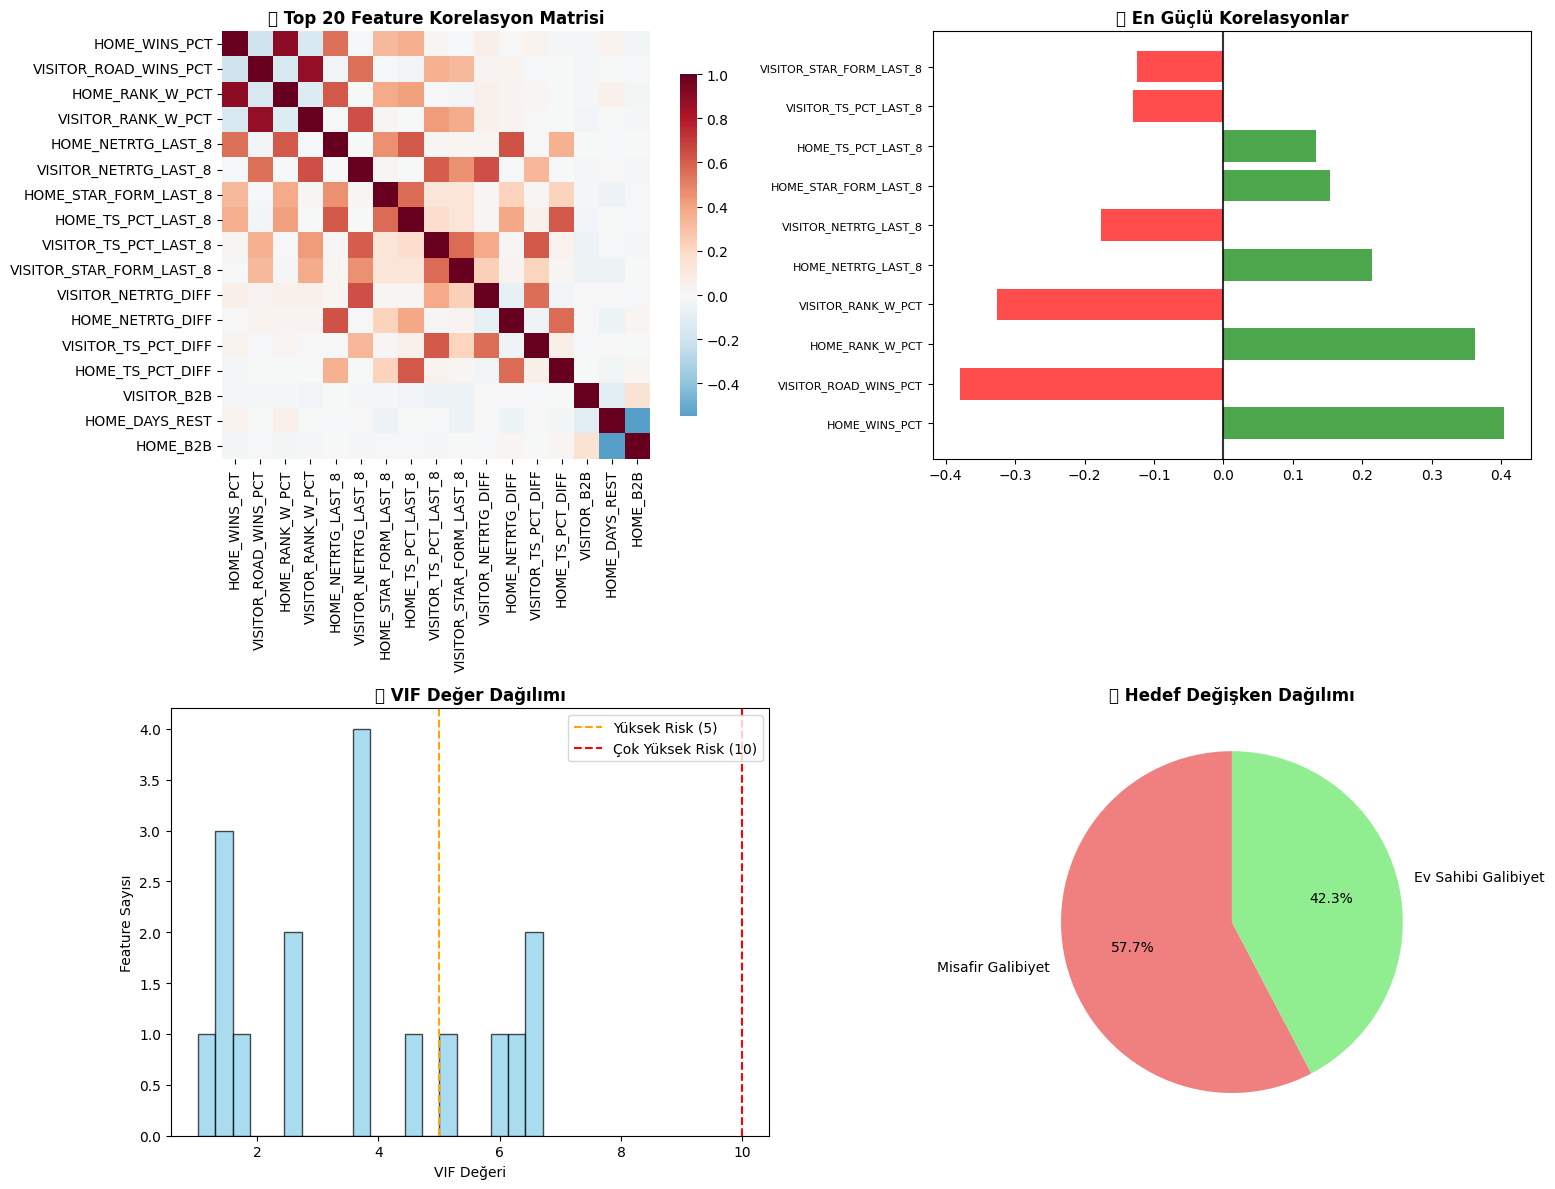


🤖 7. MODEL ÖNERİLERİ
✅ GÜÇLÜ FEATURE'LAR (4 adet): |r| > 0.3
❌ ZAYIF FEATURE'LAR (5 adet): |r| < 0.05

🗑️ ÇIKARILMASI ÖNERİLEN FEATURE'LAR:
   • VISITOR_TS_PCT_DIFF (r=+0.0478)
   • HOME_TS_PCT_DIFF (r=-0.0423)
   • VISITOR_B2B (r=+0.0417)
   • HOME_DAYS_REST (r=+0.0159)
   • HOME_B2B (r=-0.0130)

💡 MODEL ÖNERİLERİ:
🎯 Binary Classification için uygun algoritmalar:
   • Logistic Regression (baseline)
   • Random Forest (feature importance)
   • XGBoost (gradient boosting)
   • SVM (non-linear patterns)
   • Neural Networks (complex relationships)
✅ Feature sayısı optimal - Overfitting riski düşük

📋 8. FINAL MODELLEME RAPORU
🎯 VERİ SETİ DURUMU:
   ✅ Train samples: 8,240
   ✅ Test samples: 4,050
   ✅ Features: 17
   ✅ Missing values: 0
   ✅ Target balance: 0.577

🔍 KALİTE KONTROL:
   📈 Güçlü korelasyon: 0 feature
   ⚠️ Yüksek VIF: 5 feature
   🗑️ Zayıf feature: 5 feature

🚀 MODELLEME READİNESS: 🟡 GOOD
✅ Model eğitimine başlayabilirsin!


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def comprehensive_final_analysis(X_train_scaled_path, X_test_scaled_path, y_train):
    """
    Scaled veriler için kapsamlı son analiz
    """
    print("🔍 === MODELLEME ÖNCESİ KAPSAMLI ANALİZ ===")
    
    # Verileri yükle
    print("📂 Scaled veriler yükleniyor...")
    X_train_scaled = pd.read_pickle(X_train_scaled_path)
    X_test_scaled = pd.read_pickle(X_test_scaled_path)
    
    print(f"✅ Train: {X_train_scaled.shape}")
    print(f"✅ Test: {X_test_scaled.shape}")
    
    # ============ 1. TEMEL BİLGİLER ============
    print("\n" + "="*60)
    print("📊 1. TEMEL VERİ SETİ BİLGİLERİ")
    print("="*60)
    
    print(f"🎯 Bağımlı değişken: HOME_TEAM_WINS (Binary Classification)")
    print(f"📈 Train örnekleri: {X_train_scaled.shape[0]:,}")
    print(f"🧪 Test örnekleri: {X_test_scaled.shape[0]:,}")
    print(f"🔢 Feature sayısı: {X_train_scaled.shape[1]}")
    print(f"📊 Hedef dağılımı: {y_train.value_counts().to_dict()}")
    print(f"⚖️ Denge oranı: {y_train.mean():.3f} (ev sahibi galibiyeti)")
    
    # ============ 2. EKSİK VERİ KONTROLÜ ============
    print("\n" + "="*60)
    print("🔍 2. EKSİK VERİ KONTROLÜ")
    print("="*60)
    
    train_missing = X_train_scaled.isnull().sum().sum()
    test_missing = X_test_scaled.isnull().sum().sum()
    
    if train_missing == 0 and test_missing == 0:
        print("✅ Eksik veri yok - Mükemmel!")
    else:
        print(f"⚠️ Train eksik: {train_missing}")
        print(f"⚠️ Test eksik: {test_missing}")
    
    # ============ 3. VIF ANALİZİ ============
    print("\n" + "="*60)
    print("📈 3. VIF ANALİZİ (MULTICOLLINEARITY)")
    print("="*60)
    
    # VIF hesapla (ilk 50 feature ile memory sorunu önleme)
    feature_sample = min(50, X_train_scaled.shape[1])
    X_sample = X_train_scaled.iloc[:, :feature_sample]
    
    print(f"🔢 VIF analizi: İlk {feature_sample} feature")
    
    vif_data = []
    for i in range(X_sample.shape[1]):
        try:
            vif_value = variance_inflation_factor(X_sample.values, i)
            if not np.isinf(vif_value) and not np.isnan(vif_value):
                vif_data.append({
                    'Feature': X_sample.columns[i],
                    'VIF': vif_value
                })
        except:
            continue
    
    if vif_data:
        vif_df = pd.DataFrame(vif_data).sort_values('VIF', ascending=False)
        
        # VIF kategorileri
        very_high = len(vif_df[vif_df['VIF'] >= 10])
        high = len(vif_df[(vif_df['VIF'] >= 5) & (vif_df['VIF'] < 10)])
        medium = len(vif_df[(vif_df['VIF'] >= 2.5) & (vif_df['VIF'] < 5)])
        low = len(vif_df[vif_df['VIF'] < 2.5])
        
        print(f"🚨 Çok yüksek VIF (≥10): {very_high}")
        print(f"⚠️ Yüksek VIF (5-10): {high}")
        print(f"💡 Orta VIF (2.5-5): {medium}")
        print(f"✅ Düşük VIF (<2.5): {low}")
        
        if very_high > 0:
            print(f"\n🔥 EN YÜKSEK VIF DEĞERLER:")
            for _, row in vif_df.head(5).iterrows():
                print(f"   • {row['Feature']}: {row['VIF']:.2f}")
    
    # ============ 4. KORELASYON ANALİZİ ============
    print("\n" + "="*60)
    print("🎯 4. HEDEF DEĞİŞKEN KORELASYON ANALİZİ")
    print("="*60)
    
    # Korelasyon hesapla
    correlations = []
    for feature in X_train_scaled.columns:
        corr = X_train_scaled[feature].corr(y_train)
        if not np.isnan(corr):
            correlations.append({
                'Feature': feature,
                'Correlation': corr,
                'Abs_Correlation': abs(corr)
            })
    
    corr_df = pd.DataFrame(correlations).sort_values('Abs_Correlation', ascending=False)
    
    # Korelasyon kategorileri
    very_strong = len(corr_df[corr_df['Abs_Correlation'] > 0.7])
    strong = len(corr_df[(corr_df['Abs_Correlation'] > 0.5) & (corr_df['Abs_Correlation'] <= 0.7)])
    medium = len(corr_df[(corr_df['Abs_Correlation'] > 0.3) & (corr_df['Abs_Correlation'] <= 0.5)])
    weak = len(corr_df[(corr_df['Abs_Correlation'] > 0.1) & (corr_df['Abs_Correlation'] <= 0.3)])
    very_weak = len(corr_df[corr_df['Abs_Correlation'] <= 0.1])
    
    print(f"🔥 Çok güçlü (|r| > 0.7): {very_strong}")
    print(f"⚡ Güçlü (0.5 < |r| ≤ 0.7): {strong}")
    print(f"💫 Orta (0.3 < |r| ≤ 0.5): {medium}")
    print(f"💧 Zayıf (0.1 < |r| ≤ 0.3): {weak}")
    print(f"🫧 Çok zayıf (|r| ≤ 0.1): {very_weak}")
    
    print(f"\n🎯 EN GÜÇLÜ KORELASYONLAR (TOP 10):")
    for i, (_, row) in enumerate(corr_df.head(10).iterrows(), 1):
        direction = "EV SAHİBİ" if row['Correlation'] > 0 else "MİSAFİR"
        print(f"{i:2d}. {row['Feature']:<25} r={row['Correlation']:+.4f} ({direction})")
    
    # ============ 5. FEATURE İSTATİSTİKLERİ ============
    print("\n" + "="*60)
    print("📊 5. FEATURE İSTATİSTİKLERİ")
    print("="*60)
    
    # Varyans analizi
    feature_stats = pd.DataFrame({
        'Feature': X_train_scaled.columns,
        'Mean': X_train_scaled.mean(),
        'Std': X_train_scaled.std(),
        'Min': X_train_scaled.min(),
        'Max': X_train_scaled.max(),
        'Variance': X_train_scaled.var()
    })
    
    zero_var = len(feature_stats[feature_stats['Variance'] == 0])
    low_var = len(feature_stats[feature_stats['Variance'] < 0.01])
    
    print(f"📈 Ortalama varyans: {feature_stats['Variance'].mean():.4f}")
    print(f"🚫 Sıfır varyans: {zero_var} feature")
    print(f"⚠️ Düşük varyans (<0.01): {low_var} feature")
    
    if zero_var > 0:
        print(f"🗑️ Sıfır varyans feature'lar:")
        zero_var_features = feature_stats[feature_stats['Variance'] == 0]['Feature'].tolist()
        for feature in zero_var_features:
            print(f"   • {feature}")
    
    # ============ 6. VİZUALİZASYON ============
    print("\n" + "="*60)
    print("📊 6. VİZUALİZASYON")
    print("="*60)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 6.1 Korelasyon heatmap (top 20 feature)
    top_20_features = corr_df.head(20)['Feature'].tolist()
    corr_matrix = X_train_scaled[top_20_features].corr()
    
    sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0, 
                square=True, ax=axes[0,0], cbar_kws={'shrink': 0.8})
    axes[0,0].set_title('🔥 Top 20 Feature Korelasyon Matrisi', fontweight='bold')
    
    # 6.2 Hedef değişken korelasyonu
    top_10_corr = corr_df.head(10)
    colors = ['green' if x > 0 else 'red' for x in top_10_corr['Correlation']]
    axes[0,1].barh(range(len(top_10_corr)), top_10_corr['Correlation'], color=colors, alpha=0.7)
    axes[0,1].set_yticks(range(len(top_10_corr)))
    axes[0,1].set_yticklabels(top_10_corr['Feature'], fontsize=8)
    axes[0,1].set_title('🎯 En Güçlü Korelasyonlar', fontweight='bold')
    axes[0,1].axvline(0, color='black', linestyle='-', alpha=0.8)
    
    # 6.3 VIF dağılımı
    if vif_data:
        axes[1,0].hist(vif_df['VIF'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1,0].axvline(5, color='orange', linestyle='--', label='Yüksek Risk (5)')
        axes[1,0].axvline(10, color='red', linestyle='--', label='Çok Yüksek Risk (10)')
        axes[1,0].set_title('📈 VIF Değer Dağılımı', fontweight='bold')
        axes[1,0].set_xlabel('VIF Değeri')
        axes[1,0].set_ylabel('Feature Sayısı')
        axes[1,0].legend()
    
    # 6.4 Hedef değişken dağılımı
    y_counts = y_train.value_counts()
    axes[1,1].pie(y_counts.values, labels=['Misafir Galibiyet', 'Ev Sahibi Galibiyet'], 
                  autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
    axes[1,1].set_title('🏆 Hedef Değişken Dağılımı', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # ============ 7. MODEL ÖNERİLERİ ============
    print("\n" + "="*60)
    print("🤖 7. MODEL ÖNERİLERİ")
    print("="*60)
    
    # Önemli feature'lar
    important_features = corr_df[corr_df['Abs_Correlation'] > 0.3]['Feature'].tolist()
    weak_features = corr_df[corr_df['Abs_Correlation'] < 0.05]['Feature'].tolist()
    
    print(f"✅ GÜÇLÜ FEATURE'LAR ({len(important_features)} adet): |r| > 0.3")
    print(f"❌ ZAYIF FEATURE'LAR ({len(weak_features)} adet): |r| < 0.05")
    
    if len(weak_features) > 0:
        print(f"\n🗑️ ÇIKARILMASI ÖNERİLEN FEATURE'LAR:")
        for feature in weak_features[:10]:  # İlk 10'unu göster
            corr_val = corr_df[corr_df['Feature'] == feature]['Correlation'].iloc[0]
            print(f"   • {feature} (r={corr_val:+.4f})")
    
    # Model önerileri
    print(f"\n💡 MODEL ÖNERİLERİ:")
    print(f"🎯 Binary Classification için uygun algoritmalar:")
    print(f"   • Logistic Regression (baseline)")
    print(f"   • Random Forest (feature importance)")
    print(f"   • XGBoost (gradient boosting)")
    print(f"   • SVM (non-linear patterns)")
    print(f"   • Neural Networks (complex relationships)")
    
    if very_high > 5:
        print(f"⚠️ VIF problemi var - Ridge/Lasso regression öneriliyor")
    
    if len(important_features) < 20:
        print(f"✅ Feature sayısı optimal - Overfitting riski düşük")
    else:
        print(f"⚠️ Çok fazla feature - Feature selection düşün")
    
    # ============ 8. FINAL RAPOR ============
    print("\n" + "="*60)
    print("📋 8. FINAL MODELLEME RAPORU")
    print("="*60)
    
    print(f"🎯 VERİ SETİ DURUMU:")
    print(f"   ✅ Train samples: {X_train_scaled.shape[0]:,}")
    print(f"   ✅ Test samples: {X_test_scaled.shape[0]:,}")
    print(f"   ✅ Features: {X_train_scaled.shape[1]}")
    print(f"   ✅ Missing values: {train_missing + test_missing}")
    print(f"   ✅ Target balance: {y_train.mean():.3f}")
    
    print(f"\n🔍 KALİTE KONTROL:")
    print(f"   📈 Güçlü korelasyon: {strong + very_strong} feature")
    print(f"   ⚠️ Yüksek VIF: {high + very_high if vif_data else 'N/A'} feature")
    print(f"   🗑️ Zayıf feature: {len(weak_features)} feature")
    
    status = "🟢 EXCELLENT" if len(weak_features) < 5 and very_high < 3 else \
             "🟡 GOOD" if len(weak_features) < 10 and very_high < 5 else "🔴 NEEDS WORK"
    
    print(f"\n🚀 MODELLEME READİNESS: {status}")
    print(f"✅ Model eğitimine başlayabilirsin!")
    
    return {
        'correlation_analysis': corr_df,
        'vif_analysis': vif_df if vif_data else None,
        'feature_stats': feature_stats,
        'important_features': important_features,
        'weak_features': weak_features
    }

# Analizi çalıştır
results = comprehensive_final_analysis(
    'c:/Users/belyi/Desktop/NBA_Dataset/Final/X_train_final_scaled.pkl',
    'c:/Users/belyi/Desktop/NBA_Dataset/Final/X_test_final_scaled.pkl',
    y_train
)

In [84]:
data_processing.summarize_dataframe(X_train_scaled)

--- None ---

--- İlk 10 Satır (df.head(3)) ---
|   HOME_RANK_W_PCT |   VISITOR_RANK_W_PCT |   HOME_WINS_PCT |   VISITOR_ROAD_WINS_PCT |   HOME_DAYS_REST |   HOME_B2B |   VISITOR_B2B |   HOME_TS_PCT_LAST_8 |   HOME_TS_PCT_DIFF |   HOME_NETRTG_LAST_8 |   HOME_NETRTG_DIFF |   VISITOR_TS_PCT_LAST_8 |   VISITOR_TS_PCT_DIFF |   VISITOR_NETRTG_LAST_8 |   VISITOR_NETRTG_DIFF |   HOME_STAR_FORM_LAST_8 |   VISITOR_STAR_FORM_LAST_8 |
|------------------:|---------------------:|----------------:|------------------------:|-----------------:|-----------:|--------------:|---------------------:|-------------------:|---------------------:|-------------------:|------------------------:|----------------------:|------------------------:|----------------------:|------------------------:|---------------------------:|
|         0.0496086 |            0.0153291 |       0.0260631 |               0.0884984 |          0.89035 |  -0.360563 |      -0.545   |            -2.6902   |          0.0400778 |           -

In [85]:
# === SCALED VERİLERİ KAYDET ===

def save_scaled_data_before_modeling():
    """
    Sadece scaled verileri kaydet
    """
    print("💾 === SCALED VERİLERİ KAYDETME ===")
    
    # Before_Modeling klasörü oluştur
    folder = "Before_Modeling"
    
    
    # Scaled verileri yükle ve kaydet
    try:
        # Train scaled
        X_train_scaled = pd.read_pickle('c:/Users/belyi/Desktop/NBA_Dataset/Final/X_train_final_scaled.pkl')
        X_train_scaled.to_pickle(f'{folder}/X_train_scaled_before_modeling.pkl')
        print(f"✅ X_train_scaled: {X_train_scaled.shape}")
        
        # Test scaled  
        X_test_scaled = pd.read_pickle('c:/Users/belyi/Desktop/NBA_Dataset/Final/X_test_final_scaled.pkl')
        X_test_scaled.to_pickle(f'{folder}/X_test_scaled_before_modeling.pkl')
        print(f"✅ X_test_scaled: {X_test_scaled.shape}")
        
        # y verileri
        y_train.to_pickle(f'{folder}/y_train_before_modeling.pkl')
        y_test.to_pickle(f'{folder}/y_test_before_modeling.pkl')
        print(f"✅ y_train: {y_train.shape}")
        print(f"✅ y_test: {y_test.shape}")
        
        print(f"\n🎯 KAYIT TAMAMLANDI!")
        print(f"📁 Klasör: {folder}/")
        
    except Exception as e:
        print(f"❌ Hata: {str(e)}")

# Kaydet
save_scaled_data_before_modeling()

💾 === SCALED VERİLERİ KAYDETME ===
✅ X_train_scaled: (8240, 17)
✅ X_test_scaled: (4050, 17)
✅ y_train: (8240,)
✅ y_test: (4050,)

🎯 KAYIT TAMAMLANDI!
📁 Klasör: Before_Modeling/


In [86]:
# === SCALED VERİLERİ YÜKLE ===

def load_scaled_data_before_modeling():
    """
    Kaydedilen scaled verileri yükle
    """
    print("📂 === SCALED VERİLERİ YÜKLEME ===")
    
    folder = "Before_Modeling"
    
    try:
        # Verileri yükle
        X_train_scaled = pd.read_pickle(f'{folder}/X_train_scaled_before_modeling.pkl')
        X_test_scaled = pd.read_pickle(f'{folder}/X_test_scaled_before_modeling.pkl')
        y_train = pd.read_pickle(f'{folder}/y_train_before_modeling.pkl')
        y_test = pd.read_pickle(f'{folder}/y_test_before_modeling.pkl')
        
        print(f"✅ X_train_scaled: {X_train_scaled.shape}")
        print(f"✅ X_test_scaled: {X_test_scaled.shape}")
        print(f"✅ y_train: {y_train.shape}")
        print(f"✅ y_test: {y_test.shape}")
        
        # Global değişkenlere ata
        globals()['X_train_scaled'] = X_train_scaled
        globals()['X_test_scaled'] = X_test_scaled
        globals()['y_train'] = y_train
        globals()['y_test'] = y_test
        
        print(f"\n🚀 Modelleme için hazır!")
        
        return X_train_scaled, X_test_scaled, y_train, y_test
        
    except Exception as e:
        print(f"❌ Hata: {str(e)}")
        return None

# Yükle
X_train_scaled, X_test_scaled, y_train, y_test = load_scaled_data_before_modeling()

📂 === SCALED VERİLERİ YÜKLEME ===


✅ X_train_scaled: (8240, 17)
✅ X_test_scaled: (4050, 17)
✅ y_train: (8240,)
✅ y_test: (4050,)

🚀 Modelleme için hazır!


📊 === DÜZELTİLMİŞ LOGISTIC REGRESSION CLASSIFIER ===

📊 1. BASELINE MODEL (Random Forest):
--------------------------------------------------
✅ Baseline RF AUC: 0.8340
✅ Baseline RF Accuracy: 0.7521

🔧 2. LOGISTIC REGRESSION PARAMETRELERİ:
--------------------------------------------------
🎯 Model çeşitleri: 4 adet
   • L1 (Lasso): penalty=l1, C=1.0
   • L2 (Ridge): penalty=l2, C=1.0
   • ElasticNet: penalty=elasticnet, C=1.0
   • No Regularization: penalty=None, C=1.0

🚂 3. MODEL EĞİTİMİ VE KARŞILAŞTIRMA:
--------------------------------------------------

🔄 L1 (Lasso) eğitiliyor...
   ✅ Test Accuracy: 0.7630
   📈 Test AUC: 0.8623
   🔄 CV Mean: 0.7330
   🔍 Overfitting: -0.0268

🔄 L2 (Ridge) eğitiliyor...
   ✅ Test Accuracy: 0.7627
   📈 Test AUC: 0.8624
   🔄 CV Mean: 0.7328
   🔍 Overfitting: -0.0264

🔄 ElasticNet eğitiliyor...
   ✅ Test Accuracy: 0.7627
   📈 Test AUC: 0.8624
   🔄 CV Mean: 0.7325
   🔍 Overfitting: -0.0267

🔄 No Regularization eğitiliyor...
   ✅ Test Accuracy: 0.7622
   

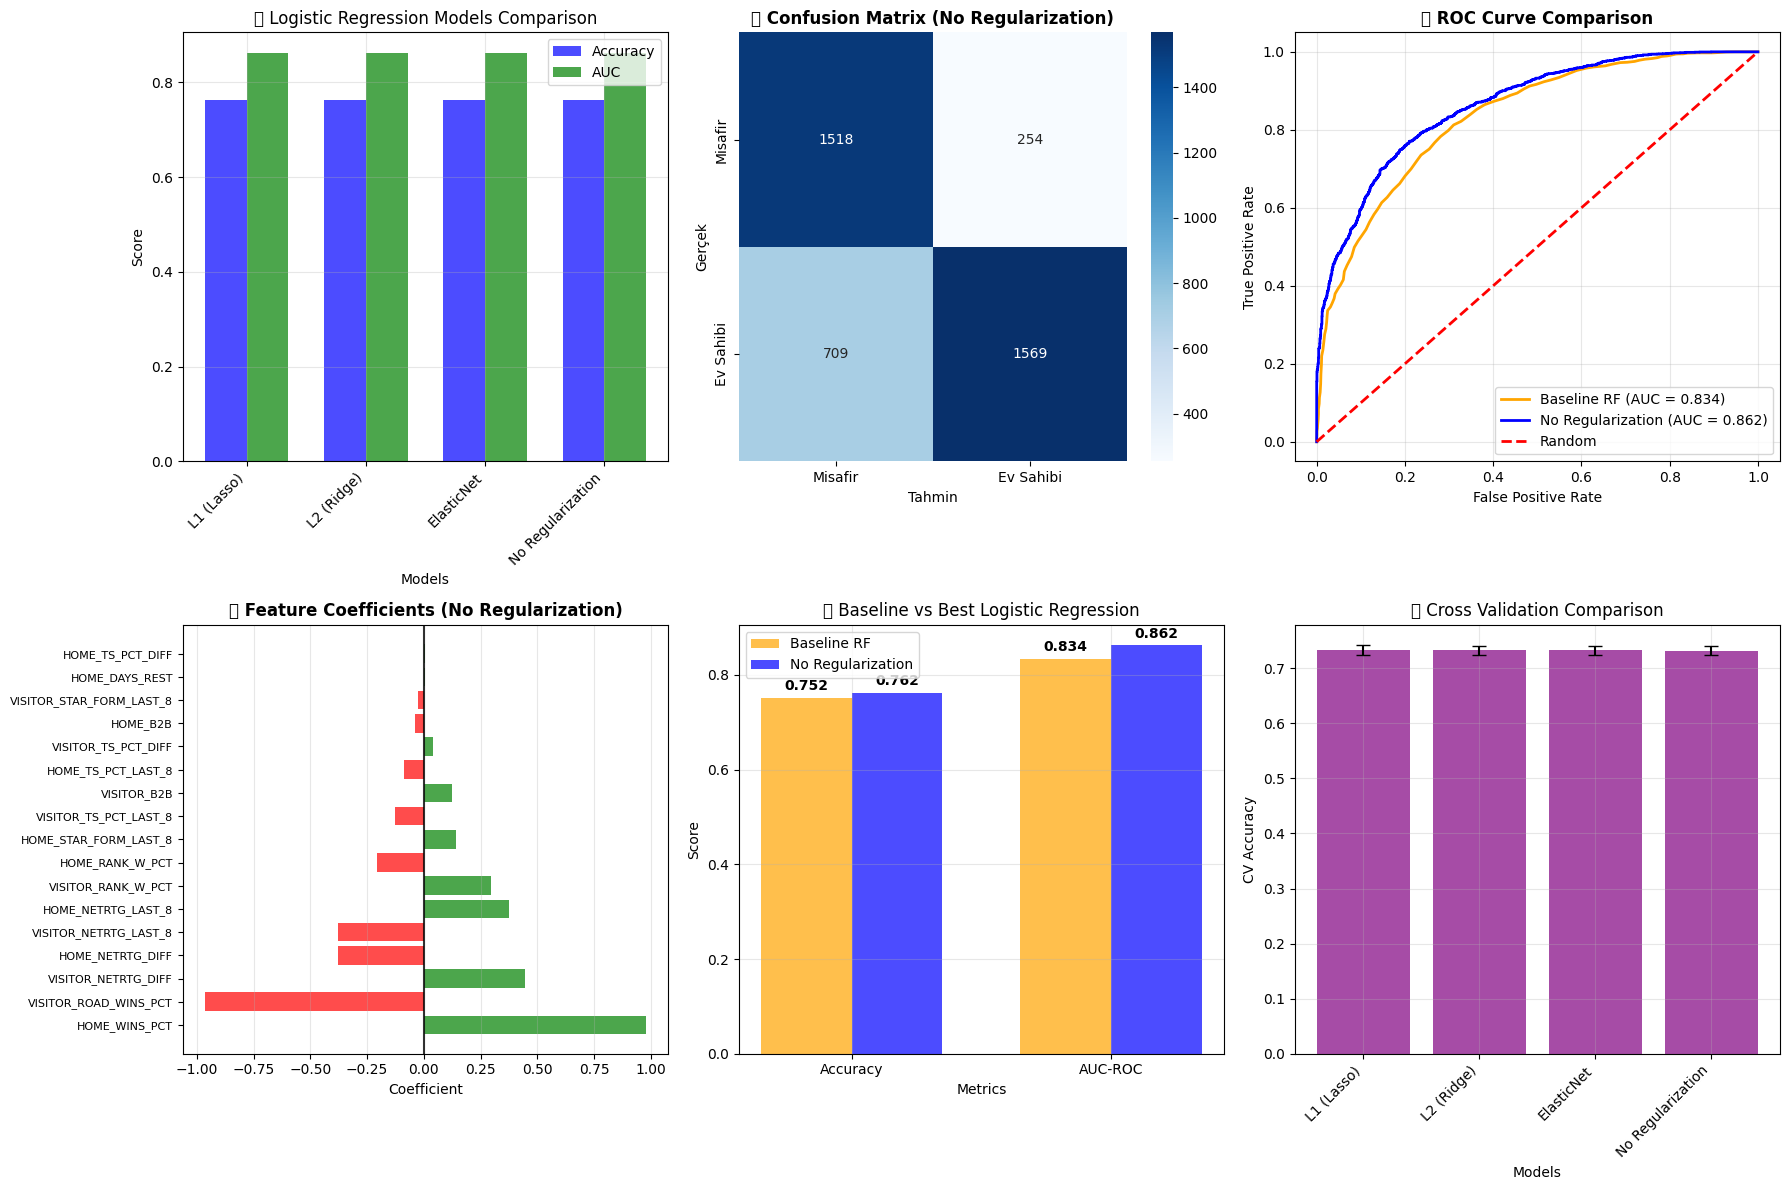


🏆 LOGISTIC REGRESSION FINAL ÖZET:
🏆 En iyi model: No Regularization
✅ Test Accuracy: 0.7622 (76.22%)
📈 Test AUC: 0.8624
🔄 CV Mean: 0.7322
📊 Baseline'dan accuracy iyileştirme: +0.0101
📈 Baseline'dan AUC iyileştirme: +0.0284
🔍 Overfitting: -0.0261 (Linear model avantajı)
🚀 Performance Level: 🟢 EXCELLENT for Linear Model

💡 LOGISTIC REGRESSION AVANTAJLARI:
   🚀 Çok hızlı eğitim ve tahmin
   🧠 Tam interpretable (coefficient analysis)
   💾 Düşük memory kullanımı
   📊 Probability calibration iyi
   🔧 Basit hyperparameter tuning
   📈 Linear relationships için ideal


In [87]:
# === DÜZELTİLMİŞ LOGISTIC REGRESSION CLASSIFIER ===

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def logistic_regression_nba_classifier_fixed(X_train_scaled, X_test_scaled, y_train, y_test):
    """
    Düzeltilmiş Logistic Regression ile NBA HOME_TEAM_WINS tahmini
    """
    print("📊 === DÜZELTİLMİŞ LOGISTIC REGRESSION CLASSIFIER ===")
    
    # ============ 1. BASELINE MODEL (RF) ============
    print("\n📊 1. BASELINE MODEL (Random Forest):")
    print("-"*50)
    
    rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf_baseline.fit(X_train_scaled, y_train)
    baseline_auc = roc_auc_score(y_test, rf_baseline.predict_proba(X_test_scaled)[:, 1])
    baseline_acc = rf_baseline.score(X_test_scaled, y_test)
    
    print(f"✅ Baseline RF AUC: {baseline_auc:.4f}")
    print(f"✅ Baseline RF Accuracy: {baseline_acc:.4f}")
    
    # ============ 2. LOGISTIC REGRESSION MODEL SETUP ============
    print(f"\n🔧 2. LOGISTIC REGRESSION PARAMETRELERİ:")
    print("-"*50)
    
    # Multiple regularization models (DÜZELTİLMİŞ)
    models = {
        'L1 (Lasso)': LogisticRegression(
            penalty='l1',
            C=1.0,
            solver='liblinear',
            random_state=42,
            max_iter=1000,
            class_weight='balanced'
        ),
        'L2 (Ridge)': LogisticRegression(
            penalty='l2',
            C=1.0,
            solver='liblinear',
            random_state=42,
            max_iter=1000,
            class_weight='balanced'
        ),
        'ElasticNet': LogisticRegression(
            penalty='elasticnet',
            C=1.0,
            l1_ratio=0.5,
            solver='saga',
            random_state=42,
            max_iter=1000,
            class_weight='balanced'
        ),
        'No Regularization': LogisticRegression(
            penalty=None,              # DÜZELTİLDİ: 'none' -> None
            solver='lbfgs',
            random_state=42,
            max_iter=1000,
            class_weight='balanced'
        )
    }
    
    print(f"🎯 Model çeşitleri: {len(models)} adet")
    for name, model in models.items():
        print(f"   • {name}: penalty={model.penalty}, C={getattr(model, 'C', 'N/A')}")
    
    # ============ 3. MODEL EĞİTİMİ VE KARŞILAŞTIRMA ============
    print(f"\n🚂 3. MODEL EĞİTİMİ VE KARŞILAŞTIRMA:")
    print("-"*50)
    
    results = {}
    best_model = None
    best_score = 0
    best_name = ""
    
    for name, model in models.items():
        print(f"\n🔄 {name} eğitiliyor...")
        
        try:
            # Model eğitimi
            model.fit(X_train_scaled, y_train)
            
            # Tahminler
            y_train_pred = model.predict(X_train_scaled)
            y_test_pred = model.predict(X_test_scaled)
            y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
            y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
            
            # Performans metrikleri
            train_acc = accuracy_score(y_train, y_train_pred)
            test_acc = accuracy_score(y_test, y_test_pred)
            train_auc = roc_auc_score(y_train, y_train_proba)
            test_auc = roc_auc_score(y_test, y_test_proba)
            
            # Cross validation
            cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
            
            # Sonuçları kaydet
            results[name] = {
                'model': model,
                'train_acc': train_acc,
                'test_acc': test_acc,
                'train_auc': train_auc,
                'test_auc': test_auc,
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std(),
                'y_test_pred': y_test_pred,
                'y_test_proba': y_test_proba,
                'overfitting': train_acc - test_acc
            }
            
            print(f"   ✅ Test Accuracy: {test_acc:.4f}")
            print(f"   📈 Test AUC: {test_auc:.4f}")
            print(f"   🔄 CV Mean: {cv_scores.mean():.4f}")
            print(f"   🔍 Overfitting: {train_acc - test_acc:.4f}")
            
            # En iyi modeli bul
            if test_auc > best_score:
                best_score = test_auc
                best_model = model
                best_name = name
                
        except Exception as e:
            print(f"   ❌ Hata: {str(e)}")
            continue
    
    if not results:
        print("❌ Hiçbir model başarılı olmadı!")
        return None
    
    print(f"\n🏆 EN İYİ MODEL: {best_name} (AUC: {best_score:.4f})")
    
    # En iyi model sonuçlarını al
    best_results = results[best_name]
    
    # ============ 4. PERFORMANS METRİKLERİ (EN İYİ MODEL) ============
    print(f"\n📊 4. PERFORMANS METRİKLERİ ({best_name}):")
    print("="*50)
    
    print(f"🎯 ACCURACY:")
    print(f"   Train: {best_results['train_acc']:.4f} ({best_results['train_acc']*100:.2f}%)")
    print(f"   Test:  {best_results['test_acc']:.4f} ({best_results['test_acc']*100:.2f}%)")
    
    print(f"\n📈 AUC-ROC:")
    print(f"   Train: {best_results['train_auc']:.4f}")
    print(f"   Test:  {best_results['test_auc']:.4f}")
    
    # Baseline ile karşılaştırma
    acc_improvement = best_results['test_acc'] - baseline_acc
    auc_improvement = best_results['test_auc'] - baseline_auc
    
    print(f"\n⚖️ BASELINE KARŞILAŞTIRMA:")
    print(f"   Accuracy iyileştirme: {acc_improvement:+.4f}")
    print(f"   AUC iyileştirme: {auc_improvement:+.4f}")
    
    # Overfitting kontrolü
    print(f"\n🔍 OVERFİTTİNG KONTROL:")
    print(f"   Fark: {best_results['overfitting']:.4f}")
    if best_results['overfitting'] < 0.02:
        print(f"   ✅ Excellent (< 0.02) - Linear model avantajı")
    elif best_results['overfitting'] < 0.05:
        print(f"   ✅ Good (< 0.05)")
    else:
        print(f"   ⚠️ Moderate (> 0.05)")
    
    # ============ 5. CROSS VALIDATION COMPARISON ============
    print(f"\n🔄 5. CROSS VALIDATION KARŞILAŞTIRMASI:")
    print("-"*50)
    
    for name, result in results.items():
        print(f"{name:<20} CV: {result['cv_mean']:.4f} (±{result['cv_std']*2:.4f})")
    
    # ============ 6. FEATURE IMPORTANCE (COEFFICIENTS) ============
    print(f"\n🎯 6. FEATURE IMPORTANCE - COEFFICIENTS ({best_name}):")
    print("-"*50)
    
    # Coefficients'ları al
    coefficients = best_model.coef_[0]
    
    # Feature importance DataFrame
    feature_importance = pd.DataFrame({
        'Feature': X_train_scaled.columns,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    print(f"🔥 EN GÜÇLÜ FEATURE'LAR (TOP 15):")
    for i, (_, row) in enumerate(feature_importance.head(15).iterrows(), 1):
        direction = "EV SAHİBİ" if row['Coefficient'] > 0 else "MİSAFİR" 
        print(f"{i:2d}. {row['Feature']:<30} {row['Coefficient']:+.4f} ({direction})")
    
    # ============ 7. REGULARIZATION ANALYSIS ============
    print(f"\n🔧 7. REGULARİZATİON ANALİZİ:")
    print("-"*50)
    
    # Non-zero coefficients sayısı (feature selection)
    for name, result in results.items():
        if hasattr(result['model'], 'coef_'):
            non_zero = np.sum(np.abs(result['model'].coef_[0]) > 1e-6)
            total_features = len(result['model'].coef_[0])
            print(f"{name:<20} Active features: {non_zero}/{total_features} ({non_zero/total_features*100:.1f}%)")
    
    # ============ 8. DETAYLI RAPORLAR ============
    print(f"\n📋 8. CLASSIFICATION REPORT ({best_name}):")
    print("-"*50)
    report = classification_report(y_test, best_results['y_test_pred'], 
                                 target_names=['Misafir Galibiyet', 'Ev Sahibi Galibiyet'])
    print(report)
    
    # ============ 9. VİZUALİZASYON ============
    print(f"\n📊 9. GRAFİKLER:")
    print("-"*50)
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 9.1 Model Comparison
    model_names = list(results.keys())
    test_accs = [results[name]['test_acc'] for name in model_names]
    test_aucs = [results[name]['test_auc'] for name in model_names]
    
    x = np.arange(len(model_names))
    width = 0.35
    
    axes[0,0].bar(x - width/2, test_accs, width, label='Accuracy', alpha=0.7, color='blue')
    axes[0,0].bar(x + width/2, test_aucs, width, label='AUC', alpha=0.7, color='green')
    axes[0,0].set_xlabel('Models')
    axes[0,0].set_ylabel('Score')
    axes[0,0].set_title('📊 Logistic Regression Models Comparison')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels(model_names, rotation=45, ha='right')
    axes[0,0].legend()
    axes[0,0].grid(alpha=0.3)
    
    # 9.2 Confusion Matrix
    cm = confusion_matrix(y_test, best_results['y_test_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,1],
                xticklabels=['Misafir', 'Ev Sahibi'],
                yticklabels=['Misafir', 'Ev Sahibi'])
    axes[0,1].set_title(f'🎯 Confusion Matrix ({best_name})', fontweight='bold')
    axes[0,1].set_ylabel('Gerçek')
    axes[0,1].set_xlabel('Tahmin')
    
    # 9.3 ROC Curve Comparison
    fpr_base, tpr_base, _ = roc_curve(y_test, rf_baseline.predict_proba(X_test_scaled)[:, 1])
    fpr_lr, tpr_lr, _ = roc_curve(y_test, best_results['y_test_proba'])
    
    axes[0,2].plot(fpr_base, tpr_base, color='orange', lw=2, 
                   label=f'Baseline RF (AUC = {baseline_auc:.3f})')
    axes[0,2].plot(fpr_lr, tpr_lr, color='blue', lw=2, 
                   label=f'{best_name} (AUC = {best_results["test_auc"]:.3f})')
    axes[0,2].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random')
    axes[0,2].set_xlabel('False Positive Rate')
    axes[0,2].set_ylabel('True Positive Rate')
    axes[0,2].set_title('📈 ROC Curve Comparison', fontweight='bold')
    axes[0,2].legend()
    axes[0,2].grid(alpha=0.3)
    
    # 9.4 Feature Coefficients (Top 20)
    top_20_features = feature_importance.head(20)
    colors = ['green' if x > 0 else 'red' for x in top_20_features['Coefficient']]
    
    axes[1,0].barh(range(len(top_20_features)), top_20_features['Coefficient'], 
                   color=colors, alpha=0.7)
    axes[1,0].set_yticks(range(len(top_20_features)))
    axes[1,0].set_yticklabels(top_20_features['Feature'], fontsize=8)
    axes[1,0].set_xlabel('Coefficient')
    axes[1,0].set_title(f'🎯 Feature Coefficients ({best_name})', fontweight='bold')
    axes[1,0].axvline(0, color='black', linestyle='-', alpha=0.8)
    axes[1,0].grid(axis='x', alpha=0.3)
    
    # 9.5 Baseline vs Best LR Performance
    metrics = ['Accuracy', 'AUC-ROC']
    baseline_values = [baseline_acc, baseline_auc]
    lr_values = [best_results['test_acc'], best_results['test_auc']]
    
    x = np.arange(len(metrics))
    width = 0.35
    
    axes[1,1].bar(x - width/2, baseline_values, width, label='Baseline RF', alpha=0.7, color='orange')
    axes[1,1].bar(x + width/2, lr_values, width, label=f'{best_name}', alpha=0.7, color='blue')
    axes[1,1].set_xlabel('Metrics')
    axes[1,1].set_ylabel('Score')
    axes[1,1].set_title('📊 Baseline vs Best Logistic Regression')
    axes[1,1].set_xticks(x)
    axes[1,1].set_xticklabels(metrics)
    axes[1,1].legend()
    axes[1,1].grid(alpha=0.3)
    
    # Değerleri bars üzerine yaz
    for i, (base_val, lr_val) in enumerate(zip(baseline_values, lr_values)):
        axes[1,1].text(i - width/2, base_val + 0.01, f'{base_val:.3f}', 
                       ha='center', va='bottom', fontweight='bold')
        axes[1,1].text(i + width/2, lr_val + 0.01, f'{lr_val:.3f}', 
                       ha='center', va='bottom', fontweight='bold')
    
    # 9.6 Cross Validation Scores Comparison
    cv_means = [results[name]['cv_mean'] for name in model_names]
    cv_stds = [results[name]['cv_std'] for name in model_names]
    
    axes[1,2].bar(range(len(model_names)), cv_means, yerr=cv_stds, 
                  alpha=0.7, color='purple', capsize=5)
    axes[1,2].set_xlabel('Models')
    axes[1,2].set_ylabel('CV Accuracy')
    axes[1,2].set_title('🔄 Cross Validation Comparison')
    axes[1,2].set_xticks(range(len(model_names)))
    axes[1,2].set_xticklabels(model_names, rotation=45, ha='right')
    axes[1,2].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ============ 10. FINAL ÖZET ============
    print(f"\n🏆 LOGISTIC REGRESSION FINAL ÖZET:")
    print("="*60)
    print(f"🏆 En iyi model: {best_name}")
    print(f"✅ Test Accuracy: {best_results['test_acc']:.4f} ({best_results['test_acc']*100:.2f}%)")
    print(f"📈 Test AUC: {best_results['test_auc']:.4f}")
    print(f"🔄 CV Mean: {best_results['cv_mean']:.4f}")
    print(f"📊 Baseline'dan accuracy iyileştirme: {acc_improvement:+.4f}")
    print(f"📈 Baseline'dan AUC iyileştirme: {auc_improvement:+.4f}")
    print(f"🔍 Overfitting: {best_results['overfitting']:.4f} (Linear model avantajı)")
    
    # Performance assessment
    if best_results['test_acc'] > 0.68 and auc_improvement > 0.005:
        performance = "🟢 EXCELLENT for Linear Model"
    elif best_results['test_acc'] > 0.65:
        performance = "🟡 GOOD for Linear Model"
    else:
        performance = "🔴 BASELINE BETTER"
    
    print(f"🚀 Performance Level: {performance}")
    
    print(f"\n💡 LOGISTIC REGRESSION AVANTAJLARI:")
    print(f"   🚀 Çok hızlı eğitim ve tahmin")
    print(f"   🧠 Tam interpretable (coefficient analysis)")
    print(f"   💾 Düşük memory kullanımı")
    print(f"   📊 Probability calibration iyi")
    print(f"   🔧 Basit hyperparameter tuning")
    print(f"   📈 Linear relationships için ideal")
    
    return {
        'all_results': results,
        'best_model': best_model,
        'best_name': best_name,
        'best_results': best_results,
        'baseline_acc': baseline_acc,
        'baseline_auc': baseline_auc,
        'feature_importance': feature_importance,
        'acc_improvement': acc_improvement,
        'auc_improvement': auc_improvement
    }

# Düzeltilmiş Logistic Regression modelini çalıştır
lr_results = logistic_regression_nba_classifier_fixed(X_train_scaled, X_test_scaled, y_train, y_test)

In [101]:
import pickle
import joblib

# En iyi modeli kaydet
def save_best_model(model, model_name, results):
    # Model dosyasını kaydet
    model_path = f'best_model_{model_name}.pkl'
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    
    # Model sonuçlarını kaydet
    results_path = f'model_results_{model_name}.pkl'
    with open(results_path, 'wb') as f:
        pickle.dump(results, f)
    
    print(f"✅ Model kaydedildi: {model_path}")
    print(f"✅ Sonuçlar kaydedildi: {results_path}")

# Logistic Regression sonuçlarını kaydet
if lr_results is not None:
    save_best_model(
        model=lr_results['best_model'],
        model_name='logistic_regression',
        results={
            'best_name': lr_results['best_name'],
            'test_accuracy': lr_results['best_results']['test_acc'],
            'test_auc': lr_results['best_results']['test_auc'],
            'cv_mean': lr_results['best_results']['cv_mean'],
            'feature_importance': lr_results['feature_importance'],
            'acc_improvement': lr_results['acc_improvement'],
            'auc_improvement': lr_results['auc_improvement']
        }
    )

✅ Model kaydedildi: best_model_logistic_regression.pkl
✅ Sonuçlar kaydedildi: model_results_logistic_regression.pkl
